## Business Understanding

Retailkart.com is a small and medium-scale organization that deals in wine, fruit and meat products, holding around 35% offline market share. The company has been leading the domain offline for a long time. Due to increased competition, they decided to move online as well. But there are many challenges that the company has to overcome to stay competitive in the market.For this purpose, you will solve a customer segmentation problem based on customers’ preferences and purchase behaviour. You will also build a model to predict churn rate and improve customer acquisition by a reasonable threshold.

## Problem Statement :

Retailkart.com is facing the following challenges in its business

1.It wants to reduce the marketing spend but increase the revenue

2.Churn rate is at 17%, churned customer is as good as new customer requiring more marketing spend 


## Proposed Solution  :

Hypothesis 1 :When offered personalized experiences based on their needs, customers tend to have a 1% better conversion as compared to offering a regular experience.

Hypothesis 2 :When offered a token of appreciation (TOA) of ₹200, customers are likely to have a better repeat rate, lower churn by around 5%. 
    

## Data Analysis Actions :

As a business analyst, we need to solve two primary objectives:

1.Customer segmentation- this will improve conversion rate

2.Churn prediction - This will address to reduce churn by taking appropriate action

## Approach :

1.Importing libraries

2.Steps for Customer Segmentation

     i.Reading and understanding the data

    ii.Data Cleaning- data quality checks including check for duplicate records, missing values and outliers

    iii.Data Visualisation and Insights
    
    iv.Data Preparation incl check for Data Imbalance

    v.Customer Segmentation- clustering and evaluation
    
    vi.Insights on Customer Segmentation
    
3.Steps for building the Churn Model
    
    i.Reading and understanding the data

    ii.Data Cleaning- data quality checks including check for duplicate records, missing values and outliers

    iii.Data Visualisation and Insights
    
    iv.Data Preparation incl creation of dummy variables,scaling,handling data imbalance through various techniques
    
    v.Building model - Logistic Regression and Evaluation

    vi.Building model - Random Forest including Hyper Parameter Tuning and Evaluation of the model

    vii.Prediction on the test set
    
    viiii. Recommendation of the final model


## 1. Importing Libraries

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd

# importing the libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries for model
import sklearn
import statsmodels.api as sm

# importing the evaluation metrics
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score,roc_auc_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


# Setting the display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

#### Let us begin with the customer segmentation problem. For that we will work with the data in the file-CustomerPurchaseData

## 2. Customer Segmentation

### i. Reading and Understanding the Data


In [2]:
# reading the file " CustomerPuchaseData" and checking the first 5 records
cust_pur=pd.read_csv("CustomerPurchaseData.csv")
cust_pur.head()

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0   387        1976     Basic        Married   7500.0        0         0   
1  8373        1979     Basic       Together  24594.0        1         0   
2  5342        1976     Basic       Divorced   9548.0        1         0   
3  2563        1961     Basic        Married  28249.0        0         0   
4  9733        1978     Basic       Together  24882.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0    13/11/12       59         6         16               11               11   
1    10/12/13       94         1          3                6               10   
2    08/08/12       31         0          1                3               10   
3    15/06/14       80         1          9                7                2   
4    09/09/12       52         1          4               10               29   

   MntSweetProducts  MntSnacksProds  NumDealsPurchases  NumWebPurchases  \
0                 1              16                  1                2   
1                 0               9                  1                1   
2                 6               9                  2                1   
3                14              10                  1                2   
4                 0              36                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    0                  3                  8             0   
1                    0                  3                  5             0   
2                    0                  3                  8             0   
3                    0                  3                  6             0   
4                    1                  2                  6             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11       0.0  
1              3         11       0.0  
2              3         11       0.0  
3              3         11       0.0  
4              3         11       0.0

In [3]:
# the dataset has 2239 rows and 29 columns
cust_pur.shape

(2239, 29)

In [4]:
# let us check the data type of each variable
# Date is in object format (Dt_Customer)
cust_pur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2238 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntSnacksProds       2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   i

## 2.Customer Segmentation 

### ii.Data Cleaning

#### Unique Records

In [5]:
# Let us check the number of unique records
cust_pur.nunique()

ID                     2238
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1976
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntSnacksProds          213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [6]:
# though there are 2239 records, only 2238 ID's of customers are unique. Let us look at the customers with same ID
cust_pur.ID.value_counts()

11088    2
387      1
4227     1
3766     1
6461     1
        ..
9967     1
1343     1
24016    1
7912     1
8720     1
Name: ID, Length: 2238, dtype: int64

In [7]:
# Let us check the records for Customer Id 11088 as there are two records with this id. 
# Since the ID will not be used for customer segmentation, we can keep these two records as separate as they are distinct and not delete the same.
cust_pur[cust_pur["ID"]== 11088]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
1663  11088        1971       PhD       Together  78642.0        0         1   
1887  11088        1959       PhD          Widow  67786.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1663    21/04/13       83      1396          0              322   
1887    07/12/13        0       431         82              441   

      MntFishProducts  MntSweetProducts  MntSnacksProds  NumDealsPurchases  \
1663               46                35              17                  1   
1887               80                20             102                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1663                4                    9                  4   
1887                3                    6                  6   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1663                  6             0             0             0   
1887                  1             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
1663             0             0         0              3         11       0.0  
1887             0             0         0              3         11       1.0

#### Duplicated Records

In [8]:
# There are no duplicated records
cust_pur.duplicated().sum()

0

#### Missing value treatment

In [9]:
# There are missing values in "Income" and "Response"
cust_pur.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  1
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntSnacksProds          0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response               23
dtype: int64

In [10]:
# Let us check the records with missing values in the variable "Income"
cust_pur[cust_pur["Income"].isnull()]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
60  1994        1983  Graduation        Married     NaN        1         0   

   Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
60    15/11/13       11         5          5                6   

    MntFishProducts  MntSweetProducts  MntSnacksProds  NumDealsPurchases  \
60                0                 2               1                  1   

    NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
60                1                    0                  2   

    NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
60                  7             0             0             0             0   

    AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
60             0         0              3         11       0.0

In [11]:
# Updating the missing value as 0 for the above case as recommended in the problem statement
cust_pur["Income"].fillna(0,inplace=True)
cust_pur.head()

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0   387        1976     Basic        Married   7500.0        0         0   
1  8373        1979     Basic       Together  24594.0        1         0   
2  5342        1976     Basic       Divorced   9548.0        1         0   
3  2563        1961     Basic        Married  28249.0        0         0   
4  9733        1978     Basic       Together  24882.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0    13/11/12       59         6         16               11               11   
1    10/12/13       94         1          3                6               10   
2    08/08/12       31         0          1                3               10   
3    15/06/14       80         1          9                7                2   
4    09/09/12       52         1          4               10               29   

   MntSweetProducts  MntSnacksProds  NumDealsPurchases  NumWebPurchases  \
0                 1              16                  1                2   
1                 0               9                  1                1   
2                 6               9                  2                1   
3                14              10                  1                2   
4                 0              36                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    0                  3                  8             0   
1                    0                  3                  5             0   
2                    0                  3                  8             0   
3                    0                  3                  6             0   
4                    1                  2                  6             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11       0.0  
1              3         11       0.0  
2              3         11       0.0  
3              3         11       0.0  
4              3         11       0.0

In [12]:
# Lets check the missing values after updation.
cust_pur.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntSnacksProds          0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response               23
dtype: int64

In [13]:
# Let us check the records with missing values in the column "Response"

In [14]:
cust_pur[cust_pur["Response"].isnull()]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
70     5255        1986  Graduation         Single     1.0        0         0   
78     7244        1951  Graduation         Single     2.0        1         0   
85     8557        1982  Graduation         Single     1.0        0         0   
105    9235        1957  Graduation         Single     1.0        1         0   
124   35034        1963  Graduation        Married     0.0        1         0   
213    2437        1989  Graduation        Married     0.0        0         0   
218    2863        1970  Graduation         Single     1.0        2         0   
748    2902        1958  Graduation       Together     1.0        1         0   
1101   5079        1971  Graduation        Married     1.0        1         0   
1103   3117        1955  Graduation         Single     0.0        1         0   
1197   5798        1973      Master       Together     0.0        0         0   
1405  27494        1970      Master       Together     0.0        1         0   
1515   7187        1969      Master       Together     1.0        1         0   
1517  14314        1954      Master       Together     0.0        1         0   
1518   5250        1943      Master          Widow     0.0        0         0   
1562   7281        1959         PhD         Single     0.0        0         0   
1567   8996        1957         PhD        Married     2.0        1         0   
1574   8268        1961         PhD        Married     0.0        1         0   
1856   3769        1972         PhD       Together     1.0        0         0   
2010  45276        1981         PhD         Single     1.0        0         0   
2040  47279        1973       Cycle        Married     1.0        0         0   
2163   4345        1964       Cycle         Single     1.0        1         0   
2238   8720        1978       Cycle       Together     0.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
70      20/02/13       19         5          1                3   
78      01/01/14       96        48          5               48   
85      17/06/13       57        11          3               22   
105     27/05/14       45         7          0                8   
124     11/08/13       96       231         65              196   
213     03/06/13       69       861        138              461   
218     23/08/13       67       738         20              172   
748     03/09/12       87        19          4               12   
1101    03/03/13       82        71          1               16   
1103    18/10/13       95       264          0               21   
1197    23/11/13       87       445         37              359   
1405    01/04/13       39       187          5               65   
1515    18/05/13       52       375         42               48   
1517    23/06/13       83       161          0               22   
1518    30/10/13       75       532        126              490   
1562    05/11/13       80        81         11               50   
1567    19/11/12        4       230         42              192   
1574    11/07/13       23       352          0               27   
1856    02/03/14       17        25          1               13   
2010    31/05/13       82        23          0               15   
2040    14/09/12       25        25          3               43   
2163    12/01/14       49         5          1                9   
2238    12/08/12       53        32          2             1607   

      MntFishProducts  MntSweetProducts  MntSnacksProds  NumDealsPurchases  \
70                  3               263             362                  0   
78                  6                10               7                  3   
85                  2                 2               6                  2   
105                 2                 0               1                  1   
124                38                71             124          

In [15]:
# As given in the problem statement, the missing values in the "Response" column should be updated with 1 if any of the previous 5 campaigns has been accepted.
# We will need to update the response values
# Let us create a user defined function for the same.

def cmpresponse(cust_pur):
    if (cust_pur["AcceptedCmp1"]== 1 or cust_pur["AcceptedCmp2"]== 1 or cust_pur["AcceptedCmp3"]== 1 or
        cust_pur["AcceptedCmp4"]== 1 or cust_pur["AcceptedCmp5"]== 1):
        return 1
    else:
        return 0
        

In [16]:
# Applying the user function cmp response to create a new variable " Response_campaign"
cust_pur["Response_campaign"]=cust_pur.apply(cmpresponse, axis=1)
cust_pur.head()

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0   387        1976     Basic        Married   7500.0        0         0   
1  8373        1979     Basic       Together  24594.0        1         0   
2  5342        1976     Basic       Divorced   9548.0        1         0   
3  2563        1961     Basic        Married  28249.0        0         0   
4  9733        1978     Basic       Together  24882.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0    13/11/12       59         6         16               11               11   
1    10/12/13       94         1          3                6               10   
2    08/08/12       31         0          1                3               10   
3    15/06/14       80         1          9                7                2   
4    09/09/12       52         1          4               10               29   

   MntSweetProducts  MntSnacksProds  NumDealsPurchases  NumWebPurchases  \
0                 1              16                  1                2   
1                 0               9                  1                1   
2                 6               9                  2                1   
3                14              10                  1                2   
4                 0              36                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    0                  3                  8             0   
1                    0                  3                  5             0   
2                    0                  3                  8             0   
3                    0                  3                  6             0   
4                    1                  2                  6             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Response_campaign  
0              3         11       0.0                  0  
1              3         11       0.0                  0  
2              3         11       0.0                  0  
3              3         11       0.0                  0  
4              3         11       0.0                  1

In [17]:
# Filling the missing values in Response with values in "Response_campaign"
cust_pur["Response"].fillna(cust_pur["Response_campaign"],inplace=True)


In [18]:
# Let us check the counts after updation
cust_pur.Response.value_counts()

0.0    1902
1.0     337
Name: Response, dtype: int64

In [19]:
# There are no missing values
cust_pur.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntSnacksProds         0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Response_campaign      0
dtype: int64

In [20]:
# Let us drop the column "Response_campaign" that was created temporarily for updating missing values in Response
cust_pur.drop("Response_campaign",axis=1,inplace=True)

#### Outliers Treatment

In [21]:
# Let us check the summary statistics for numerical variables to see for outliers
cust_pur.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2239.000000  2239.000000    2239.000000  2239.000000  2239.000000   
mean    9149.564538  1968.802144   51412.799464     0.443502     0.500223   
std    10605.188253    11.985494   22069.566611     0.537513     0.543772   
min        0.000000  1893.000000       0.000000     0.000000     0.000000   
25%     3383.500000  1959.000000   34716.000000     0.000000     0.000000   
50%     6019.000000  1970.000000   51039.000000     0.000000     0.000000   
75%     9043.500000  1977.000000   68277.500000     1.000000     1.000000   
max    47392.000000  1996.000000  162397.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2239.000000  2239.000000  2239.000000      2239.000000   
mean     49.121036   304.067441    26.307727       167.016525   
std      28.963662   336.614830    39.781468       225.743829   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     1.000000        16.000000   
50%      49.000000   174.000000     8.000000        67.000000   
75%      74.000000   504.500000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntSnacksProds  NumDealsPurchases  \
count      2239.000000       2239.000000     2239.000000        2239.000000   
mean         37.538633         27.074587       44.036177           2.324252   
std          54.637617         41.286043       52.174700           1.932345   
min           0.000000          0.000000        0.000000           0.000000   
25%           3.000000          1.000000        9.000000           1.000000   
50%          12.000000          8.000000       24.000000           2.000000   
75%          50.000000         33.000000       56.000000           3.000000   
max         259.000000        263.000000      362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2239.000000          2239.000000        2239.000000   
mean          4.085306             2.662796           5.791425   
std           2.779240             2.923542           3.251149   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2239.000000   2239.000000   2239.000000   2239.000000   
mean            5.316213      0.072800      0.074587      0.072800   
std             2.427144      0.259867      0.262782      0.259867   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2239.000000   2239.000000  2239.000000         2239.0     2239.0   
mean       0.064314      0.013399     0.009379            3.0       11.0   
std        0.245367      0.115001     0.096412            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2239.000000  
mean      0.150514  
std       0.357654  
min       0.000000  
25%      

In [22]:
# Let us check the names of the columns
cust_pur.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntSnacksProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [23]:
# Let us drop the columns that are not required 
cust_pur.drop(["Z_CostContact","Z_Revenue"],axis=1,inplace=True)

In [24]:
# Let us create a list of numeric variables for outliers analysis
num_vars_for_outlier=['Year_Birth','Income', 'Kidhome','Teenhome','Recency', 'MntWines', 'MntFruits',
                      'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntSnacksProds', 
                      'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 
                      'NumWebVisitsMonth','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                     'AcceptedCmp2', 'Complain','Response']
len(num_vars_for_outlier)

23

Histogram showing the count of customers by Year_Birth


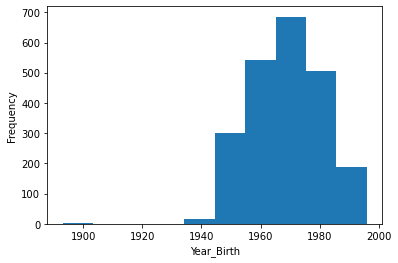

Histogram showing the count of customers by Income


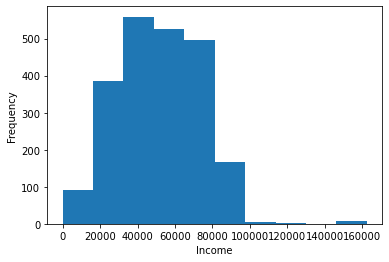

Histogram showing the count of customers by Kidhome


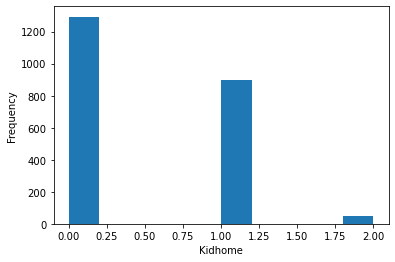

Histogram showing the count of customers by Teenhome


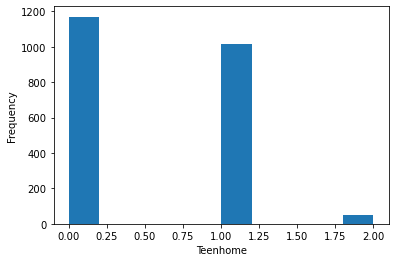

Histogram showing the count of customers by Recency


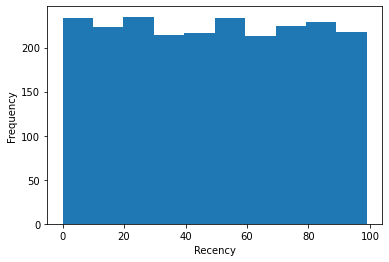

Histogram showing the count of customers by MntWines


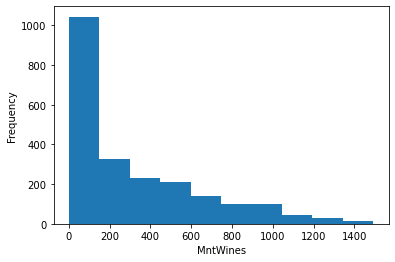

Histogram showing the count of customers by MntFruits


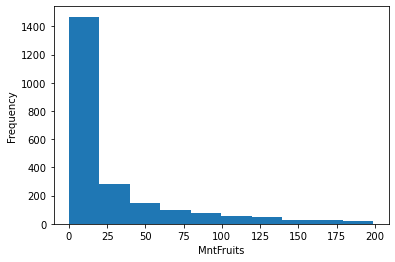

Histogram showing the count of customers by MntMeatProducts


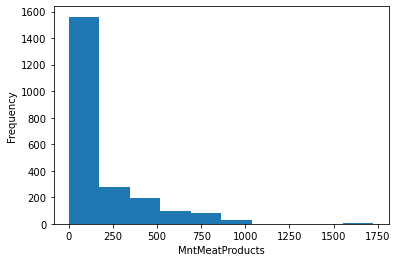

Histogram showing the count of customers by MntFishProducts


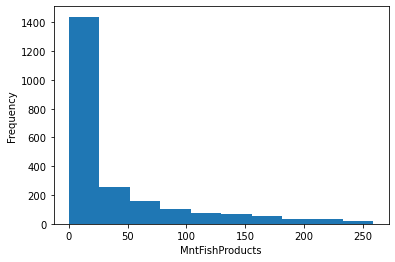

Histogram showing the count of customers by MntSweetProducts


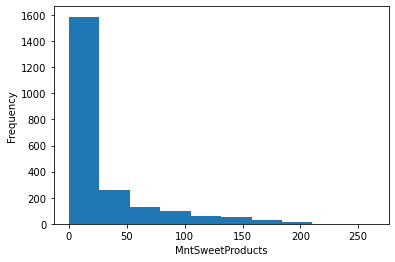

Histogram showing the count of customers by MntSnacksProds


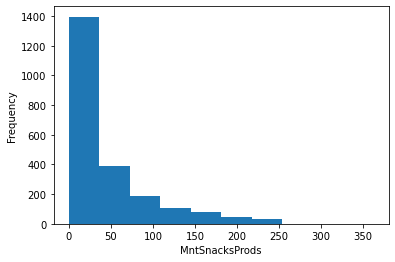

Histogram showing the count of customers by NumDealsPurchases


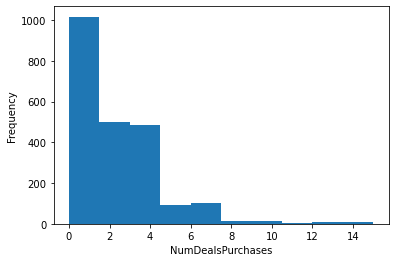

Histogram showing the count of customers by NumWebPurchases


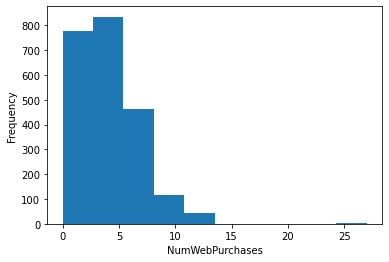

Histogram showing the count of customers by NumCatalogPurchases


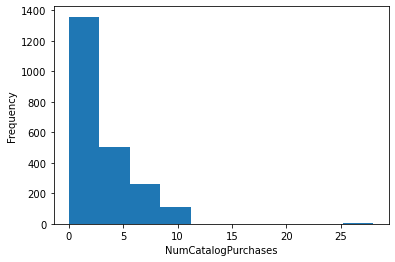

Histogram showing the count of customers by NumStorePurchases


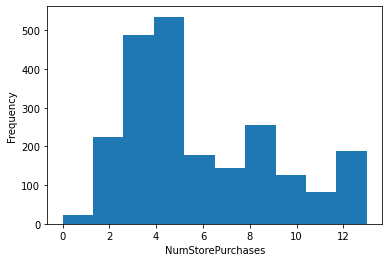

Histogram showing the count of customers by NumWebVisitsMonth


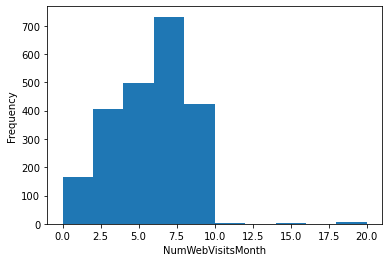

Histogram showing the count of customers by AcceptedCmp3


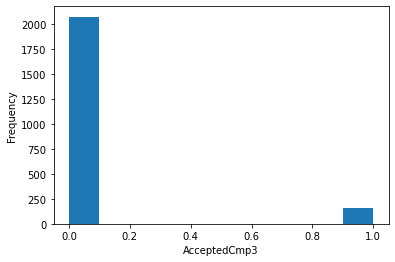

Histogram showing the count of customers by AcceptedCmp4


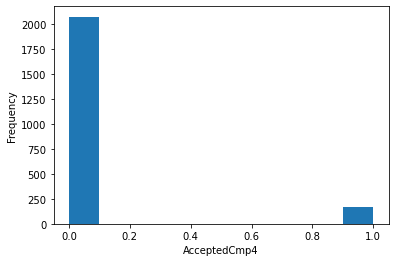

Histogram showing the count of customers by AcceptedCmp5


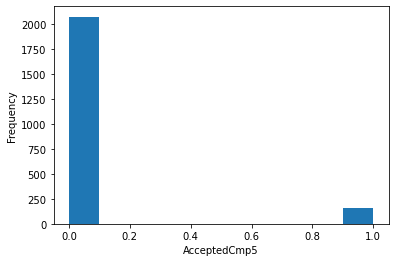

Histogram showing the count of customers by AcceptedCmp1


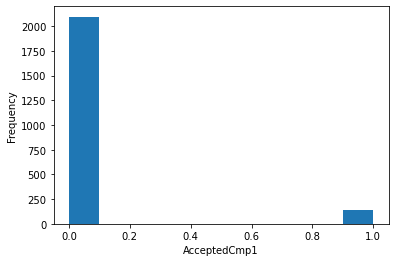

Histogram showing the count of customers by AcceptedCmp2


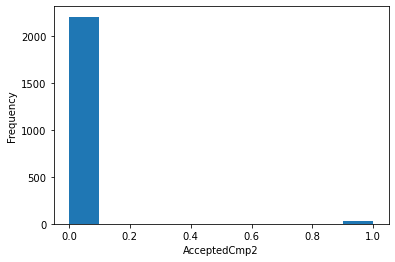

Histogram showing the count of customers by Complain


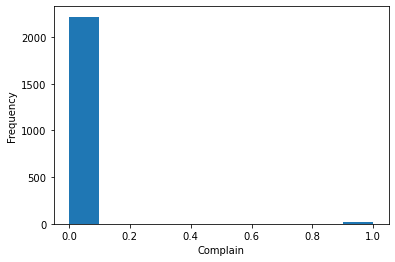

Histogram showing the count of customers by Response


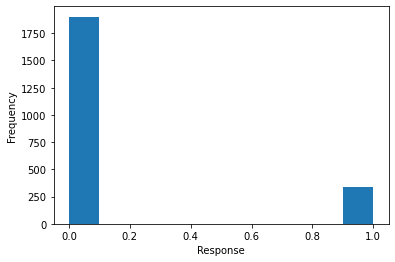

In [25]:
# Let us create a hitogram for each of the numeric variables to see the distribution spread
for i in num_vars_for_outlier:
    cust_pur[i].plot.hist()
    print("Histogram showing the count of customers by", i)
    plt.xlabel(i)
    plt.show()

In [26]:
# The histogram and summary statistics shows that there are some outliers in Year_Birth and most customers have low value purchases as the median value of different products is in the range of 4-20% of the maximum value in those products
# Let us plot boxplots to see the outliers in detail and see if they are only statistical in nature

Boxplot of Year_Birth


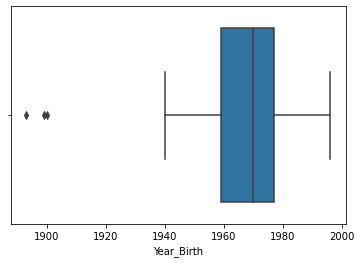

Boxplot of Income


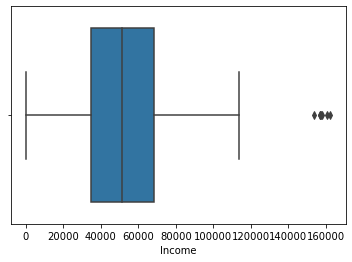

Boxplot of Kidhome


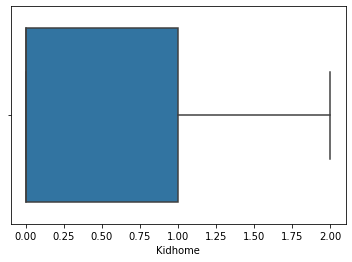

Boxplot of Teenhome


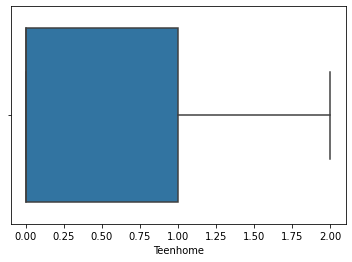

Boxplot of Recency


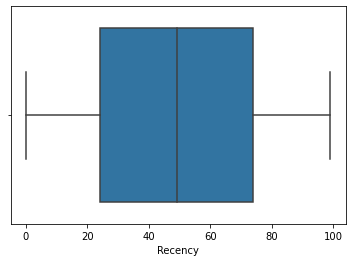

Boxplot of MntWines


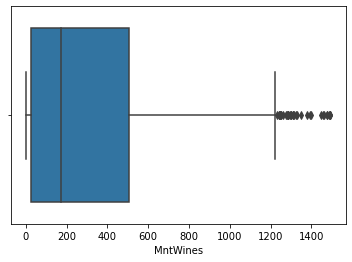

Boxplot of MntFruits


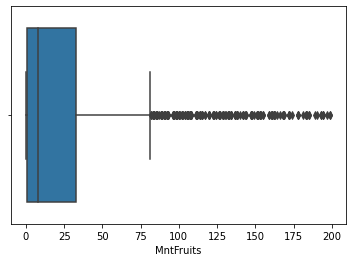

Boxplot of MntMeatProducts


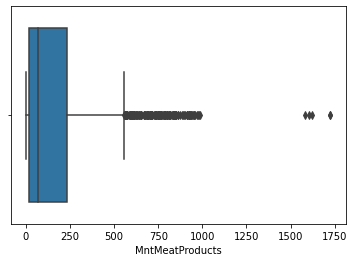

Boxplot of MntFishProducts


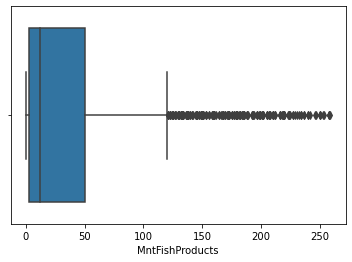

Boxplot of MntSweetProducts


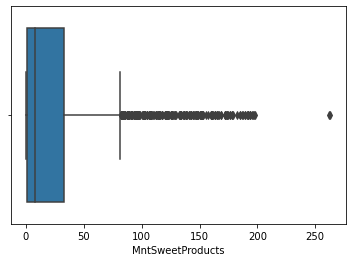

Boxplot of MntSnacksProds


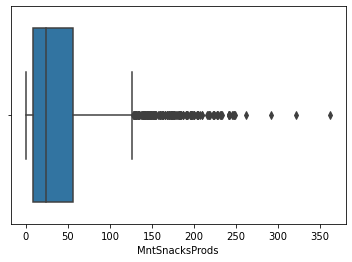

Boxplot of NumDealsPurchases


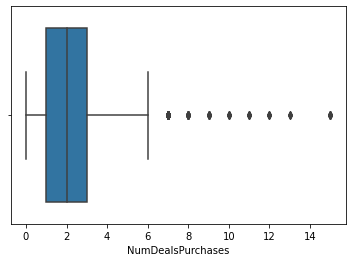

Boxplot of NumWebPurchases


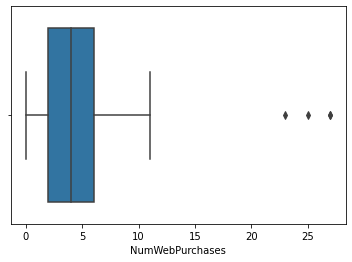

Boxplot of NumCatalogPurchases


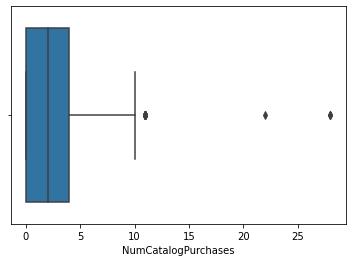

Boxplot of NumStorePurchases


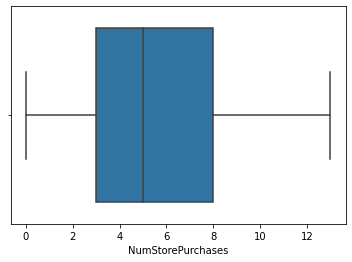

Boxplot of NumWebVisitsMonth


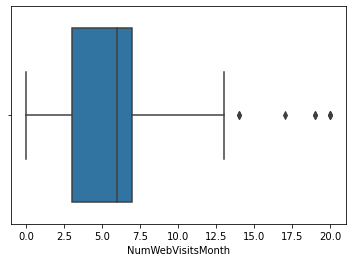

Boxplot of AcceptedCmp3


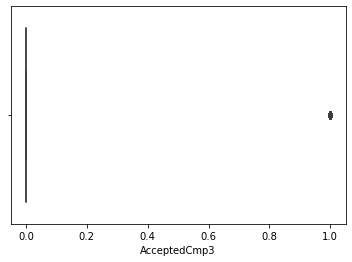

Boxplot of AcceptedCmp4


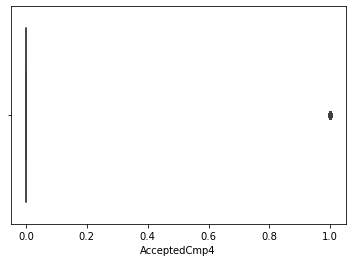

Boxplot of AcceptedCmp5


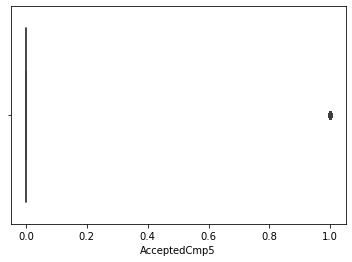

Boxplot of AcceptedCmp1


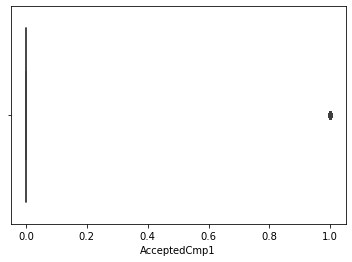

Boxplot of AcceptedCmp2


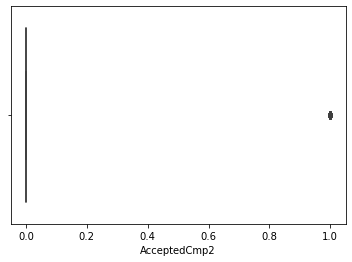

Boxplot of Complain


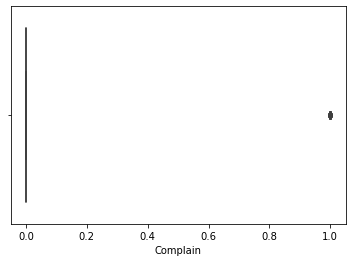

Boxplot of Response


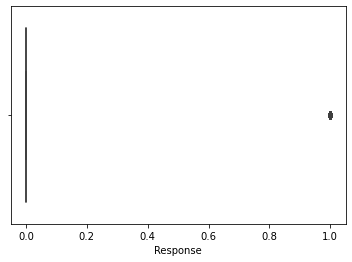

In [27]:
# Plotting boxplot for numeric variables
for i in num_vars_for_outlier:
    sns.boxplot(x=i,data=cust_pur)
    print("Boxplot of", i)
    plt.xlabel(i)
    plt.show()

In [28]:
# The boxplots indicate an outliers in some of the variables. Let us look at the variables one by one.

In [29]:
# Let us begin with Year_Birth
cust_pur.Year_Birth.value_counts()

1976    89
1971    87
1975    83
1972    79
1970    77
1978    77
1965    74
1973    74
1969    71
1974    69
1956    55
1979    53
1958    53
1952    52
1968    51
1977    51
1959    51
1954    50
1966    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1964    42
1986    42
1983    42
1981    39
1980    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1995     5
1993     5
1994     3
1996     2
1899     1
1941     1
1940     1
1900     1
1893     1
Name: Year_Birth, dtype: int64

In [30]:
# Setting the lower cutoff for Year_Birth as 1940, we can delete the records where Year_Birth < 1940 
cust_pur=cust_pur[cust_pur["Year_Birth"]>=1940]
cust_pur.shape

(2236, 27)

In [31]:
# Let us now check the variable "Income" with amount greater than 100000.
# Finding - Customers with higher Income are Graduates/Masters or PhD holders, these are only statistical outliers
cust_pur[cust_pur["Income"]>100000]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
120    7215        1983  Graduation         Single  101970.0        0   
184   10089        1974  Graduation       Divorced  102692.0        0   
383    4611        1970  Graduation       Together  105471.0        0   
388    5555        1975  Graduation       Divorced  153924.0        0   
880    4931        1977  Graduation       Together  157146.0        0   
1389   5336        1971      Master       Together  157733.0        1   
1585   8475        1973         PhD        Married  157243.0        0   
1595   2798        1977         PhD       Together  102160.0        0   
1685  45000        1976         PhD       Together  162397.0        1   
1704  44941        1982         PhD        Married  160803.0        0   
1980   4619        1945         PhD         Single  113734.0        0   
2021  29597        1949         PhD        Married  156924.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
120          0    12/03/13       69       722         27              102   
184          0    05/04/13        5       168        148              444   
383          0    21/01/13       36      1009        181              104   
388          0    07/02/14       81         1          1                1   
880          0    29/04/13       13         1          0             1725   
1389         0    04/06/13       37        39          1                9   
1585         1    01/03/14       98        20          2             1582   
1595         0    02/11/12       54       763         29              138   
1685         1    03/06/13       31        85          1               16   
1704         0    04/08/12       21        55         16             1622   
1980         0    28/05/14        9         6          2                3   
2021         0    29/08/13       85         2          1                2   

      MntFishProducts  MntSweetProducts  MntSnacksProds  NumDealsPurchases  \
120                44                72             168                  0   
184                32               172             148                  1   
383               202                21             207                  0   
388                 1                 1               1                  0   
880                 2                 1               1                  0   
1389                2                 0               8                  0   
1585                1                 2               1                 15   
1595               76               176              58                  0   
1685                2                 1               2                  0   
1704               17                 3               4                 15   
1980                1               262               3                  0   
2021                1                 1               1                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
120                 6                    8                 13   
184                 6                    9                 13   
383                 9                    8                 13   
388                 0                    0                  0   
880                 0                   28                  0   
1389                1                    0                  1   
1585                0                   22                  0   
1595                7                    9                 10   
1685                0                    0                  1   
1704                0                   28                  1   
1980               27                    0                  0   
2021                0                    0                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
120                   2             0             1             1   
184                   2             0             1       

In [32]:
# Let us check the variable "MntWines" for records greater than 1200.
# Finding - People with higher Income have spent more on Wines.So these are not considered as outliers
cust_pur[cust_pur["MntWines"]>1200]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
181    2176        1972  Graduation        Married  80134.0        1   
326    4943        1953  Graduation        Married  70503.0        0   
344    3174        1959  Graduation       Together  87771.0        0   
472    5536        1959  Graduation       Together  87771.0        0   
473    9499        1954  Graduation        Married  93404.0        1   
550    4580        1969  Graduation        Married  75759.0        0   
551    8545        1954  Graduation       Divorced  85683.0        0   
563    5236        1979  Graduation       Together  77568.0        0   
615    4356        1971  Graduation       Together  71819.0        0   
761    9121        1972  Graduation        Married  80134.0        1   
789   12064        1970  Graduation         Single  93790.0        0   
802    9743        1955  Graduation        Married  76998.0        0   
803    1763        1988  Graduation       Together  87679.0        0   
1005   3138        1956  Graduation         Single  91249.0        0   
1231   2926        1952      Master       Together  55951.0        0   
1265    203        1975      Master         Single  81169.0        0   
1340  45256        1959      Master       Together  82576.0        0   
1370   8732        1969      Master          Widow  67369.0        0   
1394   9212        1962      Master        Married  72828.0        0   
1507   6248        1947      Master         Single  91712.0        0   
1522  44996        1976      Master        Married  81929.0        1   
1572   7431        1991         PhD         Single  68126.0        0   
1583   9260        1945         PhD        Married  70356.0        0   
1648   6932        1941         PhD        Married  93027.0        0   
1649   3725        1961         PhD         Single  84865.0        0   
1655   7999        1955         PhD       Together  75261.0        0   
1663  11088        1971         PhD       Together  78642.0        0   
1671   5547        1982         PhD        Married  84169.0        0   
1742  14620        1983         PhD       Together  70123.0        0   
1752   8362        1982         PhD        Married  84169.0        0   
1760  45028        1970         PhD        Married  67536.0        0   
1777   7962        1987         PhD         Single  95169.0        0   
1789   4475        1949         PhD        Married  69098.0        0   
1895   9298        1947         PhD       Together  81574.0        0   
1912   1665        1964         PhD       Divorced  64140.0        0   
1940    737        1949         PhD        Married  80360.0        0   
1972   3074        1984         PhD        Married  70643.0        0   
1994   7919        1976         PhD       Together  72335.0        0   
1998  45199        1962         PhD          Widow  71670.0        0   
2012   7899        1952         PhD        Married  77610.0        0   
2019   6292        1986         PhD        Married  82333.0        0   
2132   2223        1965       Cycle       Divorced  64176.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
181          0    20/05/13       40      1218         16              272   
326          0    30/09/12       73      1379         33              216   
344          1    22/05/13       61      1492         38              287   
472          1    22/05/13       61      1492         38              287   
473          2    07/05/13       97      1279         15              287   
550          0    25/10/13       46      1394         22              708   
551          0    21/03/14        6      1296         17              311   
563          1    25/08/12       30      1230          0              396   
615          1    28/08/13       70      1224         28              140   
761          0    20/05/13       40      1218         16              272   
789          0    12/02/14       16      1302         68         

In [33]:
# Let us check amount spent on Meat> 1500
# Finding- Customers with high income spend more on meat.
# There are two exceptions to this,however it is not treated as an outlier as it maybe normal customer behaviour
cust_pur[cust_pur["MntMeatProducts"]>1500]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
66     5376        1979  Graduation        Married    2447.0        1   
880    4931        1977  Graduation       Together  157146.0        0   
1585   8475        1973         PhD        Married  157243.0        0   
1704  44941        1982         PhD        Married  160803.0        0   
2238   8720        1978       Cycle       Together       0.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
66           0    06/01/13       42         1          1             1725   
880          0    29/04/13       13         1          0             1725   
1585         1    01/03/14       98        20          2             1582   
1704         0    04/08/12       21        55         16             1622   
2238         0    12/08/12       53        32          2             1607   

      MntFishProducts  MntSweetProducts  MntSnacksProds  NumDealsPurchases  \
66                  1                 1               1                 15   
880                 2                 1               1                  0   
1585                1                 2               1                 15   
1704               17                 3               4                 15   
2238               12                 4              22                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
66                  0                   28                  0   
880                 0                   28                  0   
1585                0                   22                  0   
1704                0                   28                  1   
2238                0                    0                  1   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
66                    1             0             0             0   
880                   1             0             0             0   
1585                  0             0             0             0   
1704                  0             0             0             0   
2238                  0             0             1             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
66               0             0         0       0.0  
880              0             0         0       0.0  
1585             0             0         0       0.0  
1704             0             0         0       0.0  
2238             0             0         0       1.0

In [34]:
# Let us check the high spend on Snacks.
# It is assumed as normal customer behaviour and not treated as an outlier warranting deletion.
cust_pur[cust_pur["MntSnacksProds"]>250]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
70     5255        1986  Graduation         Single     1.0        0         0   
1034  40612        1969  Graduation        Married  4428.0        0         1   
1395   4246        1982      Master         Single  6560.0        0         0   
1952   6237        1966         PhD         Single  7144.0        0         2   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
70      20/02/13       19         5          1                3   
1034    05/10/13        0        16          4               12   
1395    12/12/13        2        67         11               26   
1952    07/12/13       92        81          4               33   

      MntFishProducts  MntSweetProducts  MntSnacksProds  NumDealsPurchases  \
70                  3               263             362                  0   
1034                2                 4             321                  0   
1395                4                 3             262                  0   
1952                5                 2             291                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
70                 27                    0                  0   
1034               25                    0                  0   
1395                1                    0                  1   
1952               23                    1                  1   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
70                    1             0             0             0   
1034                  1             0             0             0   
1395                 17             0             0             0   
1952                  0             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
70               0             0         0       0.0  
1034             0             0         0       0.0  
1395             0             0         0       0.0  
1952             0             0         0       0.0

In [35]:
# Let us check the high spend on Sweets.
# It is assumed as normal customer behaviour and not treated as an outlier.
cust_pur[cust_pur["MntSweetProducts"]>250]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
70    5255        1986  Graduation         Single       1.0        0   
1980  4619        1945         PhD         Single  113734.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
70           0    20/02/13       19         5          1                3   
1980         0    28/05/14        9         6          2                3   

      MntFishProducts  MntSweetProducts  MntSnacksProds  NumDealsPurchases  \
70                  3               263             362                  0   
1980                1               262               3                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
70                 27                    0                  0   
1980               27                    0                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
70                    1             0             0             0   
1980                  1             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
70               0             0         0       0.0  
1980             0             0         0       0.0

In [36]:
# Let us check the records of customers with more Web visits in the last month
# In many cases, it is customers with children at home or customers looking for deals.Hence these records are retained.
cust_pur[cust_pur["NumWebVisitsMonth"]>13]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
547    3955        1965  Graduation       Divorced  4861.0        0         0   
579   18089        1991  Graduation         Single  8028.0        0         0   
680    6862        1971  Graduation       Divorced  1730.0        0         0   
821   40189        1973  Graduation         Single  3502.0        1         0   
1395   4246        1982      Master         Single  6560.0        0         0   
1554   5899        1950         PhD       Together  5648.0        1         1   
1724   4303        1957         PhD       Together  6835.0        0         1   
1963   9931        1963         PhD        Married  4023.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
547     22/06/14       20         2          1                1   
579     18/09/12       62        73         18               66   
680     18/05/14       65         1          1                3   
821     13/04/13       56         2          1                1   
1395    12/12/13        2        67         11               26   
1554    13/03/14       68        28          0                6   
1724    08/12/12       76       107          2               12   
1963    23/06/14       29         5          0                1   

      MntFishProducts  MntSweetProducts  MntSnacksProds  NumDealsPurchases  \
547                 1                 0               1                  0   
579                 7                12               2                 15   
680                 1                 1               1                 15   
821                 0                 0               1                  0   
1395                4                 3             262                  0   
1554                1                 1              13                  1   
1724                2                 2              12                  0   
1963                1                 1               1                 15   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
547                 0                    0                  0   
579                 0                    1                  0   
680                 0                    0                  0   
821                 0                    0                  0   
1395                1                    0                  1   
1554                1                    0                  0   
1724                0                    0                  1   
1963                0                    0                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
547                  14             0             0             0   
579                  19             0             0             0   
680                  20             0             0             0   
821                  14             0             0             0   
1395                 17             0             0             0   
1554                 20             1             0             0   
1724                 20             0             0             0   
1963                 19             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
547              0             0         0       0.0  
579              0             0         0       0.0  
680              0             0         0       0.0  
821              0             0         0       0.0  
1395             0             0         0       0.0  
1554             0             0         0       0.0  
1724             0             0         0       0.0  
1963             0             0         0       0.0

In [37]:
# If we look at the NumWebPurchases, these are customers who have made many Webpurchases in the past but have visited the website less in the last month
cust_pur[cust_pur["NumWebPurchases"]>20]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
70     5255        1986  Graduation         Single       1.0        0   
1034  40612        1969  Graduation        Married    4428.0        0   
1952   6237        1966         PhD         Single    7144.0        0   
1980   4619        1945         PhD         Single  113734.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
70           0    20/02/13       19         5          1                3   
1034         1    05/10/13        0        16          4               12   
1952         2    07/12/13       92        81          4               33   
1980         0    28/05/14        9         6          2                3   

      MntFishProducts  MntSweetProducts  MntSnacksProds  NumDealsPurchases  \
70                  3               263             362                  0   
1034                2                 4             321                  0   
1952                5                 2             291                  0   
1980                1               262               3                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
70                 27                    0                  0   
1034               25                    0                  0   
1952               23                    1                  1   
1980               27                    0                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
70                    1             0             0             0   
1034                  1             0             0             0   
1952                  0             0             0             0   
1980                  1             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
70               0             0         0       0.0  
1034             0             0         0       0.0  
1952             0             0         0       0.0  
1980             0             0         0       0.0

In [38]:
# These are customers with high spend on MeatProducts,not treated as outliers.
cust_pur[cust_pur["NumCatalogPurchases"]>11]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
66     5376        1979  Graduation        Married    2447.0        1   
880    4931        1977  Graduation       Together  157146.0        0   
1585   8475        1973         PhD        Married  157243.0        0   
1704  44941        1982         PhD        Married  160803.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
66           0    06/01/13       42         1          1             1725   
880          0    29/04/13       13         1          0             1725   
1585         1    01/03/14       98        20          2             1582   
1704         0    04/08/12       21        55         16             1622   

      MntFishProducts  MntSweetProducts  MntSnacksProds  NumDealsPurchases  \
66                  1                 1               1                 15   
880                 2                 1               1                  0   
1585                1                 2               1                 15   
1704               17                 3               4                 15   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
66                  0                   28                  0   
880                 0                   28                  0   
1585                0                   22                  0   
1704                0                   28                  1   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
66                    1             0             0             0   
880                   1             0             0             0   
1585                  0             0             0             0   
1704                  0             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
66               0             0         0       0.0  
880              0             0         0       0.0  
1585             0             0         0       0.0  
1704             0             0         0       0.0

### Conclusion on outliers- The records showing as outliers in the boxplot are only statistical in nature.These maybe normal customer behaviour, 
### Hence no outlier treatment done.
### Only the outliers seen in Year_Birth has been removed.

#### Conversion of Data Formats

In [39]:
# We saw initially that Date was appearing as object data type. Let us convert the same to derive new features from the same.
cust_pur["Dt_Customer"]=pd.to_datetime(cust_pur["Dt_Customer"],format="%d/%m/%y")
cust_pur.head()                                      

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0   387        1976     Basic        Married   7500.0        0         0   
1  8373        1979     Basic       Together  24594.0        1         0   
2  5342        1976     Basic       Divorced   9548.0        1         0   
3  2563        1961     Basic        Married  28249.0        0         0   
4  9733        1978     Basic       Together  24882.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-11-13       59         6         16               11               11   
1  2013-12-10       94         1          3                6               10   
2  2012-08-08       31         0          1                3               10   
3  2014-06-15       80         1          9                7                2   
4  2012-09-09       52         1          4               10               29   

   MntSweetProducts  MntSnacksProds  NumDealsPurchases  NumWebPurchases  \
0                 1              16                  1                2   
1                 0               9                  1                1   
2                 6               9                  2                1   
3                14              10                  1                2   
4                 0              36                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    0                  3                  8             0   
1                    0                  3                  5             0   
2                    0                  3                  8             0   
3                    0                  3                  6             0   
4                    1                  2                  6             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0       0.0  
1             0             0             0             0         0       0.0  
2             0             0             0             0         0       0.0  
3             0             0             0             0         0       0.0  
4             0             0             0             0         0       0.0

In [40]:
# All variables are appropriate format
cust_pur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2236 non-null   int64         
 1   Year_Birth           2236 non-null   int64         
 2   Education            2236 non-null   object        
 3   Marital_Status       2236 non-null   object        
 4   Income               2236 non-null   float64       
 5   Kidhome              2236 non-null   int64         
 6   Teenhome             2236 non-null   int64         
 7   Dt_Customer          2236 non-null   datetime64[ns]
 8   Recency              2236 non-null   int64         
 9   MntWines             2236 non-null   int64         
 10  MntFruits            2236 non-null   int64         
 11  MntMeatProducts      2236 non-null   int64         
 12  MntFishProducts      2236 non-null   int64         
 13  MntSweetProducts     2236 non-nul

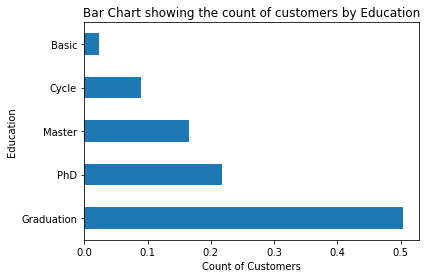

In [41]:
# Let us look at the categorical variables one by one and see if any data cleaning is required
# Let us start with Education.
# 50% of the customers are graduates
cust_pur.Education.value_counts(normalize=True).plot.barh()
plt.title("Bar Chart showing the count of customers by Education")
plt.xlabel("Count of Customers")
plt.ylabel("Education")
plt.show()

In [42]:
# We will look at the records under Marital_Status
cust_pur.Marital_Status.value_counts(normalize=True)*100

Married     38.640429
Together    25.849732
Single      21.422182
Divorced    10.330948
Widow        3.443649
Alone        0.134168
Absurd       0.089445
YOLO         0.089445
Name: Marital_Status, dtype: float64

In [43]:
# Let us find the cumulative records in % terms to decide on the clubbing
cust_pur.Marital_Status.value_counts(normalize=True).cumsum()

Married     0.386404
Together    0.644902
Single      0.859123
Divorced    0.962433
Widow       0.996869
Alone       0.998211
Absurd      0.999106
YOLO        1.000000
Name: Marital_Status, dtype: float64

In [44]:
# Clubbing the marital status insignificant in % terms
value_to_keep=cust_pur.Marital_Status.value_counts(normalize=True).index[:4]
cust_pur["Marital_Status"]= cust_pur["Marital_Status"].apply(lambda x: x if x in value_to_keep else "Others")


In [45]:
# Let us see the records after clubbing
cust_pur.Marital_Status.value_counts(normalize=True)*100

Married     38.640429
Together    25.849732
Single      21.422182
Divorced    10.330948
Others       3.756708
Name: Marital_Status, dtype: float64

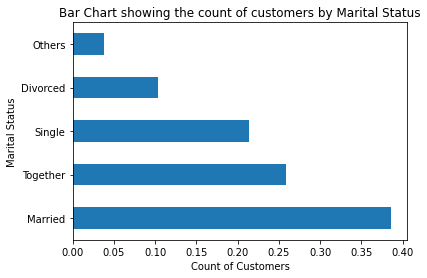

In [46]:
# Let us plot a bar chart for the same
# Almost 64% of the customers are either Married or Together.
cust_pur.Marital_Status.value_counts(normalize=True).plot.barh()
plt.title("Bar Chart showing the count of customers by Marital Status")
plt.xlabel("Count of Customers")
plt.ylabel("Marital Status")
plt.show()

#### Derived Features

In [47]:
# Let us use the Year_Birth to derive the age of the customer in the year "2024"
cust_pur["Age_in_years"]=2024-cust_pur["Year_Birth"]
cust_pur.head()

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0   387        1976     Basic        Married   7500.0        0         0   
1  8373        1979     Basic       Together  24594.0        1         0   
2  5342        1976     Basic       Divorced   9548.0        1         0   
3  2563        1961     Basic        Married  28249.0        0         0   
4  9733        1978     Basic       Together  24882.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-11-13       59         6         16               11               11   
1  2013-12-10       94         1          3                6               10   
2  2012-08-08       31         0          1                3               10   
3  2014-06-15       80         1          9                7                2   
4  2012-09-09       52         1          4               10               29   

   MntSweetProducts  MntSnacksProds  NumDealsPurchases  NumWebPurchases  \
0                 1              16                  1                2   
1                 0               9                  1                1   
2                 6               9                  2                1   
3                14              10                  1                2   
4                 0              36                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    0                  3                  8             0   
1                    0                  3                  5             0   
2                    0                  3                  8             0   
3                    0                  3                  6             0   
4                    1                  2                  6             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0       0.0   
1             0             0             0             0         0       0.0   
2             0             0             0             0         0       0.0   
3             0             0             0             0         0       0.0   
4             0             0             0             0         0       0.0   

   Age_in_years  
0            48  
1            45  
2            48  
3            63  
4            46

In [48]:
# Let us use 01-01-2024 as the base to see the number of years for which the customer has been a loyal customer
cust_pur["LoyaltyAsOn"]='01-01-2024'
cust_pur["LoyaltyAsOn"]=pd.to_datetime(cust_pur["LoyaltyAsOn"],format="%d-%m-%Y")
cust_pur.head()

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0   387        1976     Basic        Married   7500.0        0         0   
1  8373        1979     Basic       Together  24594.0        1         0   
2  5342        1976     Basic       Divorced   9548.0        1         0   
3  2563        1961     Basic        Married  28249.0        0         0   
4  9733        1978     Basic       Together  24882.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-11-13       59         6         16               11               11   
1  2013-12-10       94         1          3                6               10   
2  2012-08-08       31         0          1                3               10   
3  2014-06-15       80         1          9                7                2   
4  2012-09-09       52         1          4               10               29   

   MntSweetProducts  MntSnacksProds  NumDealsPurchases  NumWebPurchases  \
0                 1              16                  1                2   
1                 0               9                  1                1   
2                 6               9                  2                1   
3                14              10                  1                2   
4                 0              36                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    0                  3                  8             0   
1                    0                  3                  5             0   
2                    0                  3                  8             0   
3                    0                  3                  6             0   
4                    1                  2                  6             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0       0.0   
1             0             0             0             0         0       0.0   
2             0             0             0             0         0       0.0   
3             0             0             0             0         0       0.0   
4             0             0             0             0         0       0.0   

   Age_in_years LoyaltyAsOn  
0            48  2024-01-01  
1            45  2024-01-01  
2            48  2024-01-01  
3            63  2024-01-01  
4            46  2024-01-01

In [49]:
# Let us create a variable "Loyalty_in_years"
cust_pur["Loyalty_in_years"]= round((cust_pur["LoyaltyAsOn"]-cust_pur["Dt_Customer"]).dt.days/365,0)

In [50]:
# let us check few records after the above changes
cust_pur.head()

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0   387        1976     Basic        Married   7500.0        0         0   
1  8373        1979     Basic       Together  24594.0        1         0   
2  5342        1976     Basic       Divorced   9548.0        1         0   
3  2563        1961     Basic        Married  28249.0        0         0   
4  9733        1978     Basic       Together  24882.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-11-13       59         6         16               11               11   
1  2013-12-10       94         1          3                6               10   
2  2012-08-08       31         0          1                3               10   
3  2014-06-15       80         1          9                7                2   
4  2012-09-09       52         1          4               10               29   

   MntSweetProducts  MntSnacksProds  NumDealsPurchases  NumWebPurchases  \
0                 1              16                  1                2   
1                 0               9                  1                1   
2                 6               9                  2                1   
3                14              10                  1                2   
4                 0              36                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    0                  3                  8             0   
1                    0                  3                  5             0   
2                    0                  3                  8             0   
3                    0                  3                  6             0   
4                    1                  2                  6             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0       0.0   
1             0             0             0             0         0       0.0   
2             0             0             0             0         0       0.0   
3             0             0             0             0         0       0.0   
4             0             0             0             0         0       0.0   

   Age_in_years LoyaltyAsOn  Loyalty_in_years  
0            48  2024-01-01              11.0  
1            45  2024-01-01              10.0  
2            48  2024-01-01              11.0  
3            63  2024-01-01              10.0  
4            46  2024-01-01              11.0

In [51]:
# Let us check the shape of the dataframe after updation
cust_pur.shape

(2236, 30)

In [52]:
# Let us drop the columns that are not required after deriving new features
cust_pur.drop(["Year_Birth","Dt_Customer","LoyaltyAsOn"],axis=1,inplace=True)
cust_pur.shape

(2236, 27)

#### Renaming the columns

In [53]:
# Let us rename the existing columns for ease of understanding
cust_pur.rename(columns={"ID":"Customer_ID","MntWines":"Amount_Wines","MntFruits":"Amount_Fruits","MntMeatProducts":"Amount_Meat",
                        "MntFishProducts":"Amount_Fish","MntSweetProducts":"Amount_Sweets","MntSnacksProds":"Amount_Snacks",
                         "Complain":"Complaint"},inplace=True)
cust_pur.head()

Customer_ID Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0          387     Basic        Married   7500.0        0         0       59   
1         8373     Basic       Together  24594.0        1         0       94   
2         5342     Basic       Divorced   9548.0        1         0       31   
3         2563     Basic        Married  28249.0        0         0       80   
4         9733     Basic       Together  24882.0        1         0       52   

   Amount_Wines  Amount_Fruits  Amount_Meat  Amount_Fish  Amount_Sweets  \
0             6             16           11           11              1   
1             1              3            6           10              0   
2             0              1            3           10              6   
3             1              9            7            2             14   
4             1              4           10           29              0   

   Amount_Snacks  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0             16                  1                2                    0   
1              9                  1                1                    0   
2              9                  2                1                    0   
3             10                  1                2                    0   
4             36                  1                1                    1   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  3                  8             0             0   
1                  3                  5             0             0   
2                  3                  8             0             0   
3                  3                  6             0             0   
4                  2                  6             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complaint  Response  \
0             0             0             0          0       0.0   
1             0             0             0          0       0.0   
2             0             0             0          0       0.0   
3             0             0             0          0       0.0   
4             0             0             0          0       0.0   

   Age_in_years  Loyalty_in_years  
0            48              11.0  
1            45              10.0  
2            48              11.0  
3            63              10.0  
4            46              11.0

#### Categorising the variables

In [54]:
# Let us look at the names of all the columns in the dataframe.
cust_pur.columns

Index(['Customer_ID', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'Amount_Wines', 'Amount_Fruits', 'Amount_Meat',
       'Amount_Fish', 'Amount_Sweets', 'Amount_Snacks', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complaint', 'Response', 'Age_in_years',
       'Loyalty_in_years'],
      dtype='object')

In [55]:
# Let us create list of the categorical and numeric variables in the dataframe for ease of analysis and visualisation
cat_vars=['Education', 'Marital_Status']
cat_binary_vars=['Response','Complaint','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2']
num_vars=['Income', 'Kidhome',
       'Teenhome', 'Recency', 'Amount_Wines', 'Amount_Fruits', 'Amount_Meat',
       'Amount_Fish', 'Amount_Sweets', 'Amount_Snacks', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth','Age_in_years',
       'Loyalty_in_years']
other_vars=['Customer_ID']

In [56]:
print("The number of categorical variables are :", len(cat_vars))
print("The number of categorical binary variables are :", len(cat_binary_vars))
print("The number of numerical variables are :", len(num_vars))

The number of categorical variables are : 2
The number of categorical binary variables are : 7
The number of numerical variables are : 17


## 2. Customer Segmentation

### iii. Data Visualisation

#### Bivariate and Multi-variate Analysis

We have done the univariate analysis of the numeric and categorical variables at the time of data cleaning.

Now, we will do a bivariate and multivariate analysis

#### Categorical vs Numeric

Boxplot Education Vs Income


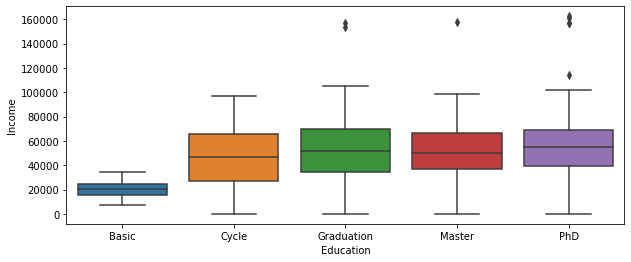

Boxplot Education Vs Kidhome


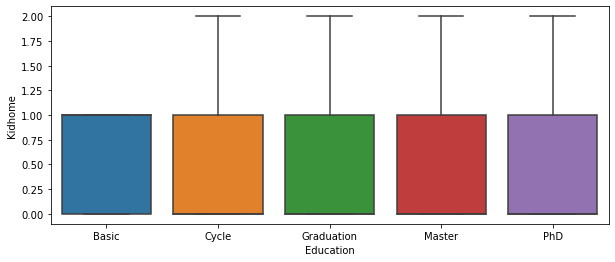

Boxplot Education Vs Teenhome


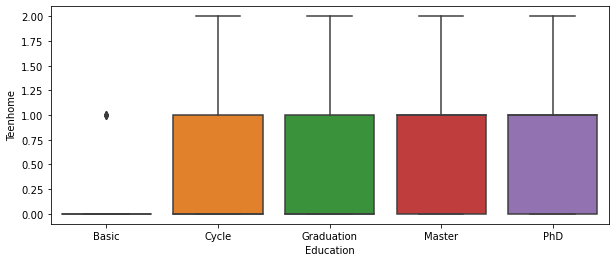

Boxplot Education Vs Recency


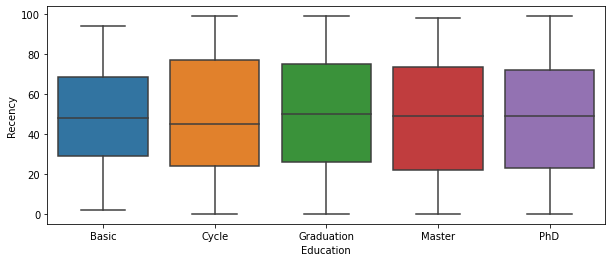

Boxplot Education Vs Amount_Wines


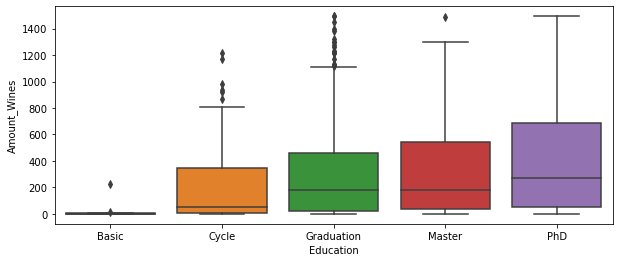

Boxplot Education Vs Amount_Fruits


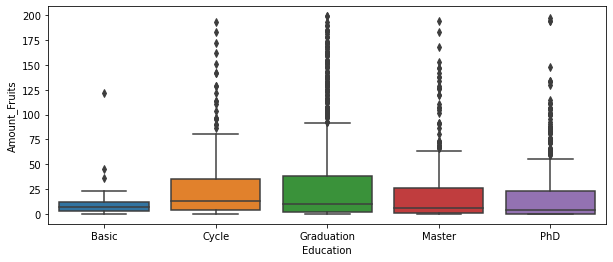

Boxplot Education Vs Amount_Meat


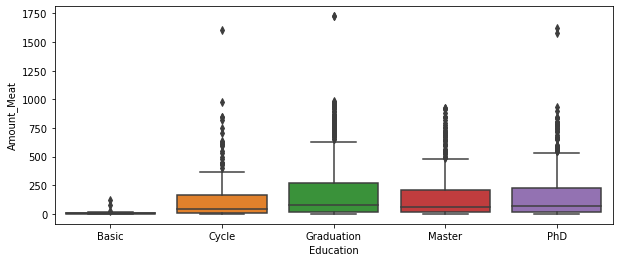

Boxplot Education Vs Amount_Fish


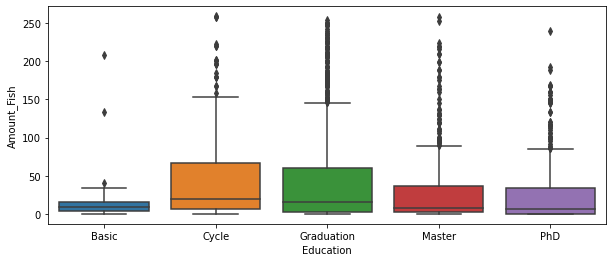

Boxplot Education Vs Amount_Sweets


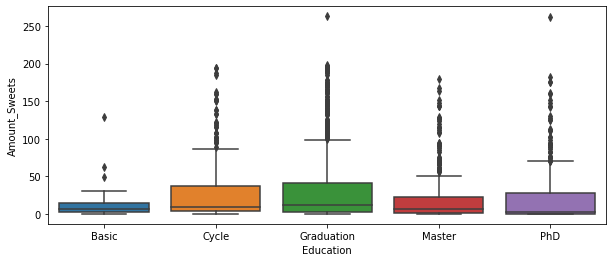

Boxplot Education Vs Amount_Snacks


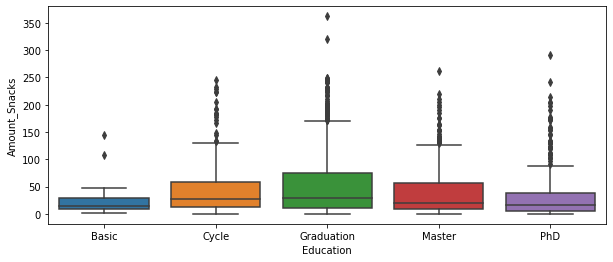

Boxplot Education Vs NumDealsPurchases


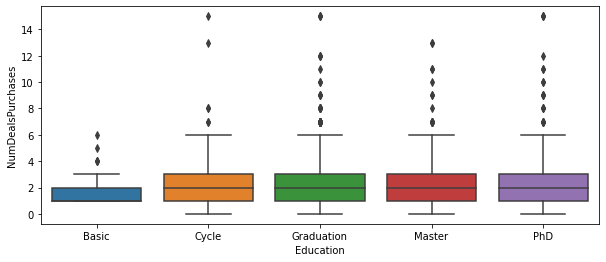

Boxplot Education Vs NumWebPurchases


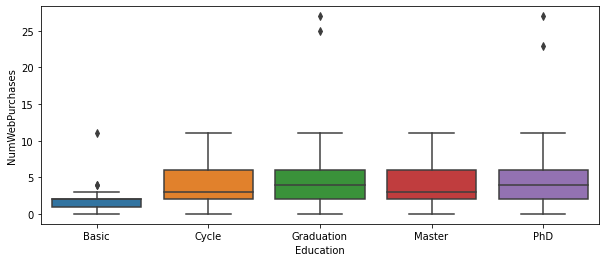

Boxplot Education Vs NumCatalogPurchases


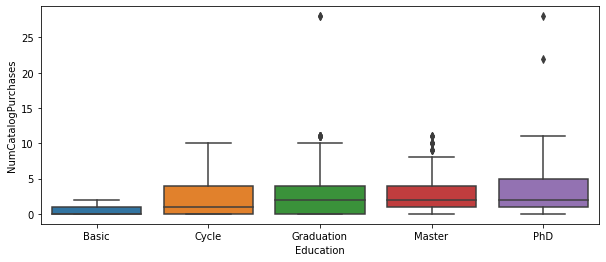

Boxplot Education Vs NumStorePurchases


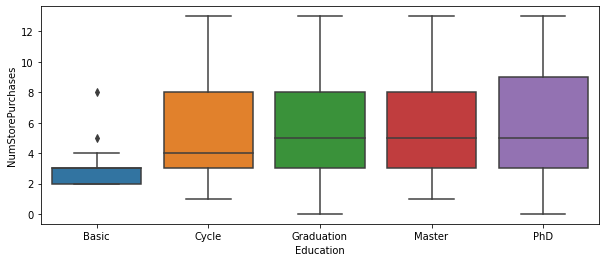

Boxplot Education Vs NumWebVisitsMonth


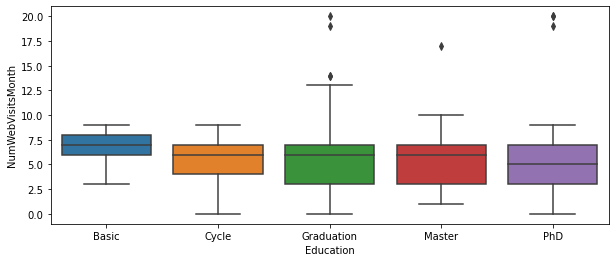

Boxplot Education Vs Age_in_years


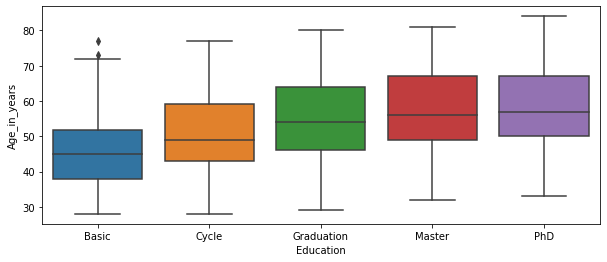

Boxplot Education Vs Loyalty_in_years


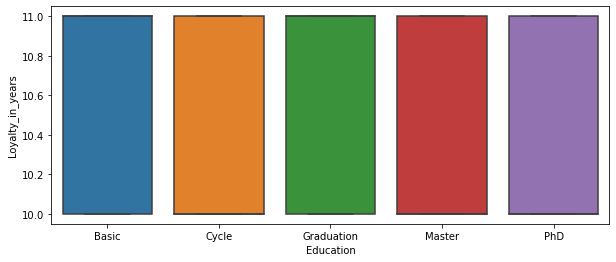

Boxplot Marital_Status Vs Income


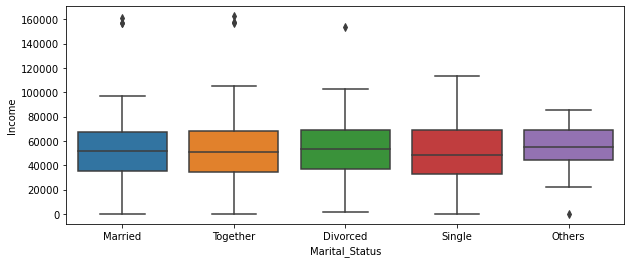

Boxplot Marital_Status Vs Kidhome


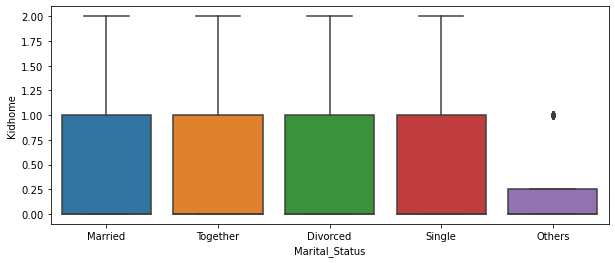

Boxplot Marital_Status Vs Teenhome


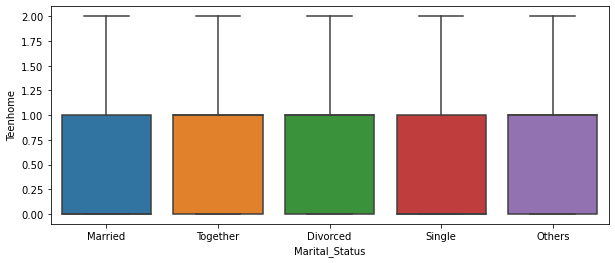

Boxplot Marital_Status Vs Recency


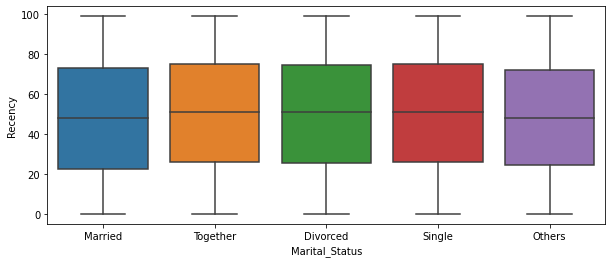

Boxplot Marital_Status Vs Amount_Wines


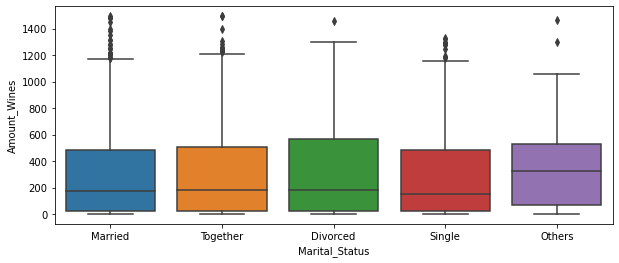

Boxplot Marital_Status Vs Amount_Fruits


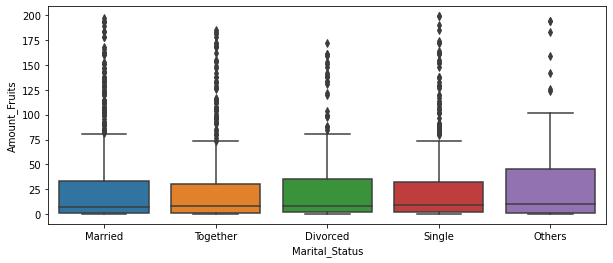

Boxplot Marital_Status Vs Amount_Meat


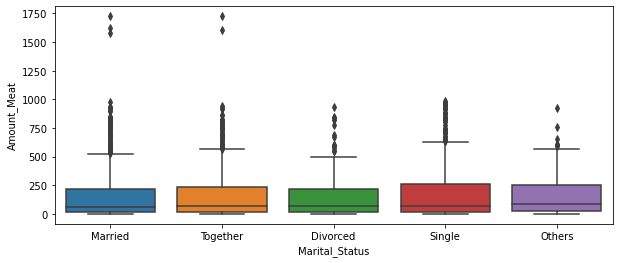

Boxplot Marital_Status Vs Amount_Fish


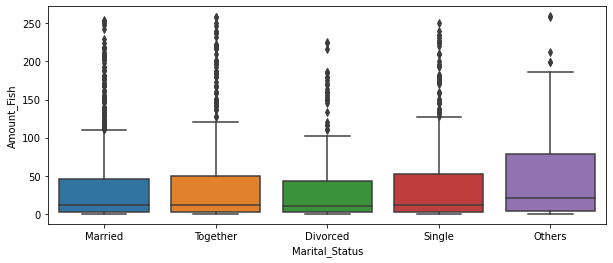

Boxplot Marital_Status Vs Amount_Sweets


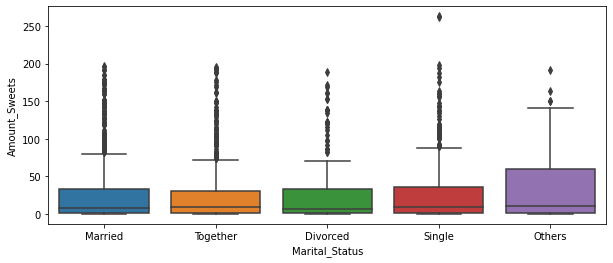

Boxplot Marital_Status Vs Amount_Snacks


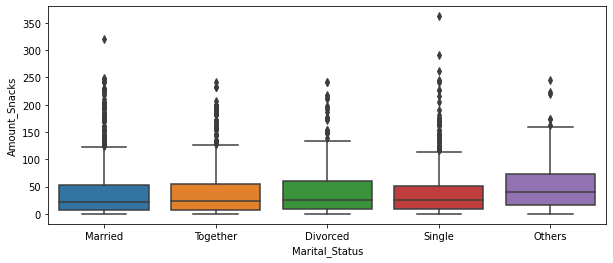

Boxplot Marital_Status Vs NumDealsPurchases


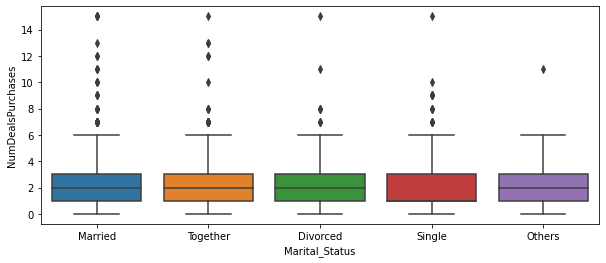

Boxplot Marital_Status Vs NumWebPurchases


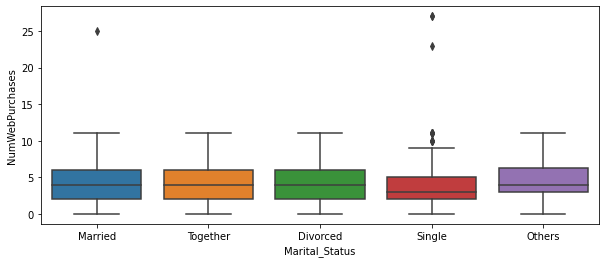

Boxplot Marital_Status Vs NumCatalogPurchases


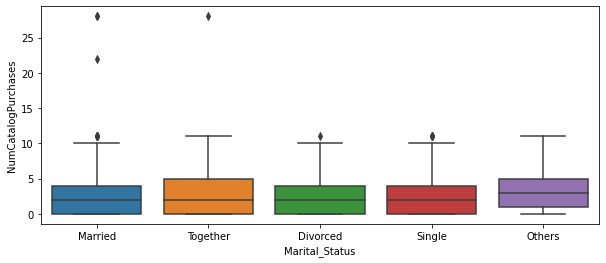

Boxplot Marital_Status Vs NumStorePurchases


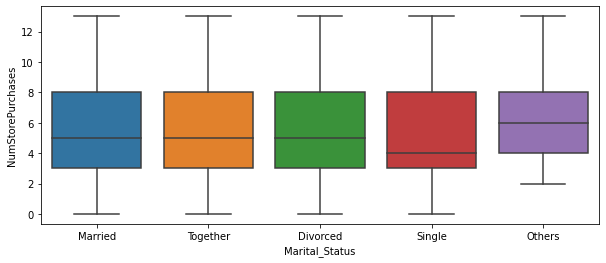

Boxplot Marital_Status Vs NumWebVisitsMonth


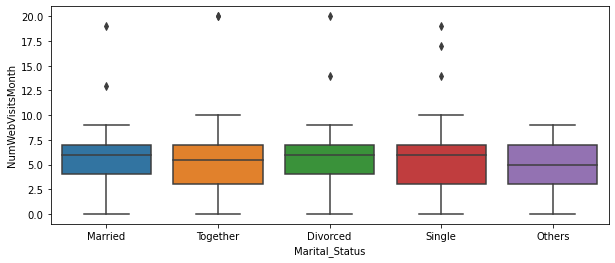

Boxplot Marital_Status Vs Age_in_years


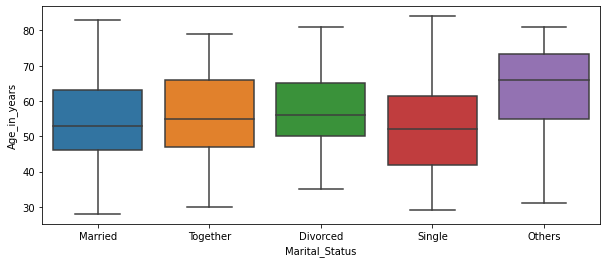

Boxplot Marital_Status Vs Loyalty_in_years


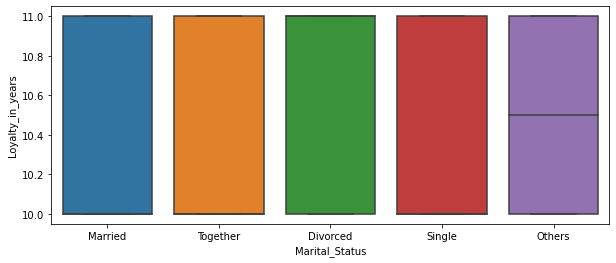

In [57]:
# We will plot boxplots for the same and look for insights with the visualisation
for i in cat_vars:
    for j in num_vars:
        plt.figure(figsize=(10,4))
        print("Boxplot",i ,"Vs",j)
        sns.boxplot(x=i,y=j,data=cust_pur,)
        plt.show()

Boxplot Response Vs Income


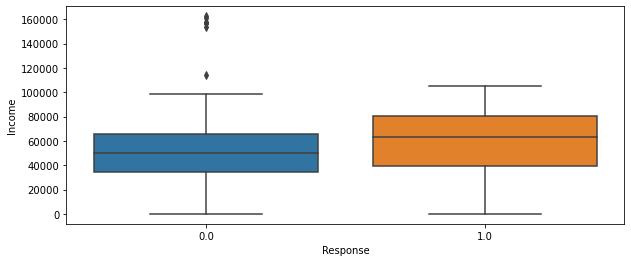

Boxplot Response Vs Kidhome


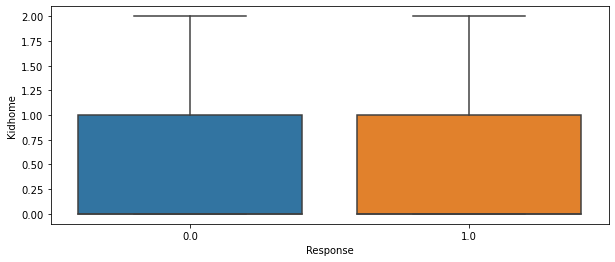

Boxplot Response Vs Teenhome


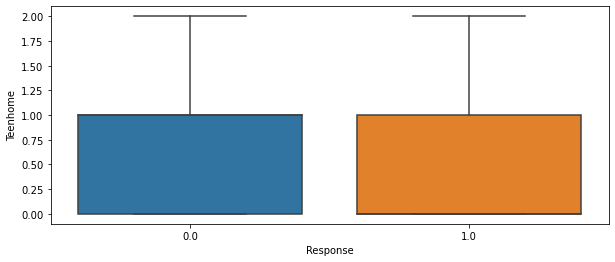

Boxplot Response Vs Recency


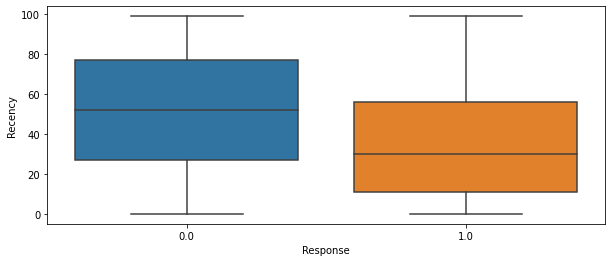

Boxplot Response Vs Amount_Wines


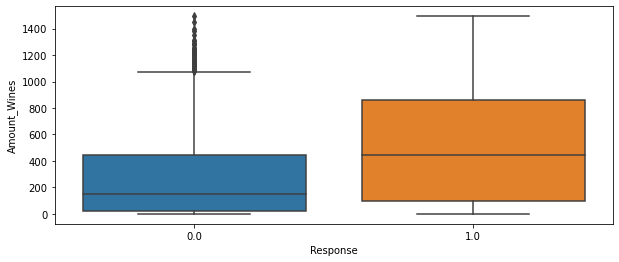

Boxplot Response Vs Amount_Fruits


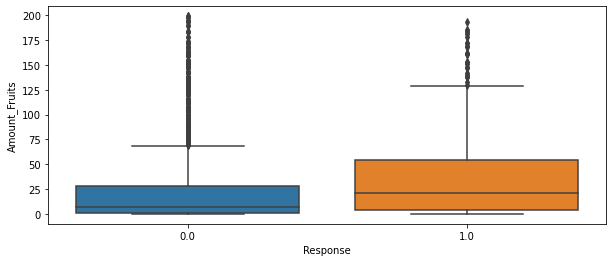

Boxplot Response Vs Amount_Meat


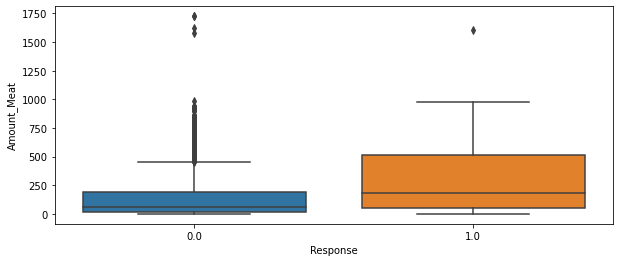

Boxplot Response Vs Amount_Fish


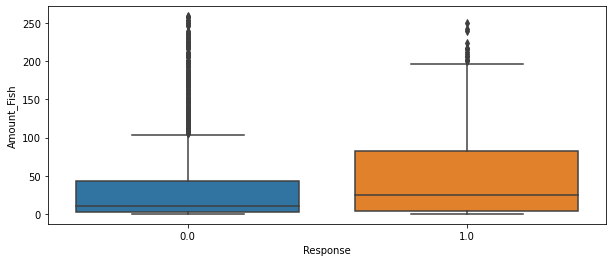

Boxplot Response Vs Amount_Sweets


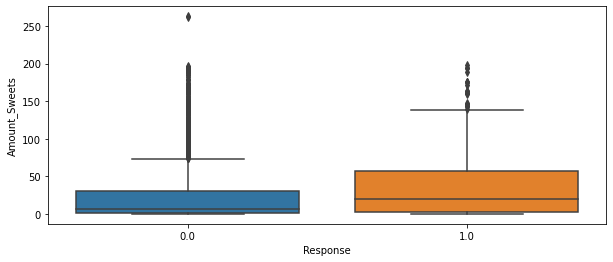

Boxplot Response Vs Amount_Snacks


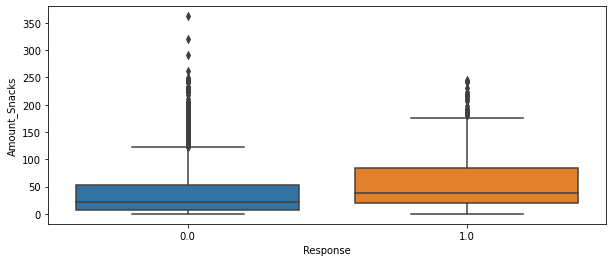

Boxplot Response Vs NumDealsPurchases


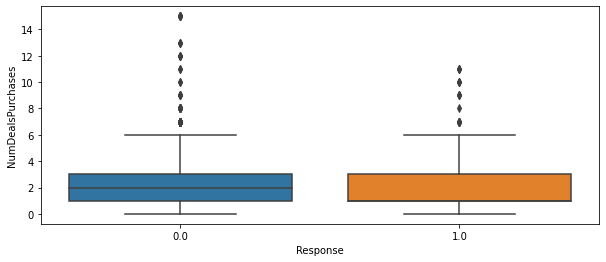

Boxplot Response Vs NumWebPurchases


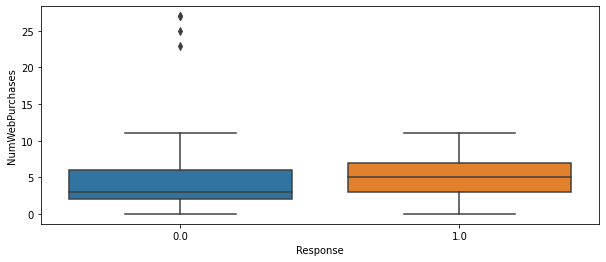

Boxplot Response Vs NumCatalogPurchases


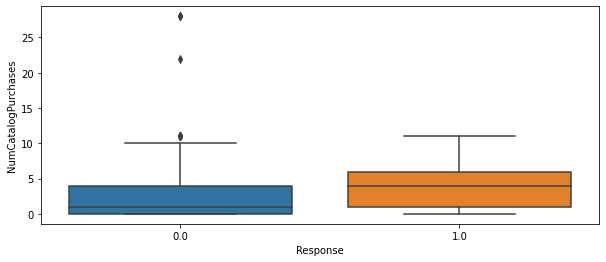

Boxplot Response Vs NumStorePurchases


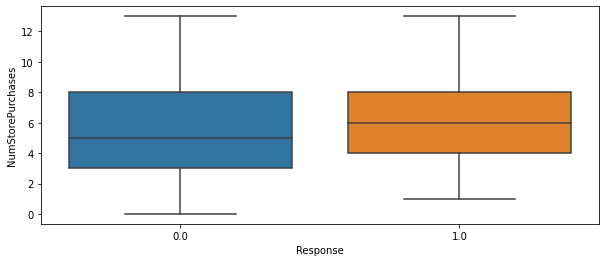

Boxplot Response Vs NumWebVisitsMonth


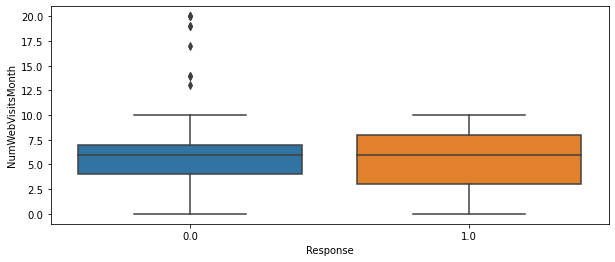

Boxplot Response Vs Age_in_years


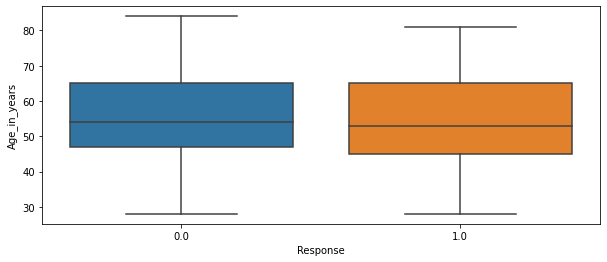

Boxplot Response Vs Loyalty_in_years


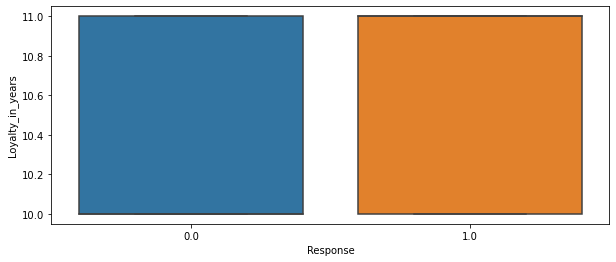

Boxplot Complaint Vs Income


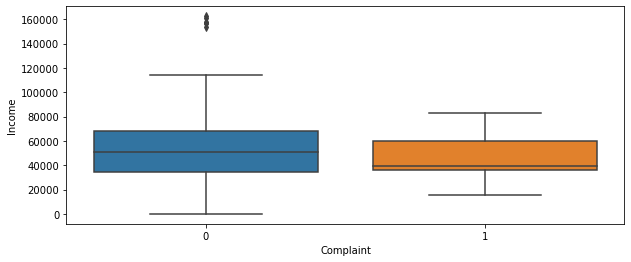

Boxplot Complaint Vs Kidhome


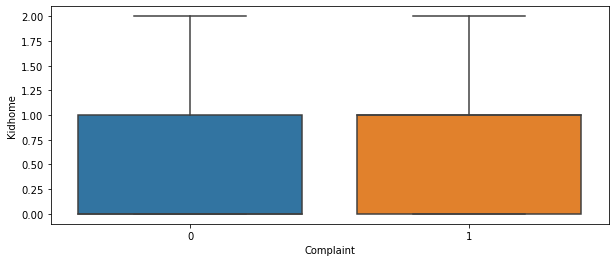

Boxplot Complaint Vs Teenhome


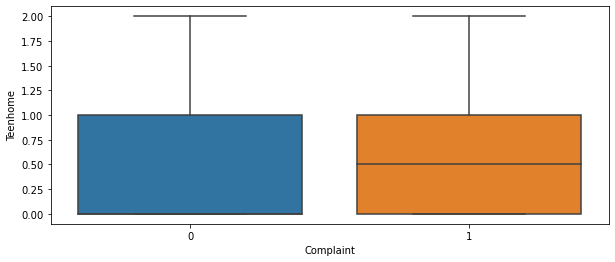

Boxplot Complaint Vs Recency


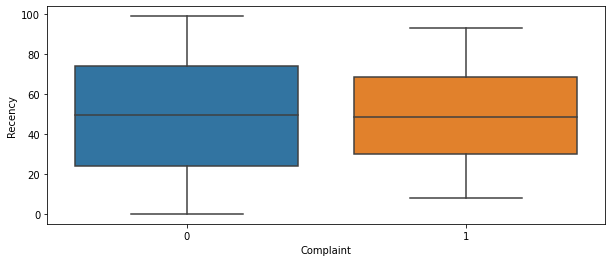

Boxplot Complaint Vs Amount_Wines


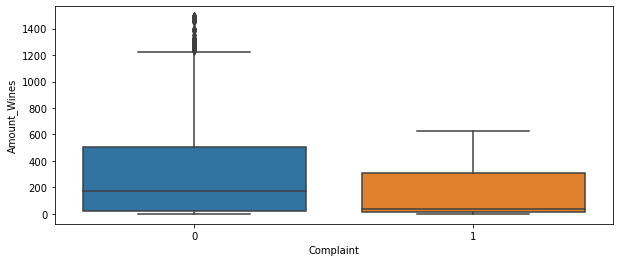

Boxplot Complaint Vs Amount_Fruits


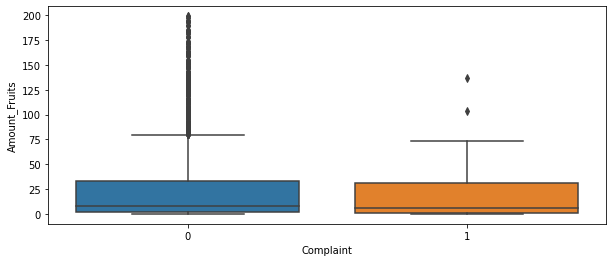

Boxplot Complaint Vs Amount_Meat


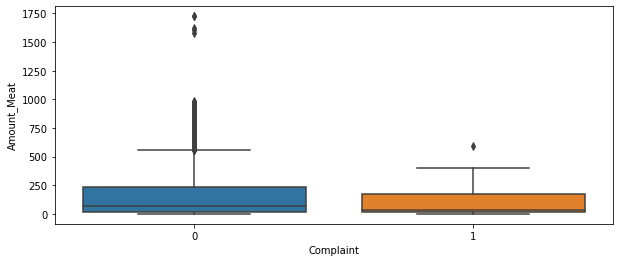

Boxplot Complaint Vs Amount_Fish


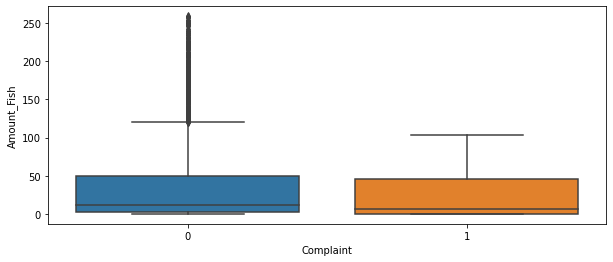

Boxplot Complaint Vs Amount_Sweets


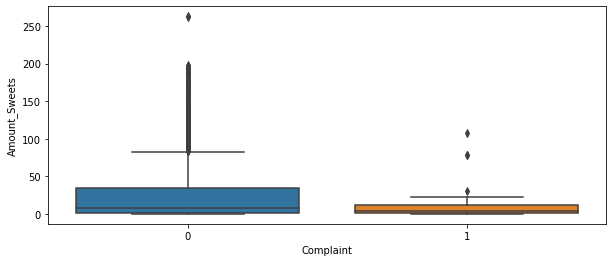

Boxplot Complaint Vs Amount_Snacks


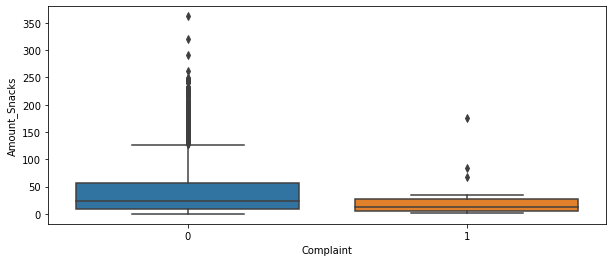

Boxplot Complaint Vs NumDealsPurchases


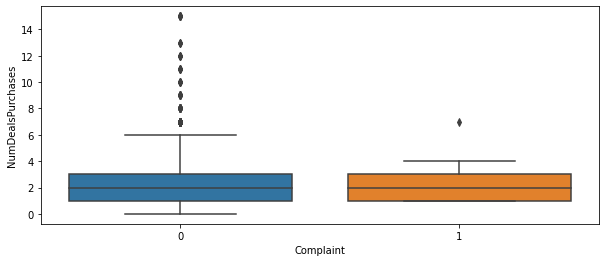

Boxplot Complaint Vs NumWebPurchases


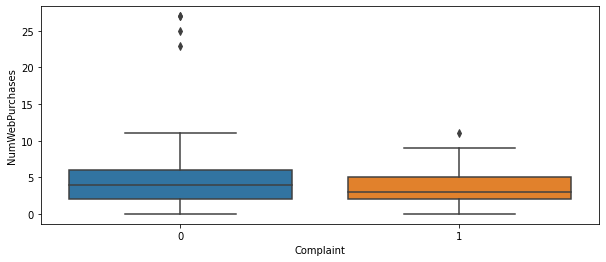

Boxplot Complaint Vs NumCatalogPurchases


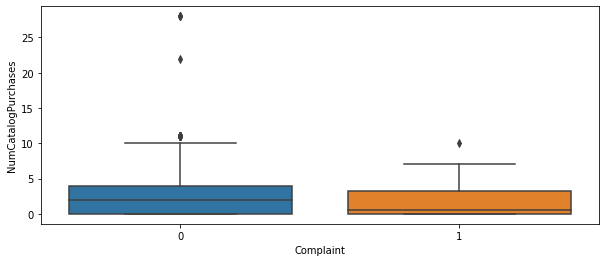

Boxplot Complaint Vs NumStorePurchases


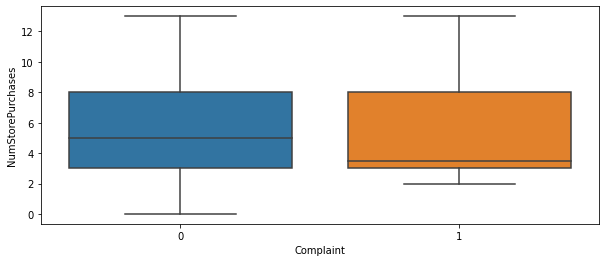

Boxplot Complaint Vs NumWebVisitsMonth


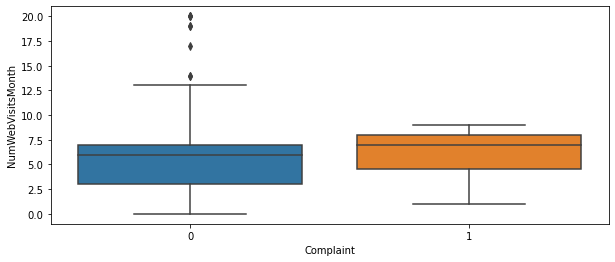

Boxplot Complaint Vs Age_in_years


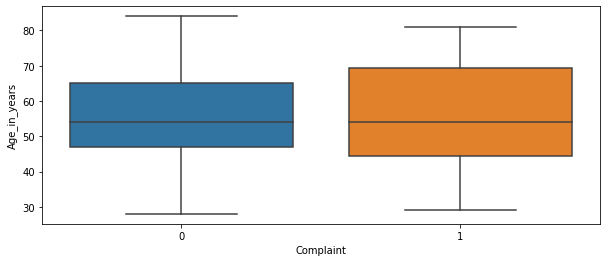

Boxplot Complaint Vs Loyalty_in_years


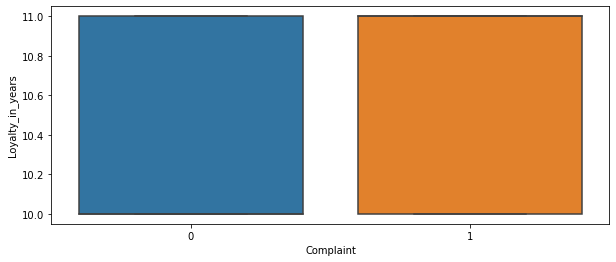

Boxplot AcceptedCmp3 Vs Income


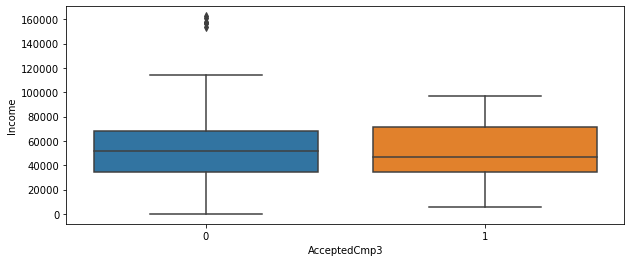

Boxplot AcceptedCmp3 Vs Kidhome


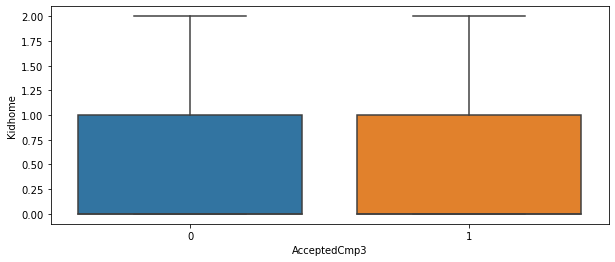

Boxplot AcceptedCmp3 Vs Teenhome


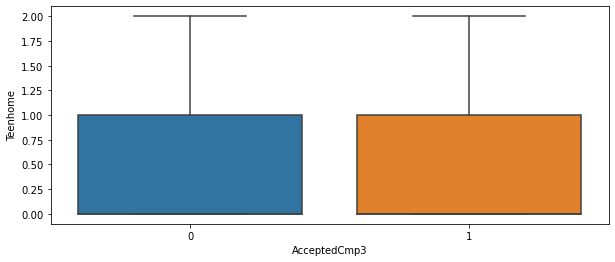

Boxplot AcceptedCmp3 Vs Recency


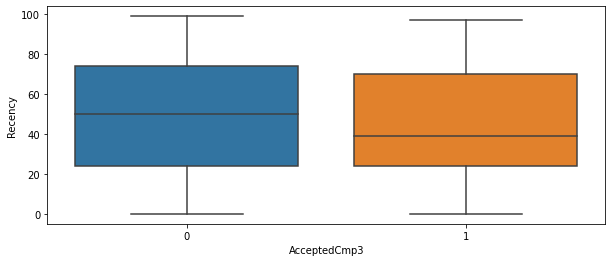

Boxplot AcceptedCmp3 Vs Amount_Wines


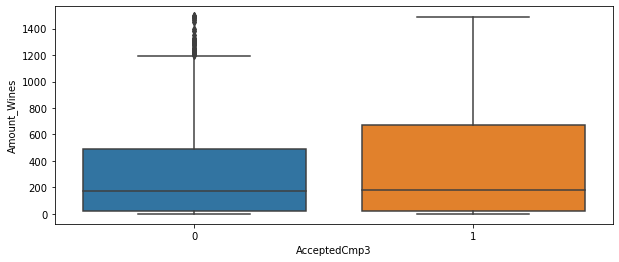

Boxplot AcceptedCmp3 Vs Amount_Fruits


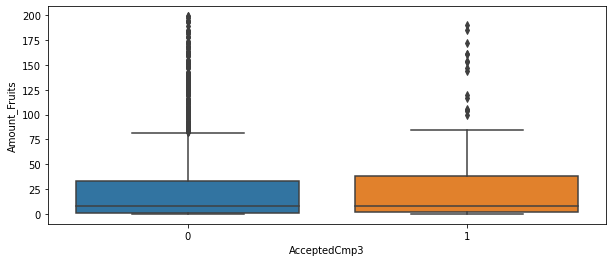

Boxplot AcceptedCmp3 Vs Amount_Meat


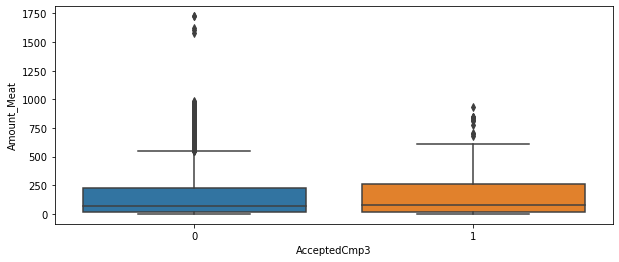

Boxplot AcceptedCmp3 Vs Amount_Fish


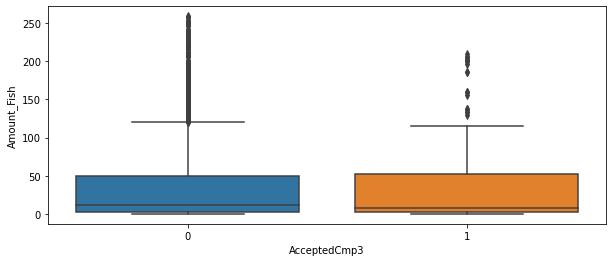

Boxplot AcceptedCmp3 Vs Amount_Sweets


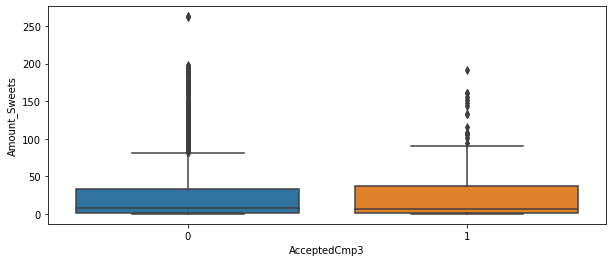

Boxplot AcceptedCmp3 Vs Amount_Snacks


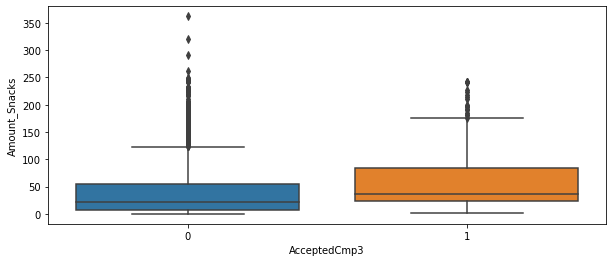

Boxplot AcceptedCmp3 Vs NumDealsPurchases


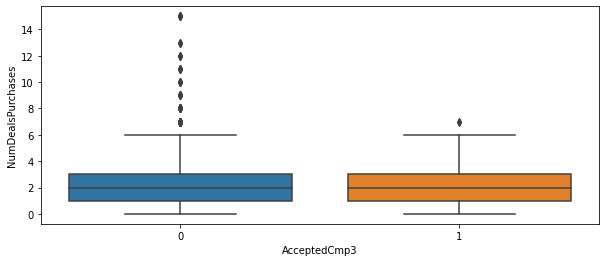

Boxplot AcceptedCmp3 Vs NumWebPurchases


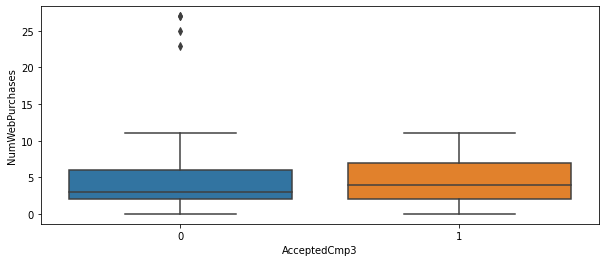

Boxplot AcceptedCmp3 Vs NumCatalogPurchases


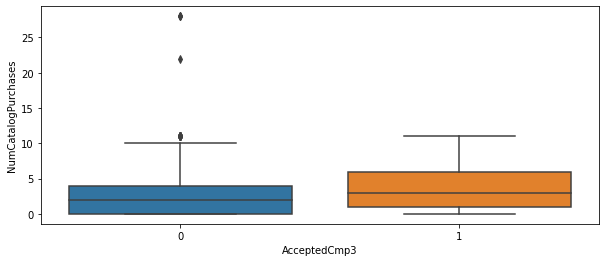

Boxplot AcceptedCmp3 Vs NumStorePurchases


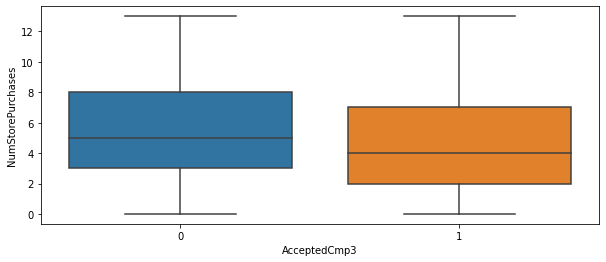

Boxplot AcceptedCmp3 Vs NumWebVisitsMonth


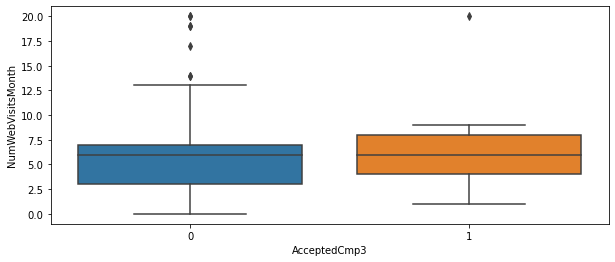

Boxplot AcceptedCmp3 Vs Age_in_years


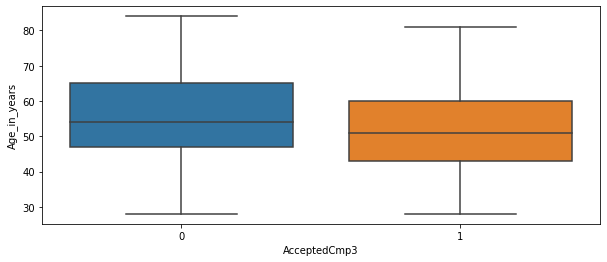

Boxplot AcceptedCmp3 Vs Loyalty_in_years


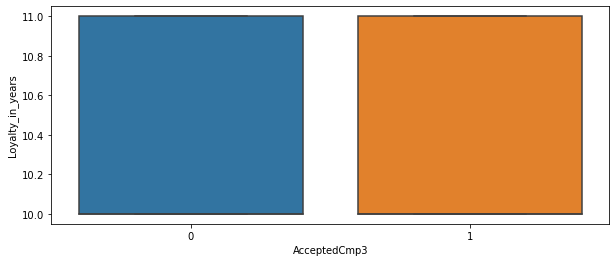

Boxplot AcceptedCmp4 Vs Income


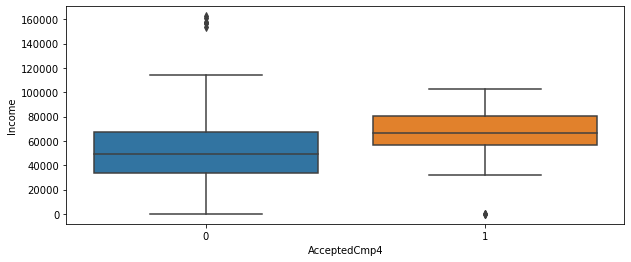

Boxplot AcceptedCmp4 Vs Kidhome


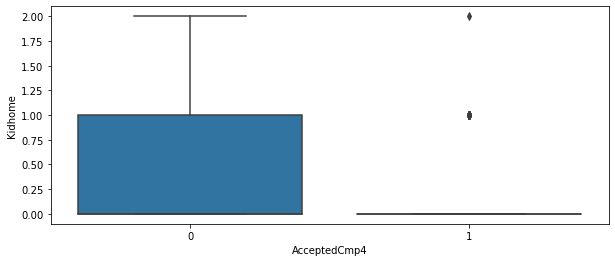

Boxplot AcceptedCmp4 Vs Teenhome


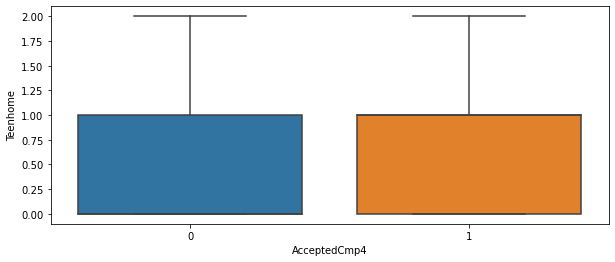

Boxplot AcceptedCmp4 Vs Recency


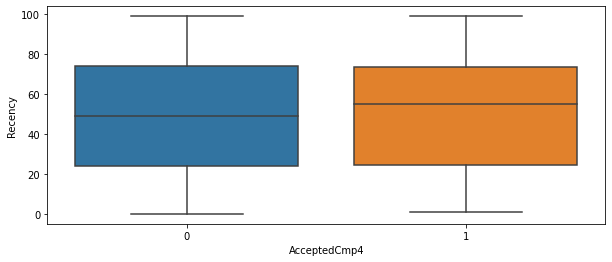

Boxplot AcceptedCmp4 Vs Amount_Wines


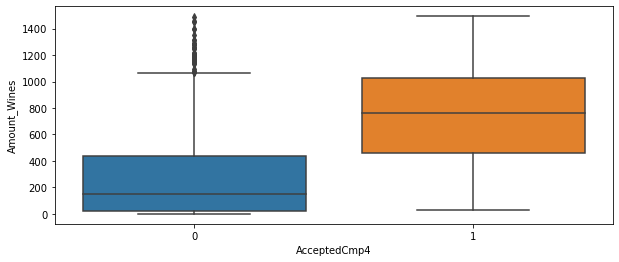

Boxplot AcceptedCmp4 Vs Amount_Fruits


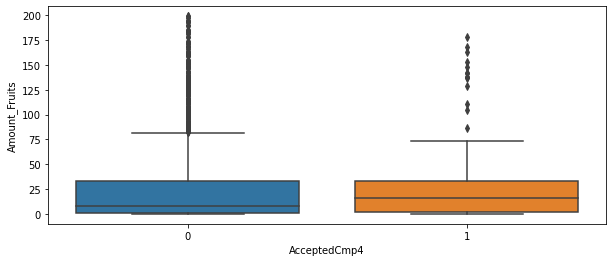

Boxplot AcceptedCmp4 Vs Amount_Meat


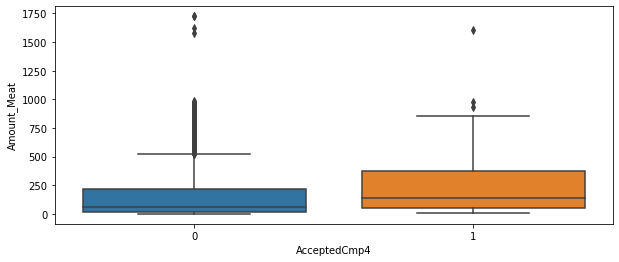

Boxplot AcceptedCmp4 Vs Amount_Fish


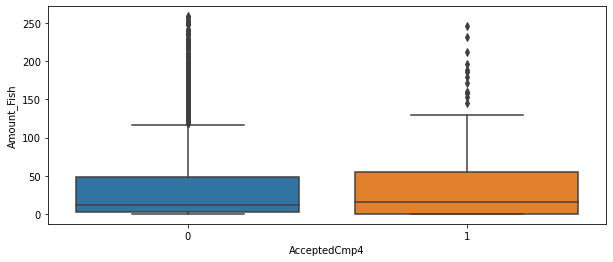

Boxplot AcceptedCmp4 Vs Amount_Sweets


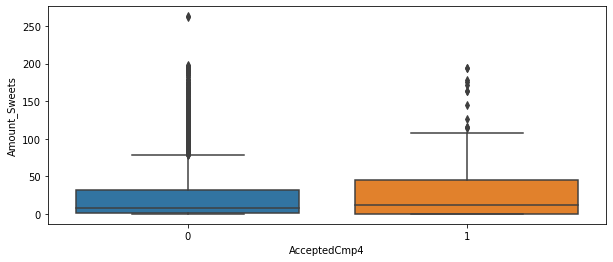

Boxplot AcceptedCmp4 Vs Amount_Snacks


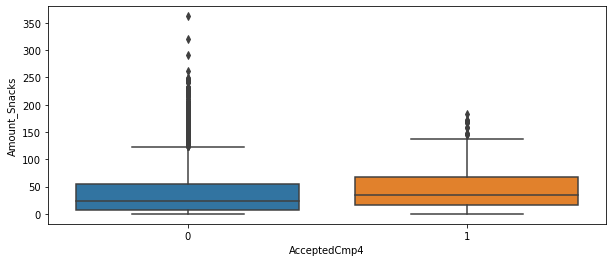

Boxplot AcceptedCmp4 Vs NumDealsPurchases


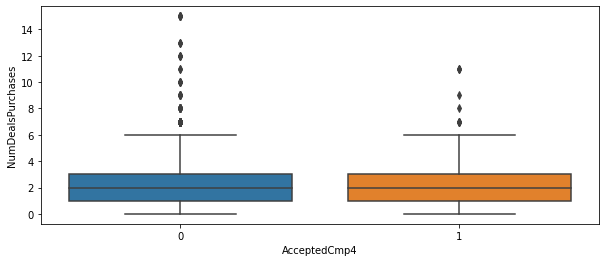

Boxplot AcceptedCmp4 Vs NumWebPurchases


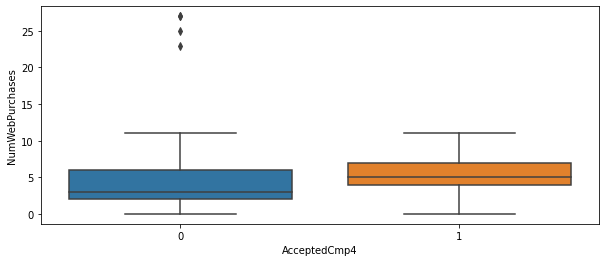

Boxplot AcceptedCmp4 Vs NumCatalogPurchases


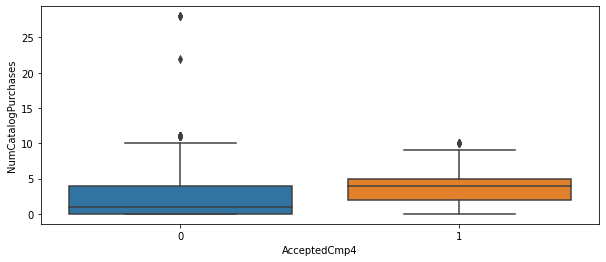

Boxplot AcceptedCmp4 Vs NumStorePurchases


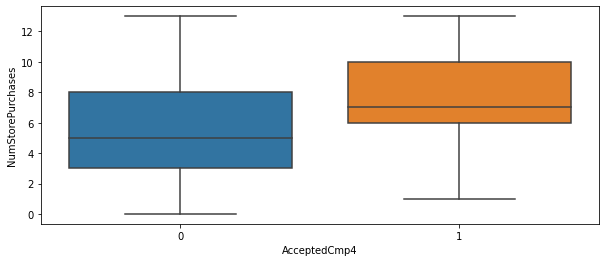

Boxplot AcceptedCmp4 Vs NumWebVisitsMonth


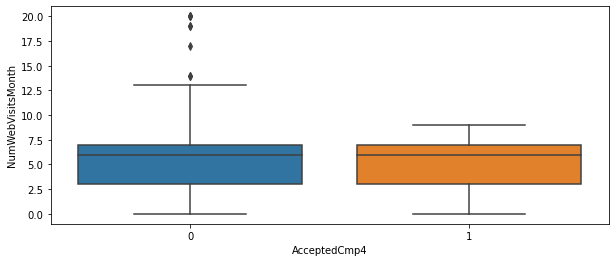

Boxplot AcceptedCmp4 Vs Age_in_years


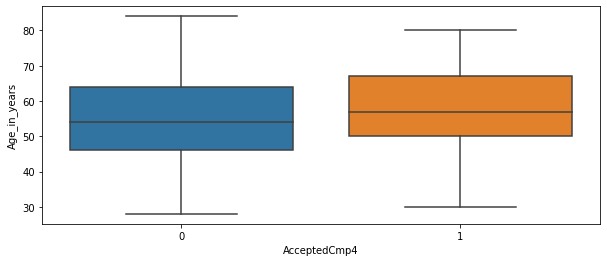

Boxplot AcceptedCmp4 Vs Loyalty_in_years


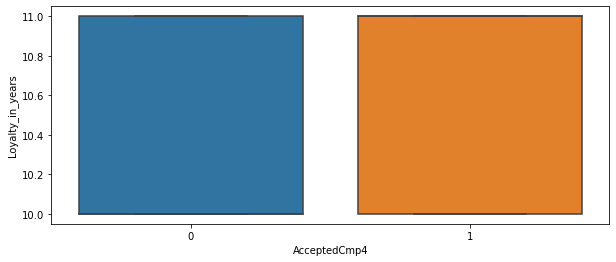

Boxplot AcceptedCmp5 Vs Income


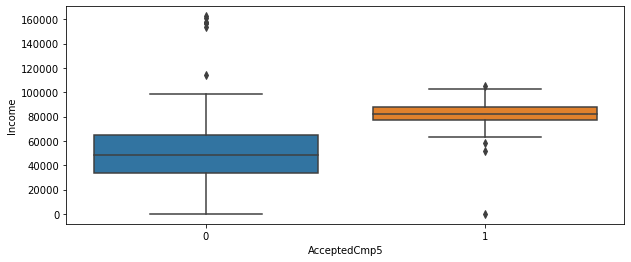

Boxplot AcceptedCmp5 Vs Kidhome


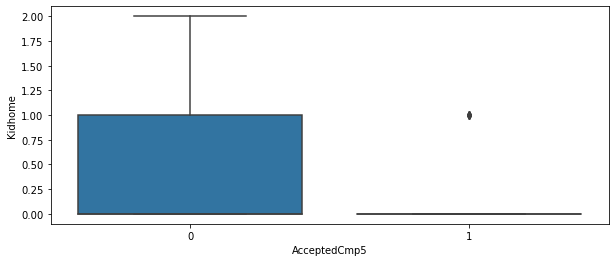

Boxplot AcceptedCmp5 Vs Teenhome


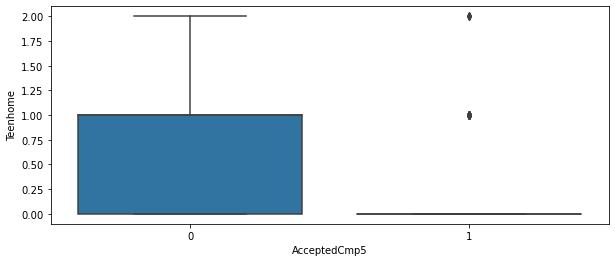

Boxplot AcceptedCmp5 Vs Recency


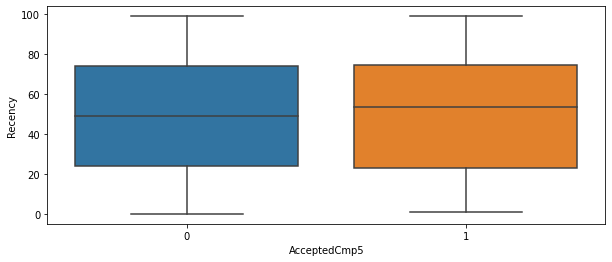

Boxplot AcceptedCmp5 Vs Amount_Wines


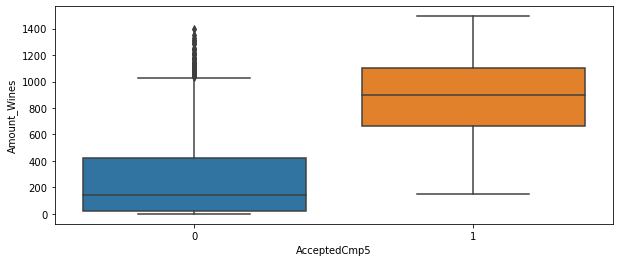

Boxplot AcceptedCmp5 Vs Amount_Fruits


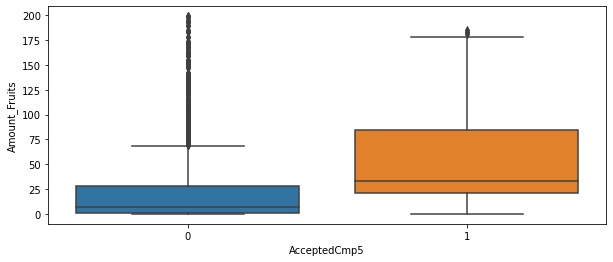

Boxplot AcceptedCmp5 Vs Amount_Meat


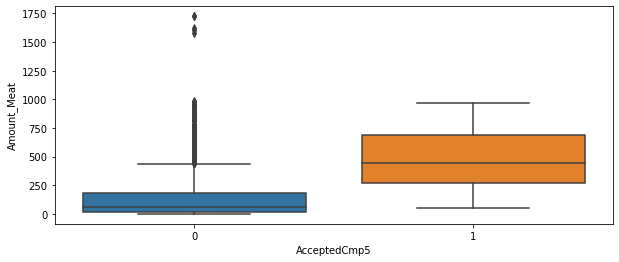

Boxplot AcceptedCmp5 Vs Amount_Fish


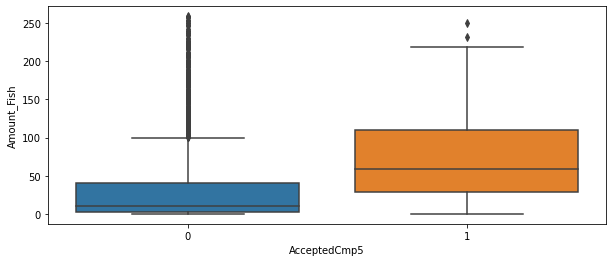

Boxplot AcceptedCmp5 Vs Amount_Sweets


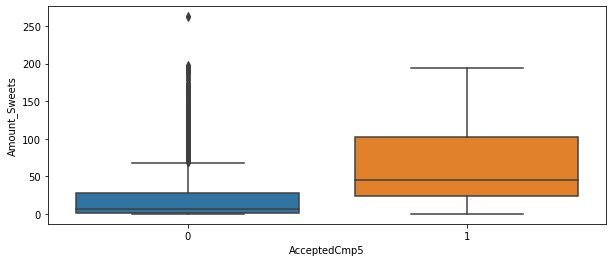

Boxplot AcceptedCmp5 Vs Amount_Snacks


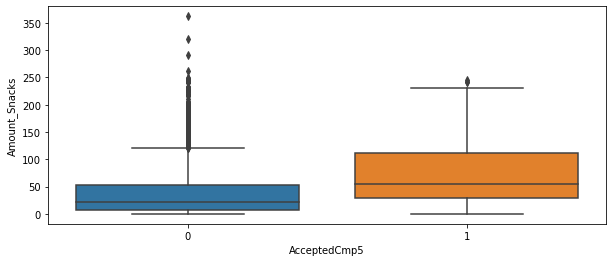

Boxplot AcceptedCmp5 Vs NumDealsPurchases


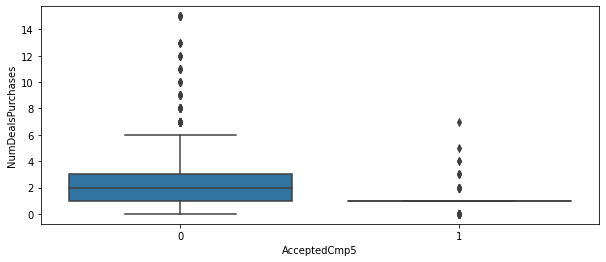

Boxplot AcceptedCmp5 Vs NumWebPurchases


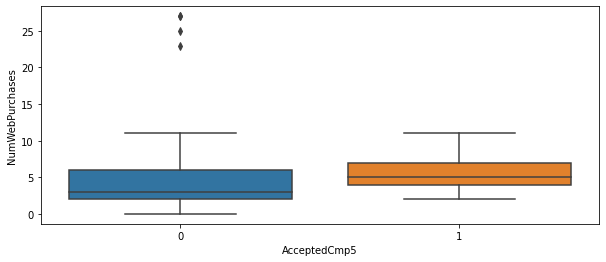

Boxplot AcceptedCmp5 Vs NumCatalogPurchases


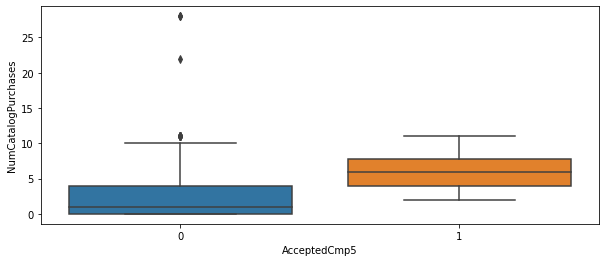

Boxplot AcceptedCmp5 Vs NumStorePurchases


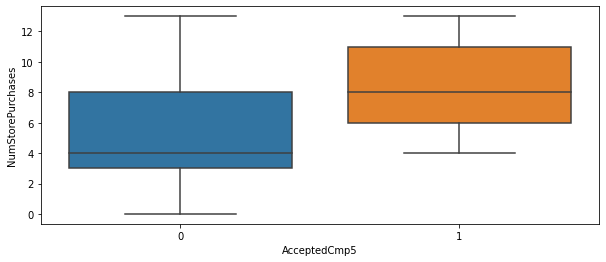

Boxplot AcceptedCmp5 Vs NumWebVisitsMonth


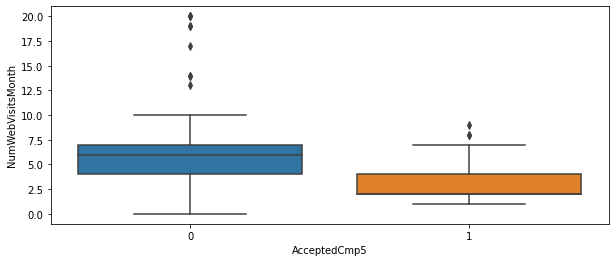

Boxplot AcceptedCmp5 Vs Age_in_years


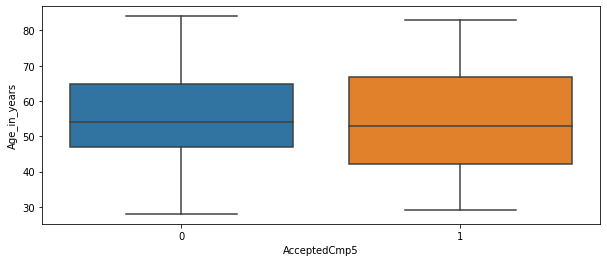

Boxplot AcceptedCmp5 Vs Loyalty_in_years


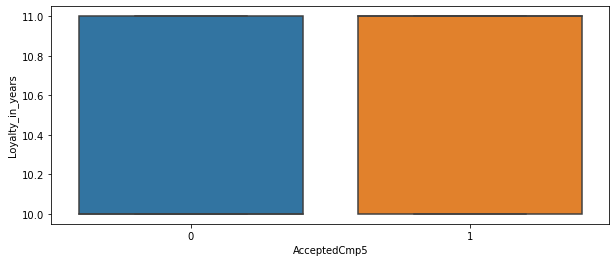

Boxplot AcceptedCmp1 Vs Income


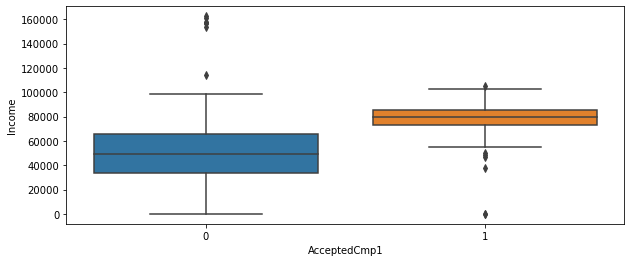

Boxplot AcceptedCmp1 Vs Kidhome


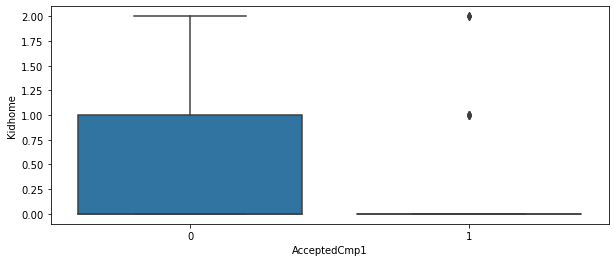

Boxplot AcceptedCmp1 Vs Teenhome


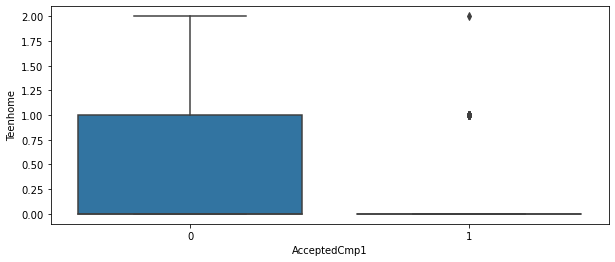

Boxplot AcceptedCmp1 Vs Recency


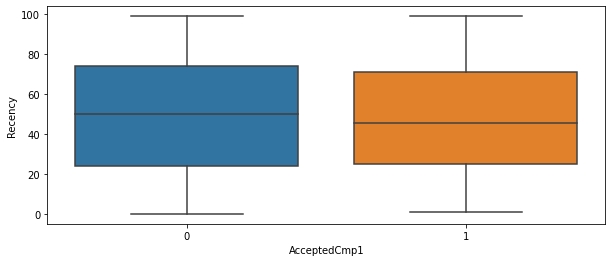

Boxplot AcceptedCmp1 Vs Amount_Wines


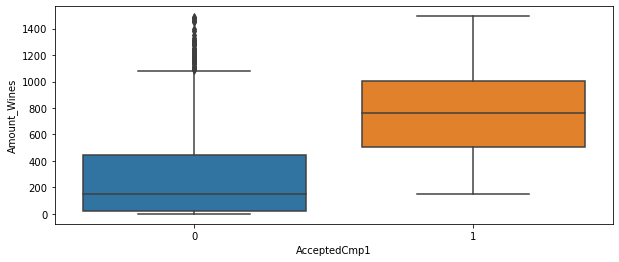

Boxplot AcceptedCmp1 Vs Amount_Fruits


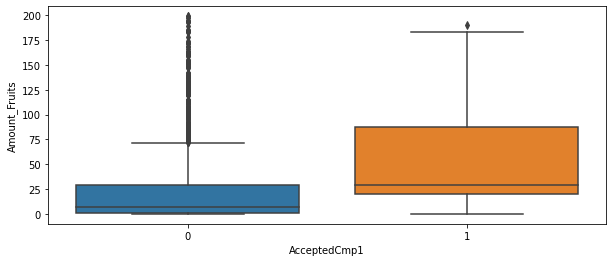

Boxplot AcceptedCmp1 Vs Amount_Meat


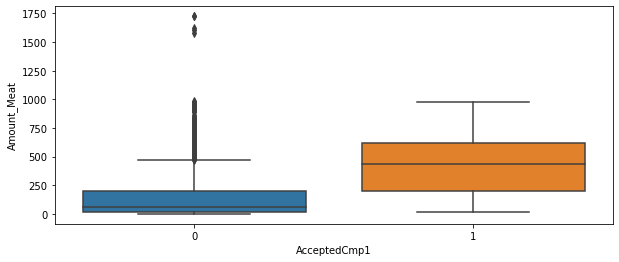

Boxplot AcceptedCmp1 Vs Amount_Fish


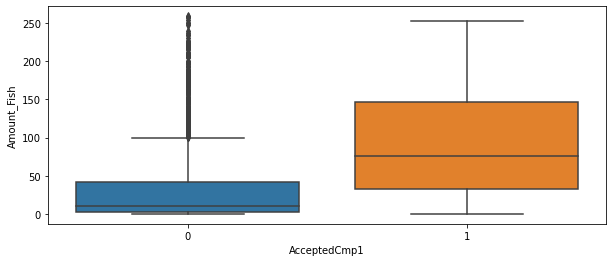

Boxplot AcceptedCmp1 Vs Amount_Sweets


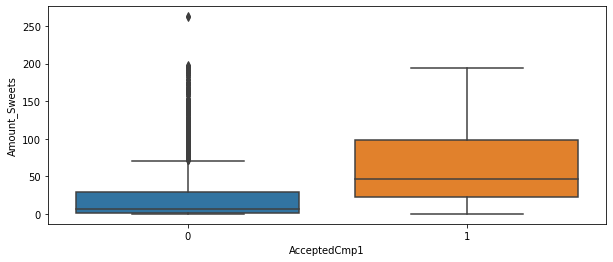

Boxplot AcceptedCmp1 Vs Amount_Snacks


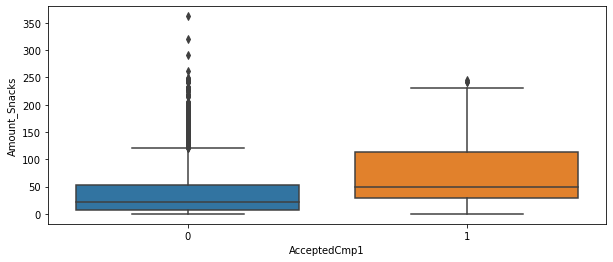

Boxplot AcceptedCmp1 Vs NumDealsPurchases


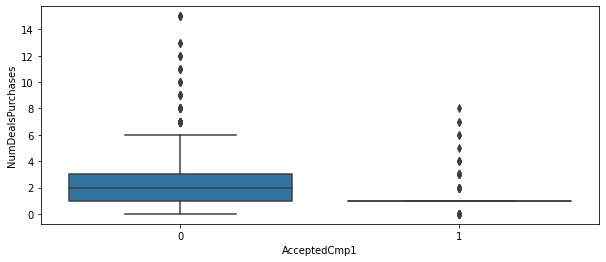

Boxplot AcceptedCmp1 Vs NumWebPurchases


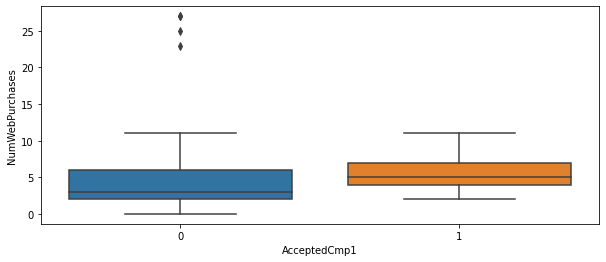

Boxplot AcceptedCmp1 Vs NumCatalogPurchases


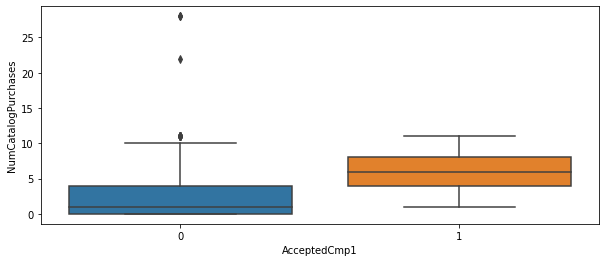

Boxplot AcceptedCmp1 Vs NumStorePurchases


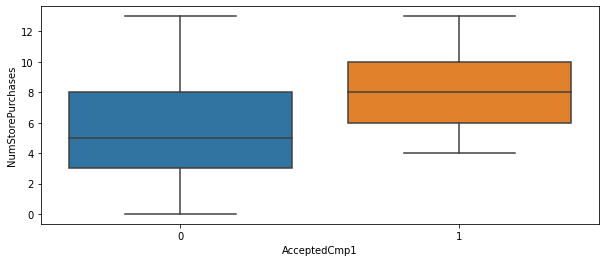

Boxplot AcceptedCmp1 Vs NumWebVisitsMonth


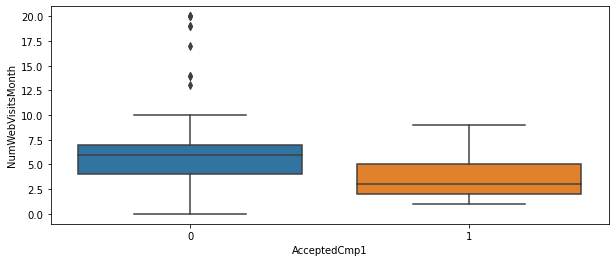

Boxplot AcceptedCmp1 Vs Age_in_years


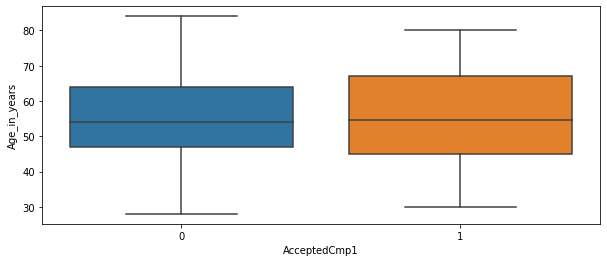

Boxplot AcceptedCmp1 Vs Loyalty_in_years


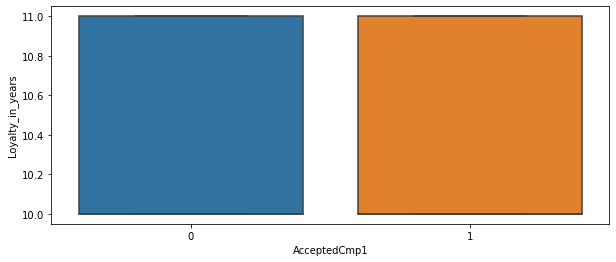

Boxplot AcceptedCmp2 Vs Income


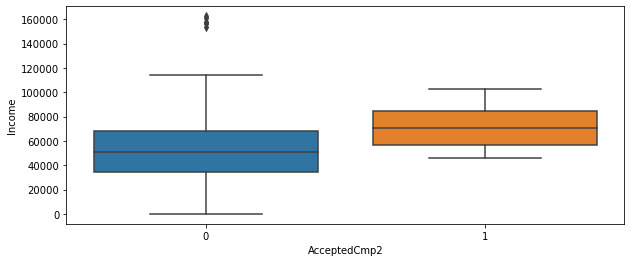

Boxplot AcceptedCmp2 Vs Kidhome


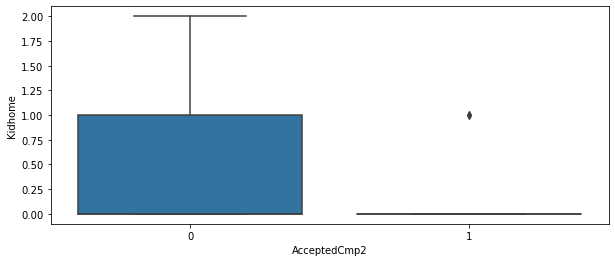

Boxplot AcceptedCmp2 Vs Teenhome


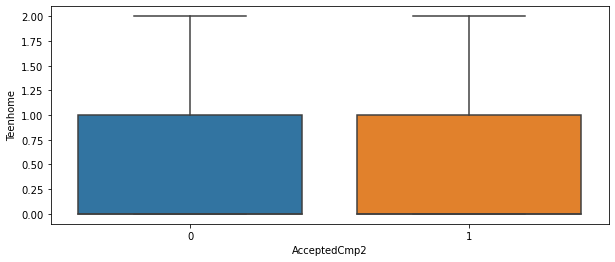

Boxplot AcceptedCmp2 Vs Recency


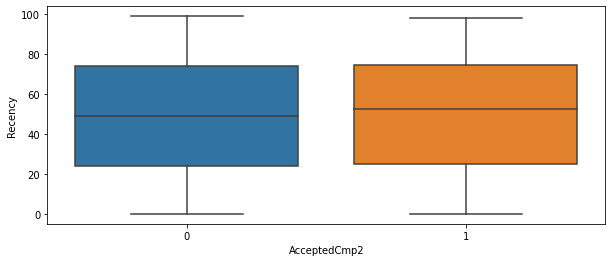

Boxplot AcceptedCmp2 Vs Amount_Wines


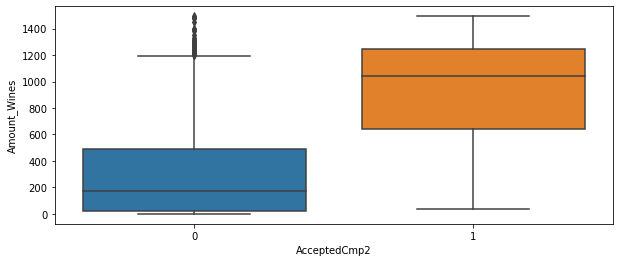

Boxplot AcceptedCmp2 Vs Amount_Fruits


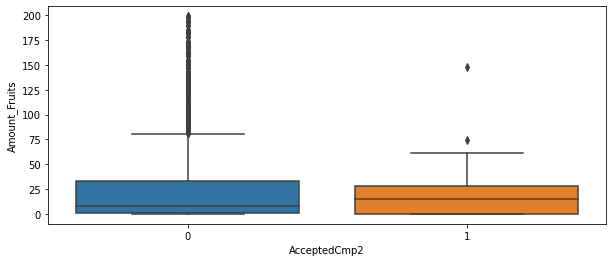

Boxplot AcceptedCmp2 Vs Amount_Meat


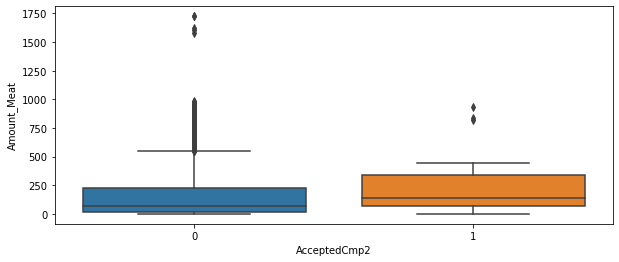

Boxplot AcceptedCmp2 Vs Amount_Fish


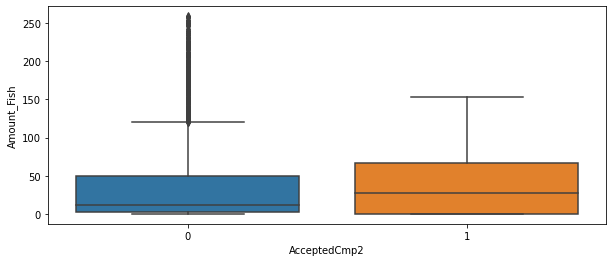

Boxplot AcceptedCmp2 Vs Amount_Sweets


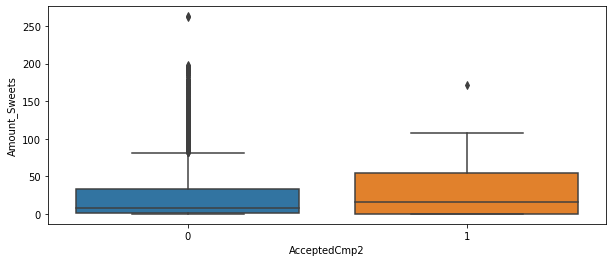

Boxplot AcceptedCmp2 Vs Amount_Snacks


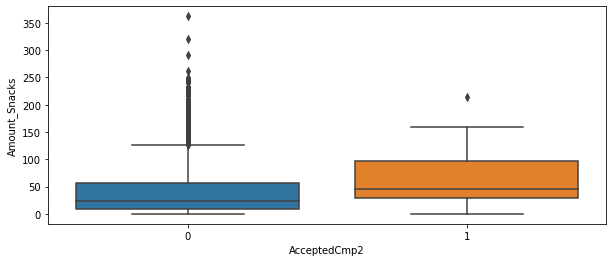

Boxplot AcceptedCmp2 Vs NumDealsPurchases


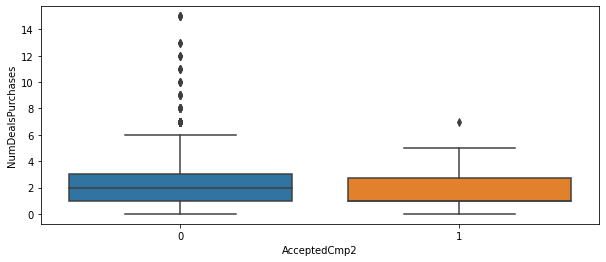

Boxplot AcceptedCmp2 Vs NumWebPurchases


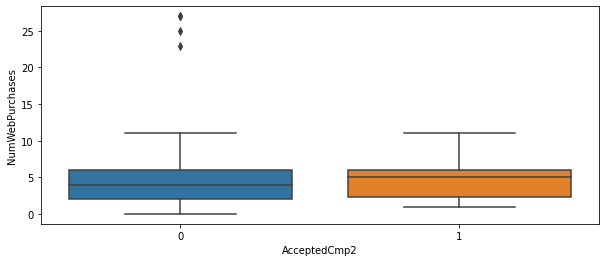

Boxplot AcceptedCmp2 Vs NumCatalogPurchases


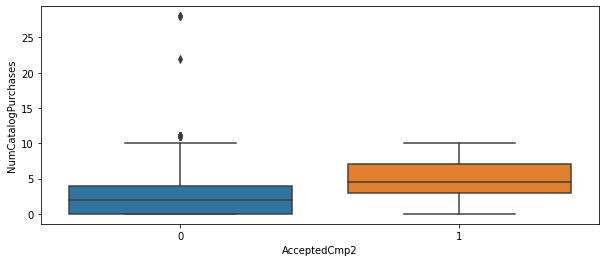

Boxplot AcceptedCmp2 Vs NumStorePurchases


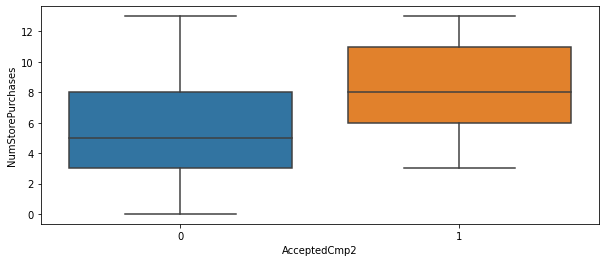

Boxplot AcceptedCmp2 Vs NumWebVisitsMonth


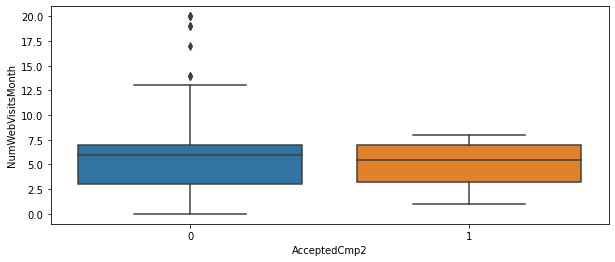

Boxplot AcceptedCmp2 Vs Age_in_years


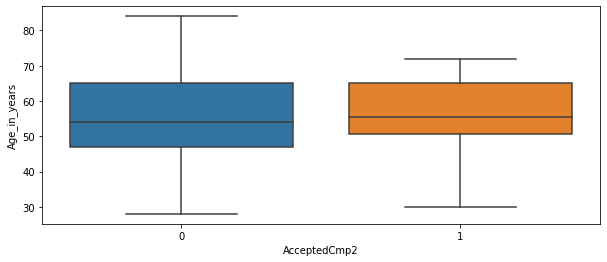

Boxplot AcceptedCmp2 Vs Loyalty_in_years


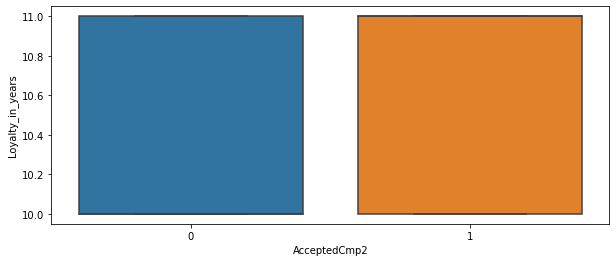

In [58]:
for i in cat_binary_vars:
    for j in num_vars:
        plt.figure(figsize=(10,4))
        print("Boxplot",i ,"Vs",j)
        sns.boxplot(x=i,y=j,data=cust_pur)
        plt.show()

#### Numerical vs Numerical

<Figure size 2880x1440 with 0 Axes>

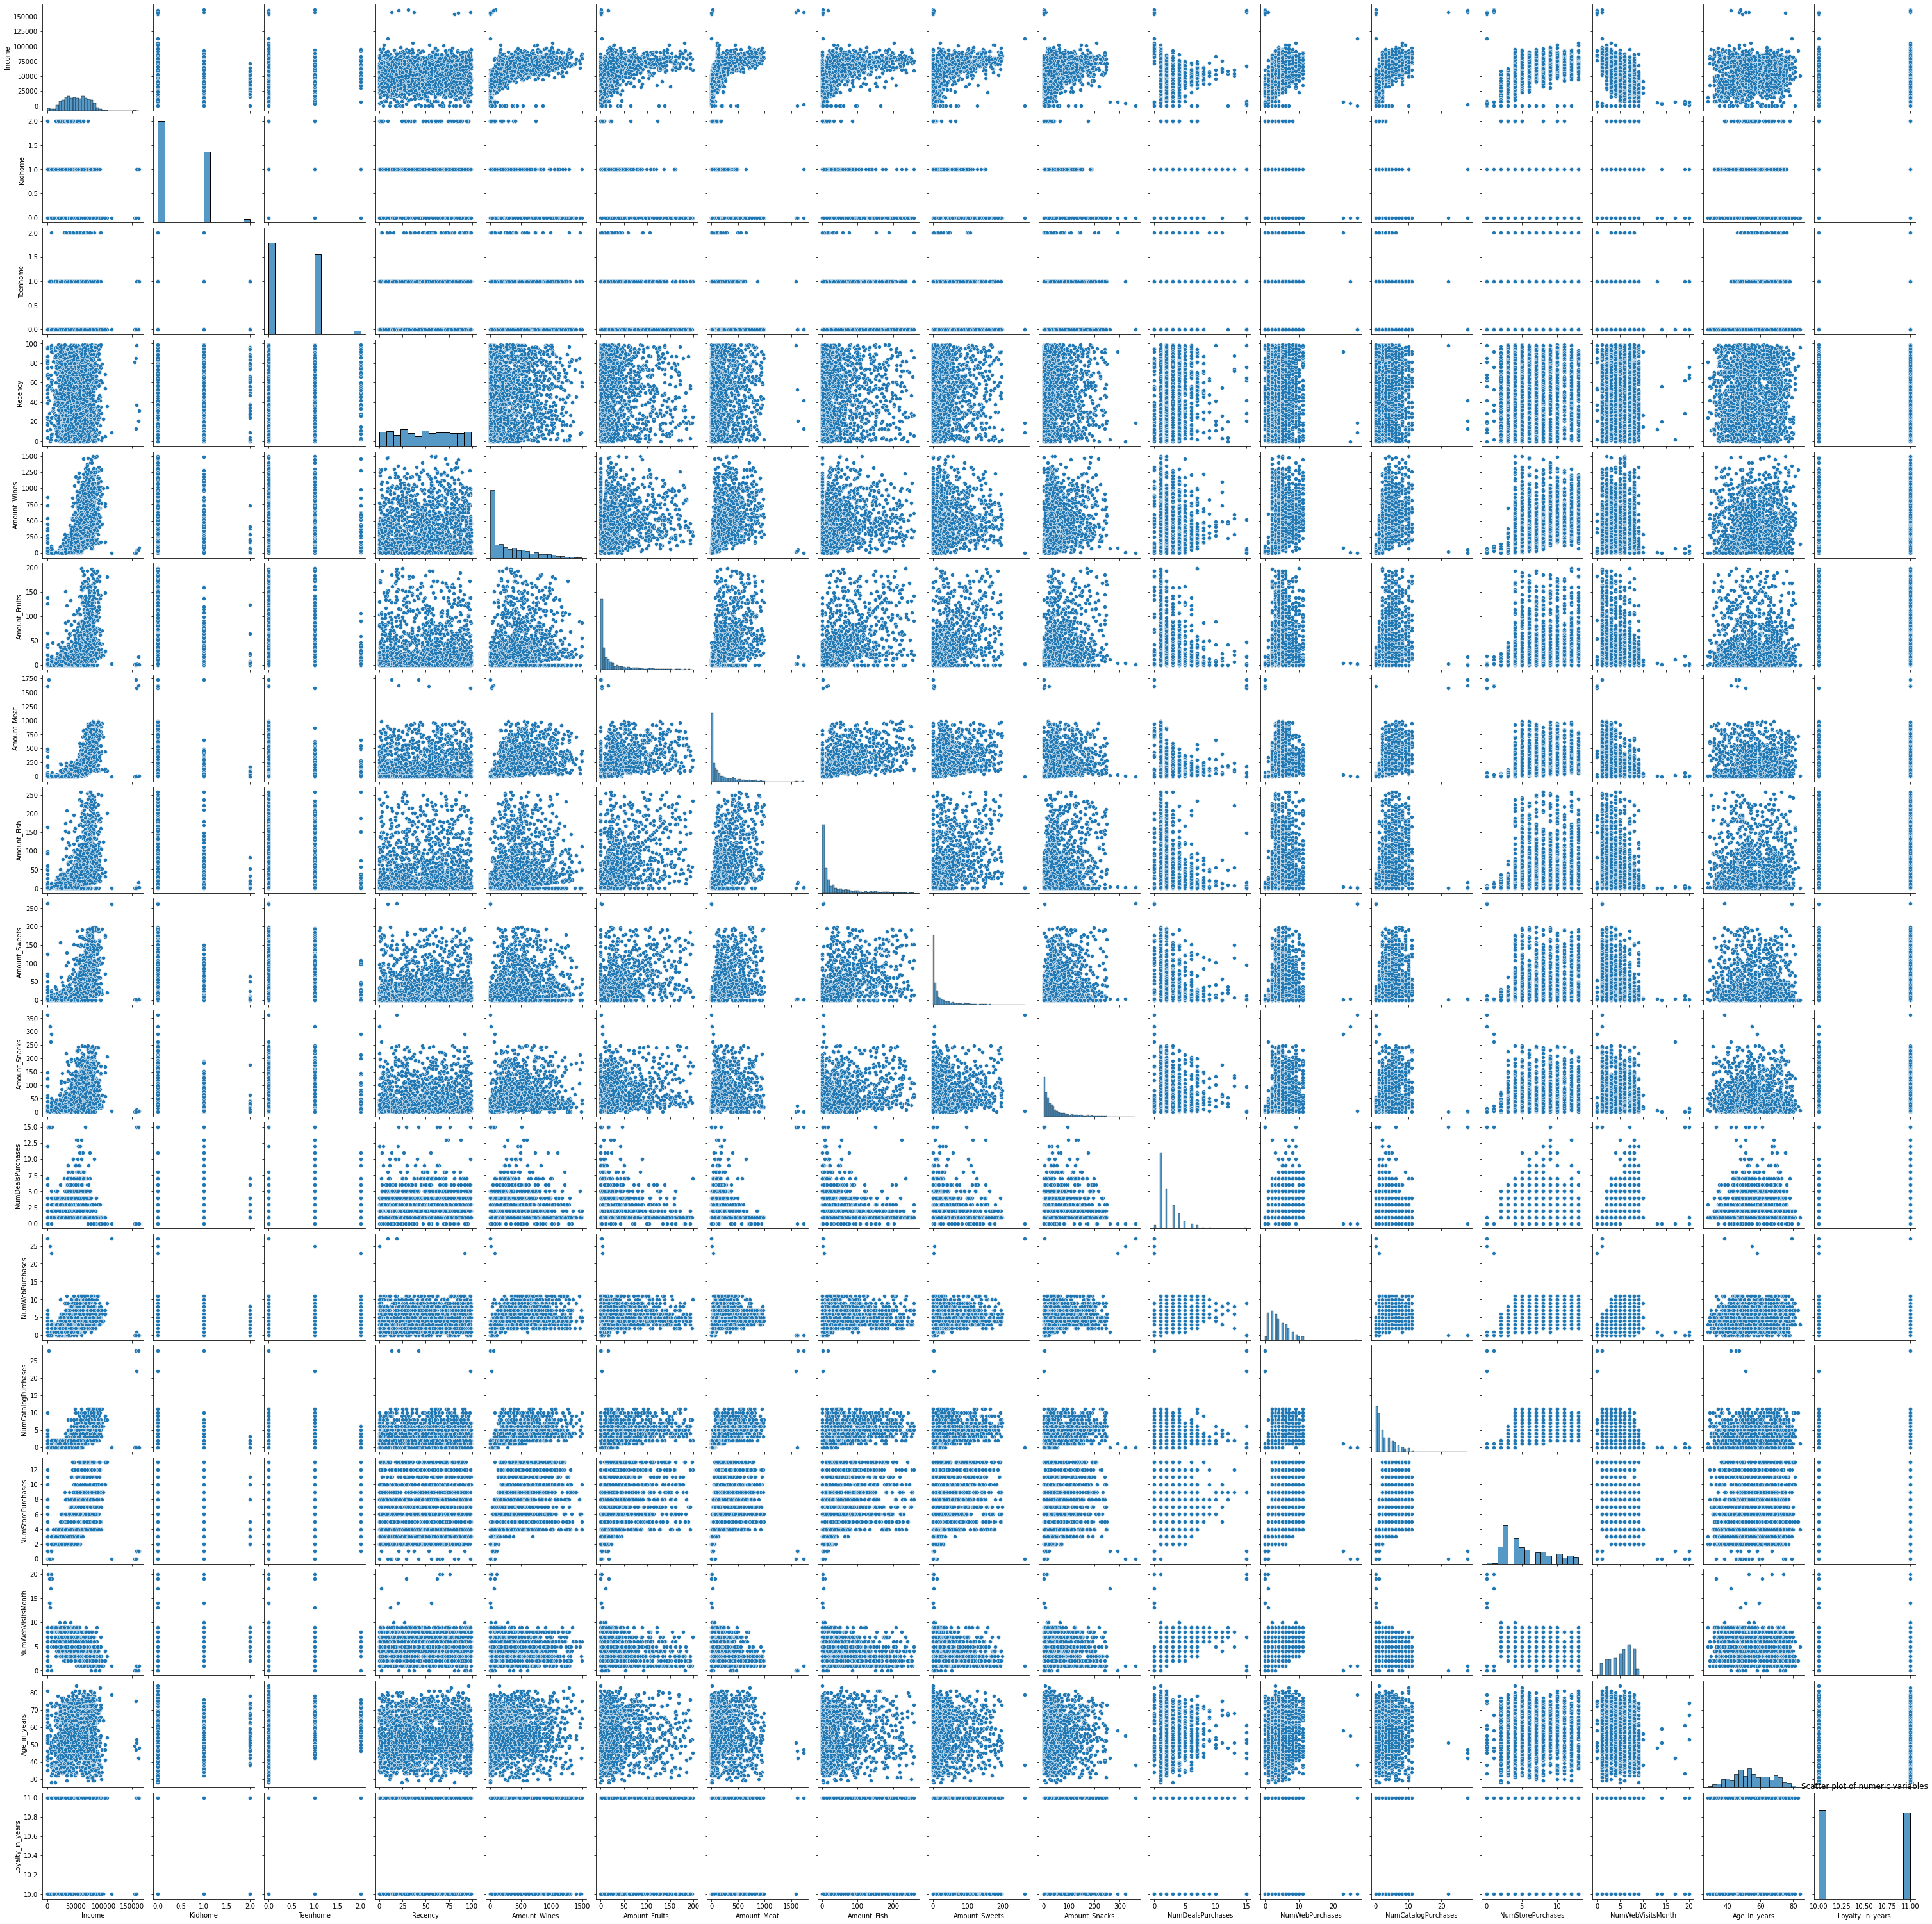

In [59]:
plt.figure(figsize=(40,20))
sns.pairplot(data= cust_pur,vars=num_vars)
plt.title("Scatter plot of numeric variables")
plt.show()

#### Categorical with respect to Response

In [60]:
# Let us see the response to campaigns wrt categorical variables

In [61]:
# let us see if there is any insight wrt Education and Marital Status and response to campaigns
Education_Marital_Status_Campaign=pd.pivot_table(data=cust_pur,index="Education",columns="Marital_Status",values="Response")

In [62]:
# Let us view the summary of the pivot table
Education_Marital_Status_Campaign

Marital_Status  Divorced   Married    Others    Single  Together
Education                                                       
Basic           0.000000  0.000000  0.000000  0.000000  0.142857
Cycle           0.227273  0.098765  0.000000  0.166667  0.070175
Graduation      0.159664  0.101617  0.189189  0.210317  0.108772
Master          0.162162  0.108696  0.428571  0.240000  0.113208
PhD             0.346154  0.166667  0.333333  0.306122  0.103448

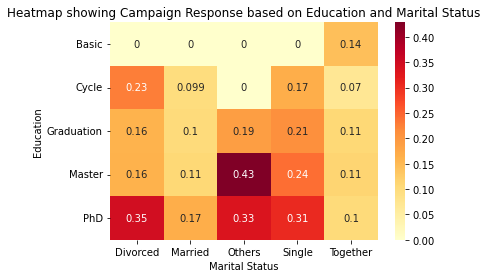

In [63]:
# Plotting the heatmap for the same
# Customers with Education level Masters and Marital Status -Others respond well to campaigns
sns.heatmap(Education_Marital_Status_Campaign,annot=True,cmap="YlOrRd")
plt.title("Heatmap showing Campaign Response based on Education and Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Education")
plt.show()

#### Categorical with respect to Complaint

In [64]:
# let us see if there is any insight wrt Education and Marital Status and complaints
Education_Marital_Status_Complaint=pd.pivot_table(data=cust_pur,index="Education",columns="Marital_Status",values="Complaint")

In [65]:
# There is no high correlation between the same.
Education_Marital_Status_Complaint

Marital_Status  Divorced   Married  Others    Single  Together
Education                                                     
Basic           0.000000  0.000000     0.0  0.000000  0.000000
Cycle           0.000000  0.012346     0.0  0.027778  0.017544
Graduation      0.008403  0.013857     0.0  0.011905  0.014035
Master          0.000000  0.007246     0.0  0.013333  0.000000
PhD             0.000000  0.000000     0.0  0.010204  0.000000

#### Correlation between numeric variables

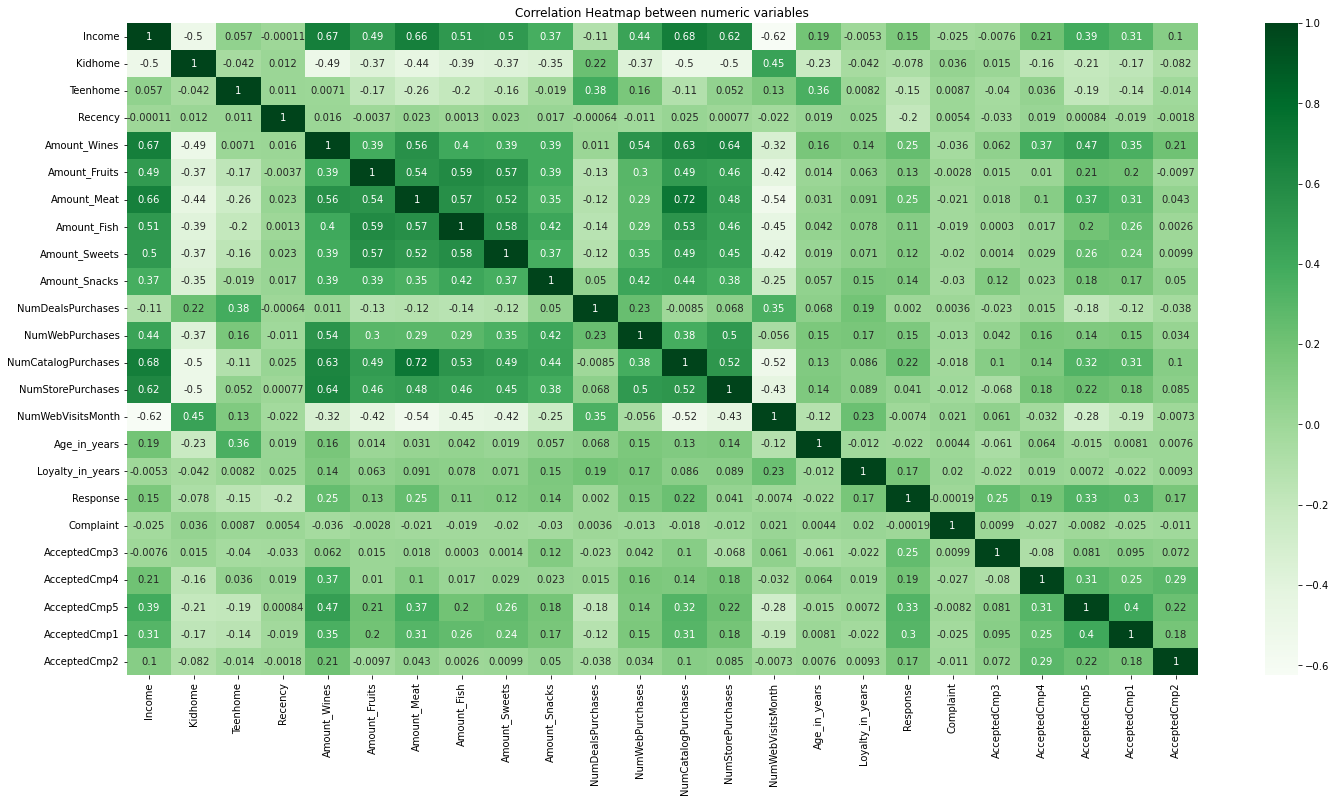

In [66]:
# Let us plot a heatmap to see the correlation between numeric variables
plt.figure(figsize=(24, 12))
plt.title("Correlation Heatmap between numeric variables")
sns.heatmap(data=cust_pur[(num_vars+cat_binary_vars)].corr(), annot=True, cmap="Greens")
plt.show()

### EDA Insights

### Customer Behaviour:

    1.The Median Income of all customers except those with Basic Education is around 50000
    2.Customers with higher income have less number of Web Visits.
    3.Customers in the income range of 50000 to 100000 spend on the various product offerings.
    4.Customers with basic Education have atleast 1 Deal Purchase and have atleast 3 web visits.
    5.PhD customers spend more on Wines and prefer Store Purchases.
    6.Customers who spend more on Fruits also spend more on Fish and Sweets
    7.Customers with kids at home make more web visits.
    8.Customers with more income, having atleast 1 store purchase, spend more on Wine and Meat and respond to campaigns.
    9.Customers with Education level Masters and Marital Status -Others respond well to campaigns
    10.Complaints are less from high income customers.
    11.The number of days since last Purchase for 50% of customers is 50 days or less.
    12.Customers who spend more on Wines make store purchases or catalog purchases.
    13.Customers who spend on meat have more number of catalog purchases.
    

## 2. Customer Segmentation

### iv. Data Preparation

In [67]:
# Let us check the variables for which we have to create dummies.
cust_pur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          2236 non-null   int64  
 1   Education            2236 non-null   object 
 2   Marital_Status       2236 non-null   object 
 3   Income               2236 non-null   float64
 4   Kidhome              2236 non-null   int64  
 5   Teenhome             2236 non-null   int64  
 6   Recency              2236 non-null   int64  
 7   Amount_Wines         2236 non-null   int64  
 8   Amount_Fruits        2236 non-null   int64  
 9   Amount_Meat          2236 non-null   int64  
 10  Amount_Fish          2236 non-null   int64  
 11  Amount_Sweets        2236 non-null   int64  
 12  Amount_Snacks        2236 non-null   int64  
 13  NumDealsPurchases    2236 non-null   int64  
 14  NumWebPurchases      2236 non-null   int64  
 15  NumCatalogPurchases  2236 non-null   i

#### Dummy Variable

In [68]:
# We need to create dummy variable for Marital Status and Education
dummy1=pd.get_dummies(cust_pur[["Education","Marital_Status"]],drop_first=True)

In [69]:
# create copy of dataframe for building the model
cust_pur_model_build=cust_pur.copy()
cust_pur_model_build.head()


Customer_ID Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0          387     Basic        Married   7500.0        0         0       59   
1         8373     Basic       Together  24594.0        1         0       94   
2         5342     Basic       Divorced   9548.0        1         0       31   
3         2563     Basic        Married  28249.0        0         0       80   
4         9733     Basic       Together  24882.0        1         0       52   

   Amount_Wines  Amount_Fruits  Amount_Meat  Amount_Fish  Amount_Sweets  \
0             6             16           11           11              1   
1             1              3            6           10              0   
2             0              1            3           10              6   
3             1              9            7            2             14   
4             1              4           10           29              0   

   Amount_Snacks  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0             16                  1                2                    0   
1              9                  1                1                    0   
2              9                  2                1                    0   
3             10                  1                2                    0   
4             36                  1                1                    1   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  3                  8             0             0   
1                  3                  5             0             0   
2                  3                  8             0             0   
3                  3                  6             0             0   
4                  2                  6             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complaint  Response  \
0             0             0             0          0       0.0   
1             0             0             0          0       0.0   
2             0             0             0          0       0.0   
3             0             0             0          0       0.0   
4             0             0             0          0       0.0   

   Age_in_years  Loyalty_in_years  
0            48              11.0  
1            45              10.0  
2            48              11.0  
3            63              10.0  
4            46              11.0

In [70]:
# Merging the dummy variables with the dataframe created for building the model.
cust_pur_model_build=pd.concat([cust_pur_model_build,dummy1],axis=1)
cust_pur_model_build.shape

(2236, 35)

In [71]:
# Let us check few records of the dataframe created for building the model
cust_pur_model_build.head()

Customer_ID Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0          387     Basic        Married   7500.0        0         0       59   
1         8373     Basic       Together  24594.0        1         0       94   
2         5342     Basic       Divorced   9548.0        1         0       31   
3         2563     Basic        Married  28249.0        0         0       80   
4         9733     Basic       Together  24882.0        1         0       52   

   Amount_Wines  Amount_Fruits  Amount_Meat  Amount_Fish  Amount_Sweets  \
0             6             16           11           11              1   
1             1              3            6           10              0   
2             0              1            3           10              6   
3             1              9            7            2             14   
4             1              4           10           29              0   

   Amount_Snacks  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0             16                  1                2                    0   
1              9                  1                1                    0   
2              9                  2                1                    0   
3             10                  1                2                    0   
4             36                  1                1                    1   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  3                  8             0             0   
1                  3                  5             0             0   
2                  3                  8             0             0   
3                  3                  6             0             0   
4                  2                  6             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complaint  Response  \
0             0             0             0          0       0.0   
1             0             0             0          0       0.0   
2             0             0             0          0       0.0   
3             0             0             0          0       0.0   
4             0             0             0          0       0.0   

   Age_in_years  Loyalty_in_years  Education_Cycle  Education_Graduation  \
0            48              11.0                0                     0   
1            45              10.0                0                     0   
2            48              11.0                0                     0   
3            63              10.0                0                     0   
4            46              11.0                0                     0   

   Education_Master  Education_PhD  Marital_Status_Married  \
0                 0              0                       1   
1                 0              0                       0   
2                 0              0                       0   
3                 0              0                       1   
4                 0              0                       0   

   Marital_Status_Others  Marital_Status_Single  Marital_Status_Together  
0                      0                      0                        0  
1                      0                      0                        1  
2                      0                      0                        0  
3                      0                      0                        0  
4                      0                      0                        1

In [72]:
# deleting the columns not required for the model
cust_pur_model_build.drop(["Customer_ID","Education","Marital_Status"],axis=1,inplace=True)
cust_pur_model_build.head()

Income  Kidhome  Teenhome  Recency  Amount_Wines  Amount_Fruits  \
0   7500.0        0         0       59             6             16   
1  24594.0        1         0       94             1              3   
2   9548.0        1         0       31             0              1   
3  28249.0        0         0       80             1              9   
4  24882.0        1         0       52             1              4   

   Amount_Meat  Amount_Fish  Amount_Sweets  Amount_Snacks  NumDealsPurchases  \
0           11           11              1             16                  1   
1            6           10              0              9                  1   
2            3           10              6              9                  2   
3            7            2             14             10                  1   
4           10           29              0             36                  1   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                2                    0                  3                  8   
1                1                    0                  3                  5   
2                1                    0                  3                  8   
3                2                    0                  3                  6   
4                1                    1                  2                  6   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   Complaint  Response  Age_in_years  Loyalty_in_years  Education_Cycle  \
0          0       0.0            48              11.0                0   
1          0       0.0            45              10.0                0   
2          0       0.0            48              11.0                0   
3          0       0.0            63              10.0                0   
4          0       0.0            46              11.0                0   

   Education_Graduation  Education_Master  Education_PhD  \
0                     0                 0              0   
1                     0                 0              0   
2                     0                 0              0   
3                     0                 0              0   
4                     0                 0              0   

   Marital_Status_Married  Marital_Status_Others  Marital_Status_Single  \
0                       1                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       1                      0                      0   
4                       0                      0                      0   

   Marital_Status_Together  
0                        0  
1                        1  
2                        0  
3                        0  
4                        1

In [73]:
# Let us check the data balance wrt to the variable "Response"
cust_pur_model_build.Response.value_counts(normalize=True)


0.0    0.849284
1.0    0.150716
Name: Response, dtype: float64

In [74]:
# Since we are only doing customer segementation here, data imbalance has not been addressed.

#### Scaling the data

In [75]:
# importing the required Scaler
from sklearn.preprocessing import StandardScaler

In [76]:
# Instantiate for scaling
scaler=StandardScaler()
cust_pur_model_build_scaled=scaler.fit_transform(cust_pur_model_build)
cust_pur_model_build_scaled.shape

(2236, 32)

In [77]:
# Put the scaled data in a DataFrame
cust_pur_model_build_scaled=pd.DataFrame(cust_pur_model_build_scaled)
cust_pur_model_build_scaled.head()

0         1         2         3         4         5         6   \
0 -1.989538 -0.825455 -0.920436  0.341397 -0.885922 -0.258741 -0.691296   
1 -1.214861  1.035147 -0.920436  1.550344 -0.900780 -0.586072 -0.713455   
2 -1.896725  1.035147 -0.920436 -0.625761 -0.903752 -0.636431 -0.726751   
3 -1.049222 -0.825455 -0.920436  1.066765 -0.900780 -0.434996 -0.709023   
4 -1.201810  1.035147 -0.920436  0.099608 -0.900780 -0.560893 -0.695728   

         7         8         9         10        11        12        13  \
0 -0.485688 -0.631638 -0.537619 -0.686137 -0.751127 -0.911056 -0.860083   
1 -0.503991 -0.655857 -0.672105 -0.686137 -1.110921 -0.911056 -0.860083   
2 -0.503991 -0.510544 -0.672105 -0.168700 -1.110921 -0.911056 -0.860083   
3 -0.650414 -0.316794 -0.652892 -0.686137 -0.751127 -0.911056 -0.860083   
4 -0.156237 -0.655857 -0.153372 -0.686137 -1.110921 -0.568970 -1.167738   

         14        15        16        17        18        19        20  \
0  1.105008 -0.280410 -0.284104 -0.279482 -0.262362 -0.116616 -0.095001   
1 -0.131421 -0.280410 -0.284104 -0.279482 -0.262362 -0.116616 -0.095001   
2  1.105008 -0.280410 -0.284104 -0.279482 -0.262362 -0.116616 -0.095001   
3  0.280722 -0.280410 -0.284104 -0.279482 -0.262362 -0.116616 -0.095001   
4  0.280722  3.566201 -0.284104 -0.279482 -0.262362 -0.116616 -0.095001   

         21        22        23        24        25        26        27  \
0 -0.421262 -0.606971  1.013508 -0.314279 -1.007181 -0.445292 -0.526293   
1 -0.421262 -0.863367 -0.986672 -0.314279 -1.007181 -0.445292 -0.526293   
2 -0.421262 -0.606971  1.013508 -0.314279 -1.007181 -0.445292 -0.526293   
3 -0.421262  0.675007 -0.986672 -0.314279 -1.007181 -0.445292 -0.526293   
4 -0.421262 -0.777902  1.013508 -0.314279 -1.007181 -0.445292 -0.526293   

         28        29        30        31  
0  1.260144 -0.197569 -0.522134 -0.590434  
1 -0.793560 -0.197569 -0.522134  1.693668  
2 -0.793560 -0.197569 -0.522134 -0.590434  
3  1.260144 -0.197569 -0.522134 -0.590434  
4 -0.793560 -0.197569 -0.522134  1.693668

In [78]:
# Before we proceed with the clustering, let us see if the data is suitable for clustering using Hopkins statistics

In [79]:
# Creating user defined function to calculate hopkins statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [80]:
# Let us check the hopkins statistics for the dataframe on which clustering is to be done
hopkins(cust_pur_model_build_scaled)

0.8419986750595276

#### The hopkins statistics for this data set shows that the data has a tendency to cluster. 
#### Hence we will proceed with clustering

#### Optimal number of clusters and Silhouette Score :

In [81]:
# The dataframe has 32 columns. 
# Before handling dimensionality, let us see the optimal clusters and silhouette score on the dataframe as is.

In [82]:
# importing the required metrics and methods
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

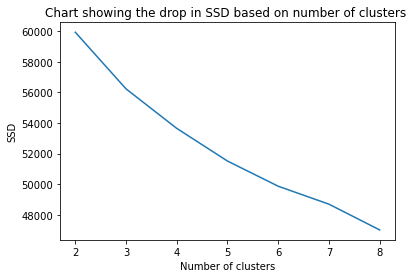

In [83]:
# Finding the optimal number of clusters
# Create a list to add the inertia- sum of squared distance

ssd=[]
range_n_cluster=[2,3,4,5,6,7,8]
for num_cluster in range_n_cluster:
        kmeans=KMeans(n_clusters=num_cluster,max_iter=100)
        kmeans.fit(cust_pur_model_build_scaled)
        
        ssd.append(kmeans.inertia_)
plt.plot(ssd)
plt.xticks(ticks=(0,1,2,3,4,5,6),labels=range_n_cluster)
plt.title("Chart showing the drop in SSD based on number of clusters ")
plt.xlabel("Number of clusters")
plt.ylabel("SSD")
plt.show()

In [84]:
# The elbow curve is not showing clearly the optimal number of clusters. Let us check the silhouette score

In [85]:
# Silhouette Analysis to check the optimal number of clusters

range_n_cluster=[2,3,4,5,6,7,8]
for num_cluster in range_n_cluster:
        kmeans=KMeans(n_clusters=num_cluster,max_iter=100)
        kmeans.fit(cust_pur_model_build_scaled)
        
        cluster_labels=kmeans.labels_
        
        # Check for silhouette score
        silhouette_avg=silhouette_score(cust_pur_model_build_scaled,cluster_labels)
        print("For n_cluster={0},the silhouette score is {1}".format(num_cluster,silhouette_avg))

For n_cluster=2,the silhouette score is 0.18862321013993033
For n_cluster=3,the silhouette score is 0.11944233668647279
For n_cluster=4,the silhouette score is 0.12135062056172516
For n_cluster=5,the silhouette score is 0.11891789702761676
For n_cluster=6,the silhouette score is 0.1224799378866448
For n_cluster=7,the silhouette score is 0.08004708998875765
For n_cluster=8,the silhouette score is 0.07055622374080876


#### The sihouette score is very low which shows we will have an overlapping cluster.
#### The elbow curve does not show optimal number of clusters either.
#### The dataframe has 32 dimensions.Hence let us handle dimensionality with PCA.

#### Handling dimensionality

In [86]:
# Since there are 32 variables in the data, the clustering run as is may not give the desired results. 
# Hence we will adopt the PCA before proceeding with clustering.
from sklearn.decomposition import PCA

In [87]:
# Let us select the number of PCA components as 2
pca = PCA(n_components=2)
pca.fit(cust_pur_model_build_scaled)


PCA(n_components=2)

In [88]:
eigenvalues = pca.explained_variance_
prop_var = eigenvalues / np.sum(eigenvalues)

In [89]:
eigenvalues

array([6.68412834, 2.19870487])

In [90]:
# It shows that PCA 1 explains 0.75 of the variance and PCA 2 explains remaining 0.25 variance
prop_var

array([0.75247707, 0.24752293])

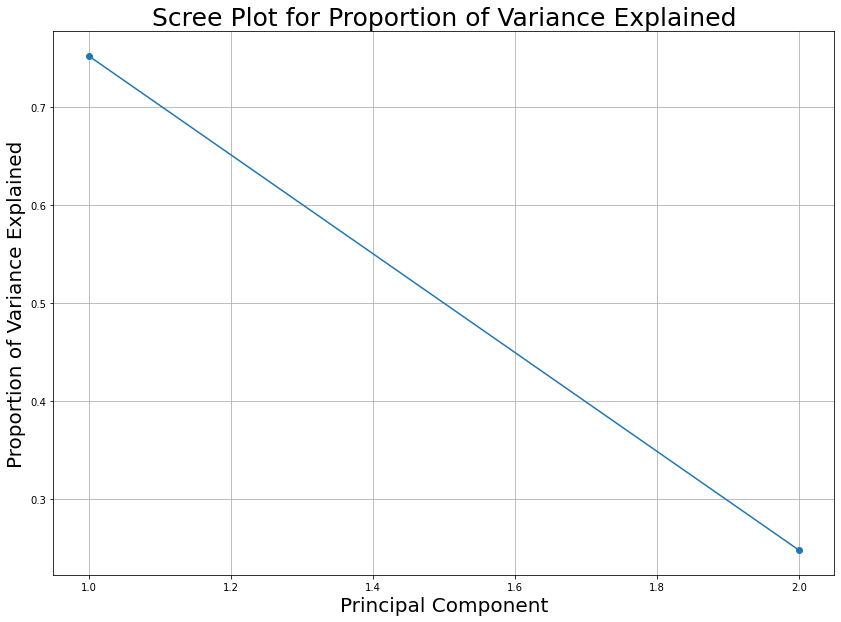

In [91]:
plt.figure(figsize=(14,10))
plt.plot(np.arange(1, len(prop_var)+1), 
                   prop_var, marker='o')
plt.xlabel('Principal Component',
           size = 20)
plt.ylabel('Proportion of Variance Explained',
           size = 20)
plt.title('Scree Plot for Proportion of Variance Explained',
          size = 25)
plt.grid(True)

In [92]:
# Let us convert the pca components into a dataframe
cust_pur_model_build_scaled_pca = pd.DataFrame(pca.transform(cust_pur_model_build_scaled), columns=(["principal component 1",
                                    "principal component 2"]))
cust_pur_model_build_scaled_pca.describe()

principal component 1  principal component 2
count           2.236000e+03           2.236000e+03
mean            7.363420e-17           2.081420e-16
std             2.585368e+00           1.482803e+00
min            -5.225866e+00          -3.551888e+00
25%            -2.336817e+00          -1.157699e+00
50%            -6.654854e-01          -1.764215e-01
75%             2.060910e+00           9.830498e-01
max             7.690132e+00           5.055727e+00

#### Optimal clusters using PCA

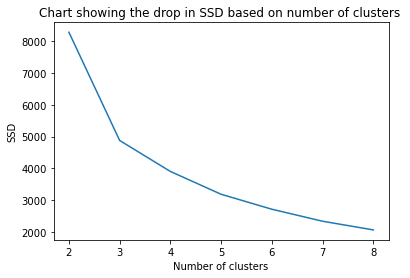

In [93]:
# Finding the optimal number of clusters
# Create a list to add the inertia- sum of squared distance

ssd=[]
range_n_cluster=[2,3,4,5,6,7,8]
for num_cluster in range_n_cluster:
        kmeans=KMeans(n_clusters=num_cluster,max_iter=100)
        kmeans.fit(cust_pur_model_build_scaled_pca)
        
        ssd.append(kmeans.inertia_)
plt.plot(ssd)
plt.xticks(ticks=(0,1,2,3,4,5,6),labels=range_n_cluster)
plt.title("Chart showing the drop in SSD based on number of clusters ")
plt.xlabel("Number of clusters")
plt.ylabel("SSD")
plt.show()

#### The above elbow curve shows that the optimal number of clusters is 3.

In [94]:
# Silhouette Analysis to check the optimal number of clusters

range_n_cluster=[2,3,4,5,6,7,8]
for num_cluster in range_n_cluster:
        kmeans=KMeans(n_clusters=num_cluster,max_iter=100)
        kmeans.fit(cust_pur_model_build_scaled_pca)
        
        cluster_labels=kmeans.labels_
        
        # Check for silhouette score
        silhouette_avg=silhouette_score(cust_pur_model_build_scaled_pca,cluster_labels)
        print("For n_cluster={0},the silhouette score is {1}".format(num_cluster,silhouette_avg))

For n_cluster=2,the silhouette score is 0.5212743910017346
For n_cluster=3,the silhouette score is 0.4886141770844089
For n_cluster=4,the silhouette score is 0.4154381372277749
For n_cluster=5,the silhouette score is 0.3802830964342947
For n_cluster=6,the silhouette score is 0.3830765052684548
For n_cluster=7,the silhouette score is 0.379923933692044
For n_cluster=8,the silhouette score is 0.36191176436574457


#### The silhouette score for 3 clusters is 0.49 which is decent. Let us do the K Means clustering  with 3 clusters

#### K Means Clustering

In [95]:
# Both elbow curve and silhouette score indicate that the optimal number of clusters is 3
kmeans=KMeans(n_clusters=3,max_iter=50,random_state=42)
kmeans.fit(cust_pur_model_build_scaled_pca)

KMeans(max_iter=50, n_clusters=3, random_state=42)

In [96]:
# Cluster ID's
kmeans.labels_

array([2, 2, 2, ..., 1, 2, 1], dtype=int32)

In [97]:
# incorporating the cluster id into the dataframe
cust_pur["CLUSTER_ID"]=kmeans.labels_
cust_pur.head()

Customer_ID Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0          387     Basic        Married   7500.0        0         0       59   
1         8373     Basic       Together  24594.0        1         0       94   
2         5342     Basic       Divorced   9548.0        1         0       31   
3         2563     Basic        Married  28249.0        0         0       80   
4         9733     Basic       Together  24882.0        1         0       52   

   Amount_Wines  Amount_Fruits  Amount_Meat  Amount_Fish  Amount_Sweets  \
0             6             16           11           11              1   
1             1              3            6           10              0   
2             0              1            3           10              6   
3             1              9            7            2             14   
4             1              4           10           29              0   

   Amount_Snacks  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0             16                  1                2                    0   
1              9                  1                1                    0   
2              9                  2                1                    0   
3             10                  1                2                    0   
4             36                  1                1                    1   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  3                  8             0             0   
1                  3                  5             0             0   
2                  3                  8             0             0   
3                  3                  6             0             0   
4                  2                  6             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complaint  Response  \
0             0             0             0          0       0.0   
1             0             0             0          0       0.0   
2             0             0             0          0       0.0   
3             0             0             0          0       0.0   
4             0             0             0          0       0.0   

   Age_in_years  Loyalty_in_years  CLUSTER_ID  
0            48              11.0           2  
1            45              10.0           2  
2            48              11.0           2  
3            63              10.0           2  
4            46              11.0           2

In [98]:
# Let us check the count of customers in each cluster.
cust_pur.CLUSTER_ID.value_counts(normalize=True)*100

2    46.377460
0    27.817531
1    25.805009
Name: CLUSTER_ID, dtype: float64

## 2. Customer Segmentation

### v.Insights from customer segmentation


Boxplot Income Vs Cluster ID


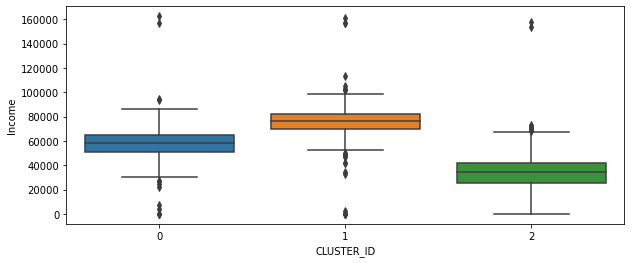

Boxplot Kidhome Vs Cluster ID


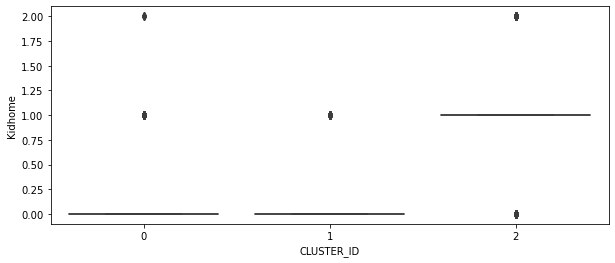

Boxplot Teenhome Vs Cluster ID


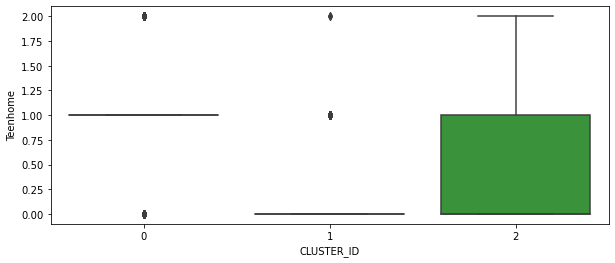

Boxplot Recency Vs Cluster ID


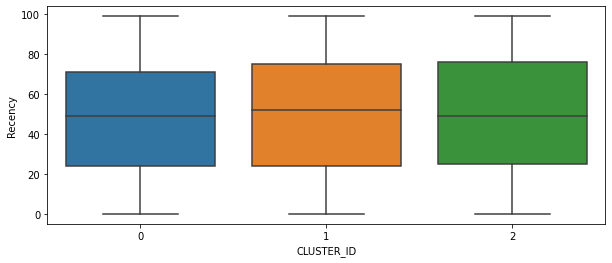

Boxplot Amount_Wines Vs Cluster ID


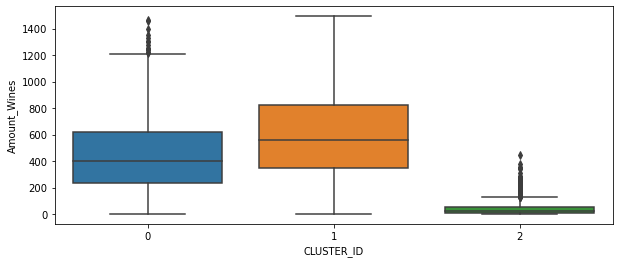

Boxplot Amount_Fruits Vs Cluster ID


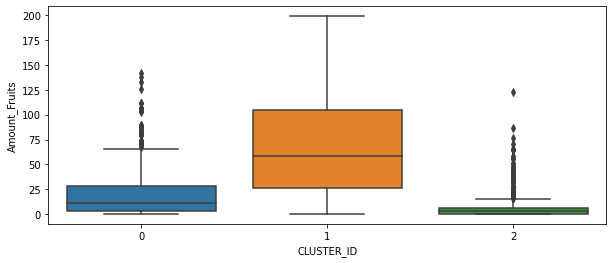

Boxplot Amount_Meat Vs Cluster ID


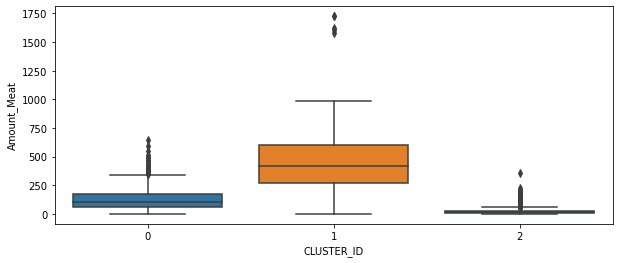

Boxplot Amount_Fish Vs Cluster ID


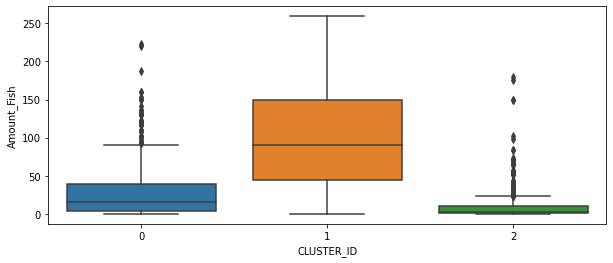

Boxplot Amount_Sweets Vs Cluster ID


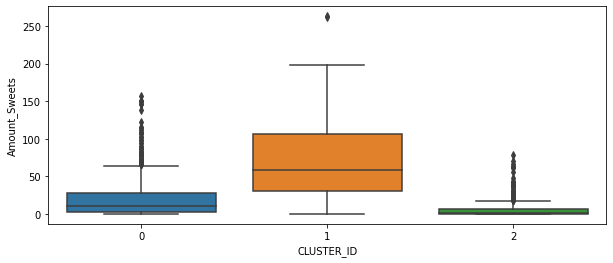

Boxplot Amount_Snacks Vs Cluster ID


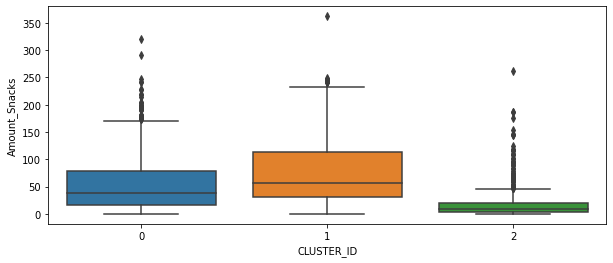

Boxplot NumDealsPurchases Vs Cluster ID


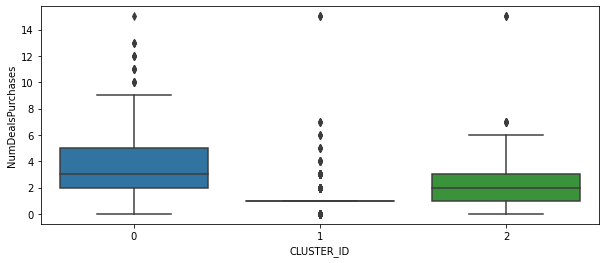

Boxplot NumWebPurchases Vs Cluster ID


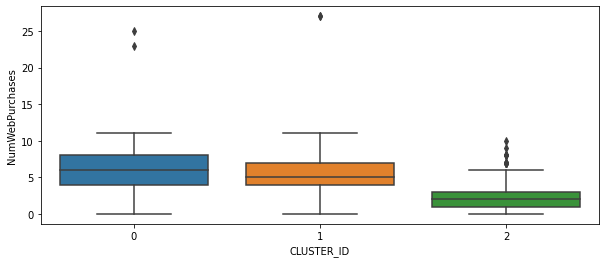

Boxplot NumCatalogPurchases Vs Cluster ID


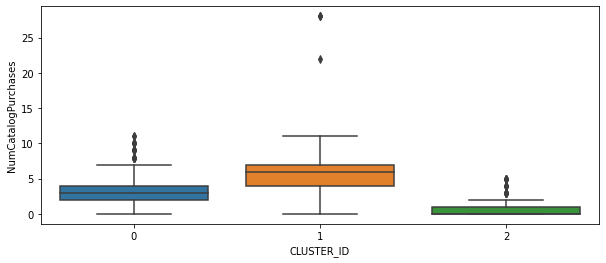

Boxplot NumStorePurchases Vs Cluster ID


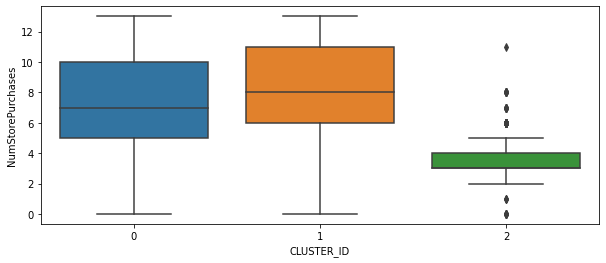

Boxplot NumWebVisitsMonth Vs Cluster ID


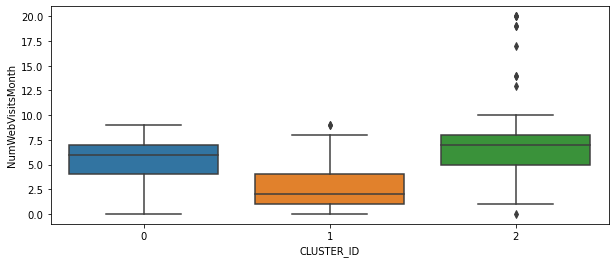

Boxplot Age_in_years Vs Cluster ID


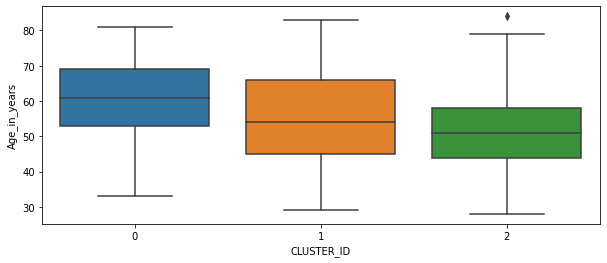

Boxplot Loyalty_in_years Vs Cluster ID


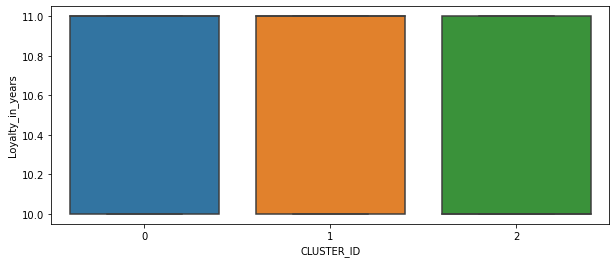

In [99]:
# Let us visualise the customer segments with the help of boxplots.
# Clusters wrt numeric variables
for i in num_vars:
    plt.figure(figsize=(10,4))
    print("Boxplot",i ,"Vs Cluster ID")
    sns.boxplot(x="CLUSTER_ID",y=i,data=cust_pur)
    plt.show()

Boxplot Response Vs Cluster ID


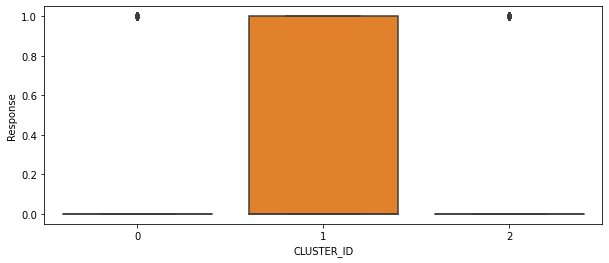

Boxplot Complaint Vs Cluster ID


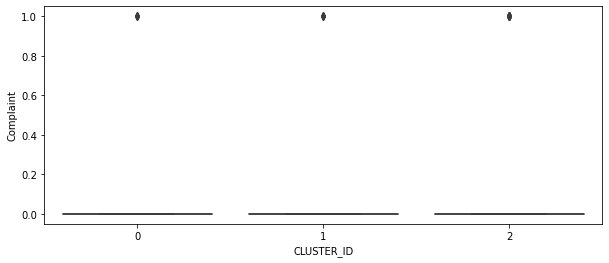

Boxplot AcceptedCmp3 Vs Cluster ID


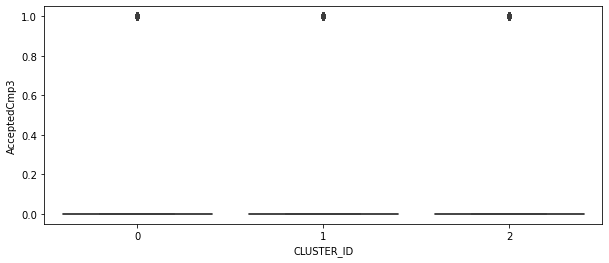

Boxplot AcceptedCmp4 Vs Cluster ID


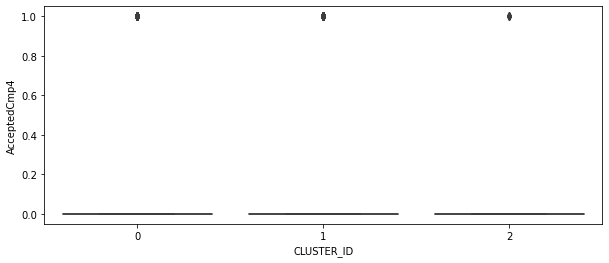

Boxplot AcceptedCmp5 Vs Cluster ID


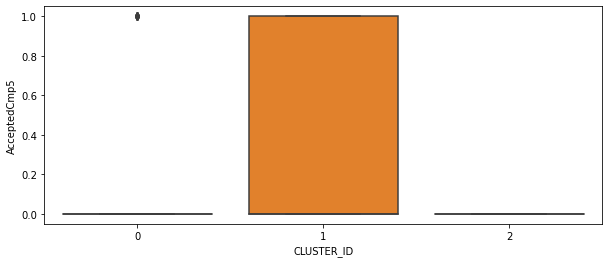

Boxplot AcceptedCmp1 Vs Cluster ID


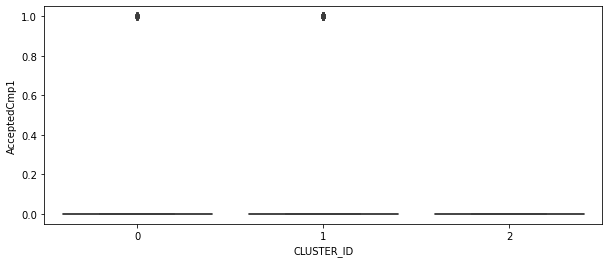

Boxplot AcceptedCmp2 Vs Cluster ID


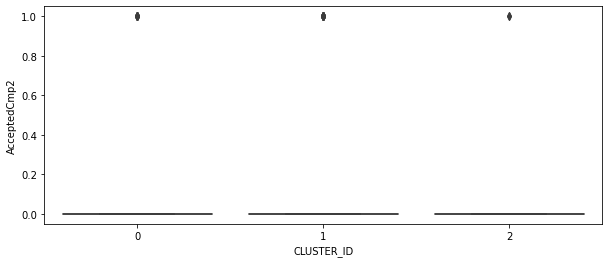

In [100]:
# Clusters wrt numeric variables
for i in cat_binary_vars:
    plt.figure(figsize=(10,4))
    print("Boxplot",i ,"Vs Cluster ID")
    sns.boxplot(x="CLUSTER_ID",y=i,data=cust_pur)
    plt.show()

In [101]:
# Let us create a pivot table using cluster ID and Education
Cluster_Education=pd.pivot_table(data=cust_pur,index="CLUSTER_ID",columns="Education",values="Customer_ID", aggfunc=np.size)

In [102]:
# pivot summary
Cluster_Education

Education   Basic  Cycle  Graduation  Master  PhD
CLUSTER_ID                                       
0               1     30         247     133  211
1               1     57         344      76   99
2              52    114         535     161  175

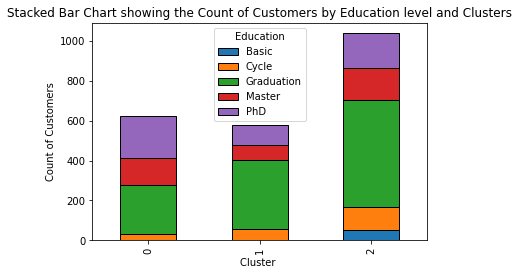

In [103]:
# Plotting a stacked bar chart for the above pivot
Cluster_Education.plot(kind="bar",stacked=True,edgecolor="black")
plt.title("Stacked Bar Chart showing the Count of Customers by Education level and Clusters")
plt.xlabel("Cluster ")
plt.ylabel("Count of Customers")
plt.show()

In [104]:
# Let us create a pivot table using cluster ID and Marital Status
Cluster_Marital_Status=pd.pivot_table(data=cust_pur,index="CLUSTER_ID",columns="Marital_Status",values="Customer_ID", aggfunc=np.size)

In [105]:
# pivot summary
Cluster_Marital_Status

Marital_Status  Divorced  Married  Others  Single  Together
CLUSTER_ID                                                 
0                     78      250      37      87       170
1                     56      211      25     141       144
2                     97      403      22     251       264

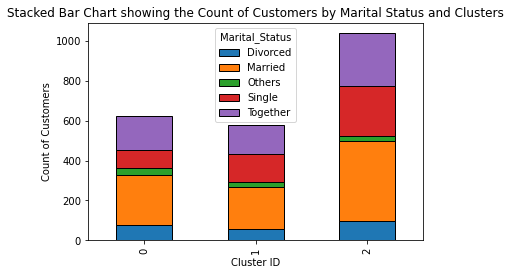

In [106]:
# Plotting a stacked bar chart for the above pivot
Cluster_Marital_Status.plot(kind="bar",stacked=True,edgecolor="black")
plt.title("Stacked Bar Chart showing the Count of Customers by Marital Status and Clusters")
plt.xlabel("Cluster ID")
plt.ylabel("Count of Customers")
plt.show()

###  The 3 clusters formed are :

Cluster 0 : Customers with moderate income with 1 teen with moderate spend on Wines,Meat,Fish,Fruits,Snacks and Sweets. These customers have more purchases when there are deals.They prefer Web and Store Purchases. The median age of these customers is 60

Cluster 1 : Customers with high income mostly with no kids and teens at home with high spend on Wines,Meat,Fish,Fruits,Snacks and Sweets. These customers do not look for deals during purchases.They prefer Web, Store and Catalog Purchases.The median age of these customers is 55. These customers respond well to campaigns.

Cluster 2 : Customers with low income with 1 kid with low spend on Wines,Meat,Fish,Fruits,Snacks and Sweets.These customers also opt for Deals on purchases and visit the Website often.The median age of these customers is 50. This cluster has customers with basic education level.

#### Now let us work on the second requirement - to build a model to identify Customer Churn. For this we will work of the User+App+Behaviour data.

## 3. Customer Churn Model

### i.Reading and understanding the data


In [107]:
# reading the file " User+App+Behaviour.csv" and checking the first 5 records

cust_beh=pd.read_csv("User+App+Behaviour.csv")
cust_beh.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0             160  
1                0.0             121  
2                3.0             120  
3                3.0             134  
4                3.0             130

In [108]:
# the dataframe has 5630 rows and 20 columns
cust_beh.shape

(5630, 20)

In [109]:
# let us check the data type
cust_beh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## 3.Customer Churn Model

### ii.Data Cleaning

#### Unique records

In [110]:
# Let us check the number of unique records
cust_beh.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                  220
dtype: int64

#### Duplicated records

In [111]:
# There are no duplicated records
cust_beh.duplicated().sum()

0

#### Missing value treatment

In [112]:
# There are missing values in "Income" and "Response"
cust_beh.isnull().mean()*100

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

In [113]:
# Let us check the summary statistics of the variables with missing values
cust_beh[["Tenure","WarehouseToHome","HourSpendOnApp","OrderAmountHikeFromlastYear","CouponUsed","OrderCount",
                "DaySinceLastOrder"]].describe()

Tenure  WarehouseToHome  HourSpendOnApp  \
count  5366.000000      5379.000000     5375.000000   
mean     10.189899        15.639896        2.931535   
std       8.557241         8.531475        0.721926   
min       0.000000         5.000000        0.000000   
25%       2.000000         9.000000        2.000000   
50%       9.000000        14.000000        3.000000   
75%      16.000000        20.000000        3.000000   
max      61.000000       127.000000        5.000000   

       OrderAmountHikeFromlastYear   CouponUsed   OrderCount  \
count                  5365.000000  5374.000000  5372.000000   
mean                     15.707922     1.751023     3.008004   
std                       3.675485     1.894621     2.939680   
min                      11.000000     0.000000     1.000000   
25%                      13.000000     1.000000     1.000000   
50%                      15.000000     1.000000     2.000000   
75%                      18.000000     2.000000     3.000000   
max                      26.000000    16.000000    16.000000   

       DaySinceLastOrder  
count        5323.000000  
mean            4.543491  
std             3.654433  
min             0.000000  
25%             2.000000  
50%             3.000000  
75%             7.000000  
max            46.000000

Histogram showing the count of customers by Tenure


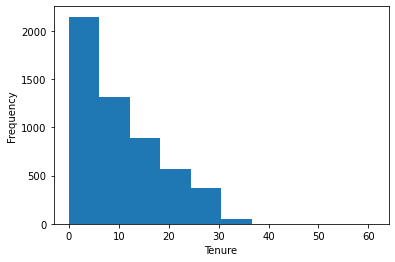

Histogram showing the count of customers by WarehouseToHome


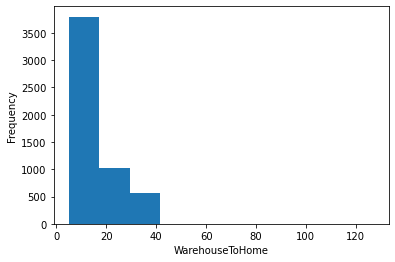

Histogram showing the count of customers by HourSpendOnApp


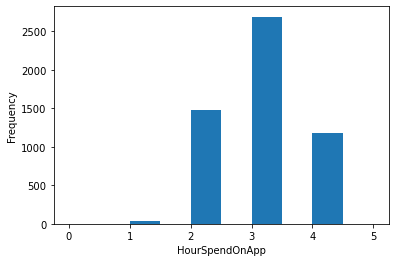

Histogram showing the count of customers by OrderAmountHikeFromlastYear


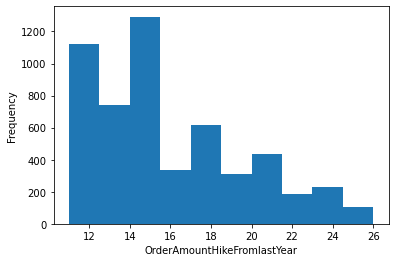

Histogram showing the count of customers by CouponUsed


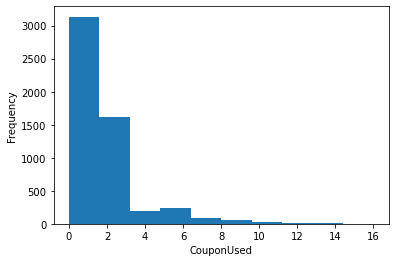

Histogram showing the count of customers by OrderCount


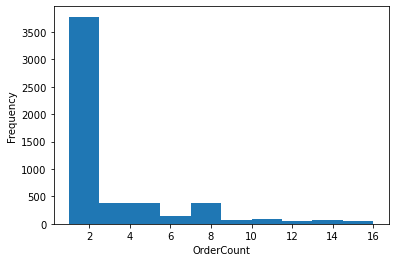

Histogram showing the count of customers by DaySinceLastOrder


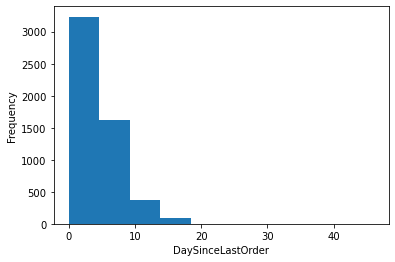

In [114]:
# Let us plot a histogram to see the spread of the data
num_vars_for_analysis=["Tenure","WarehouseToHome","HourSpendOnApp","OrderAmountHikeFromlastYear","CouponUsed","OrderCount",
                "DaySinceLastOrder"]
for i in num_vars_for_analysis:
    cust_beh[i].plot.hist()
    print("Histogram showing the count of customers by", i)
    plt.xlabel(i)
    plt.show()
    

In [115]:
# As per problem statement, we can use mean for imputation. Let us apply the same across all variables with missing values.
# The mean and median are very close for all the variables.
cust_beh.fillna(cust_beh.mean(),inplace=True)
cust_beh[["Tenure","WarehouseToHome","HourSpendOnApp","OrderAmountHikeFromlastYear","CouponUsed","OrderCount",
                "DaySinceLastOrder"]].describe()

Tenure  WarehouseToHome  HourSpendOnApp  \
count  5630.000000      5630.000000     5630.000000   
mean     10.189899        15.639896        2.931535   
std       8.354164         8.339095        0.705384   
min       0.000000         5.000000        0.000000   
25%       3.000000         9.000000        2.000000   
50%       9.000000        14.000000        3.000000   
75%      15.000000        20.000000        3.000000   
max      61.000000       127.000000        5.000000   

       OrderAmountHikeFromlastYear   CouponUsed   OrderCount  \
count                  5630.000000  5630.000000  5630.000000   
mean                     15.707922     1.751023     3.008004   
std                       3.587926     1.851038     2.871521   
min                      11.000000     0.000000     1.000000   
25%                      13.000000     1.000000     1.000000   
50%                      15.000000     1.000000     2.000000   
75%                      18.000000     2.000000     3.008004   
max                      26.000000    16.000000    16.000000   

       DaySinceLastOrder  
count        5630.000000  
mean            4.543491  
std             3.553382  
min             0.000000  
25%             2.000000  
50%             4.000000  
75%             7.000000  
max            46.000000

In [116]:
# Let us check the missing values after imputation
cust_beh.isnull().mean()*100

CustomerID                     0.0
Churn                          0.0
Tenure                         0.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                0.0
PreferredPaymentMode           0.0
Gender                         0.0
HourSpendOnApp                 0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    0.0
CouponUsed                     0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
CashbackAmount                 0.0
dtype: float64

In [117]:
# There are no missing values. Let us look at the outliers

#### Outlier Treatment

In [118]:
# Let us check the summary statistics
cust_beh.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5630.000000  5630.000000      5630.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.354164     0.915389         8.339095   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     3.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    15.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5630.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.705384                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5630.000000  5630.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.587926     1.851038   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5630.000000        5630.000000     5630.000000  
mean      3.008004           4.543491      177.221492  
std       2.871521           3.553382       49.193869  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      146.000000  
50%       2.000000           4.000000      163.000000  
75%       3.008004           7.000000      196.000000  
max      16.000000          46.000000      325.000000

In [119]:
# Let us check the names of the columns to create list of numeric variables
cust_beh.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [120]:
# creating a list of numeric variables to analyse outliers
num_vars_for_outlier_beh=['Tenure','CityTier','WarehouseToHome','HourSpendOnApp',
       'NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']
len(num_vars_for_outlier_beh)

13

Boxplot of Tenure


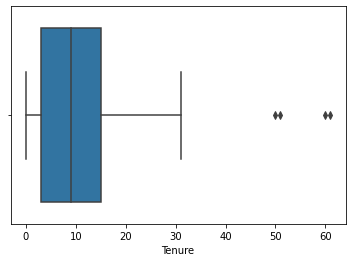

Boxplot of CityTier


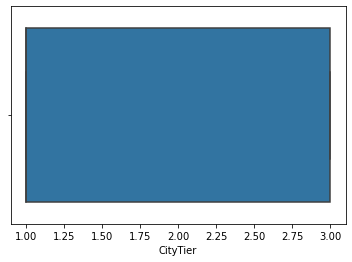

Boxplot of WarehouseToHome


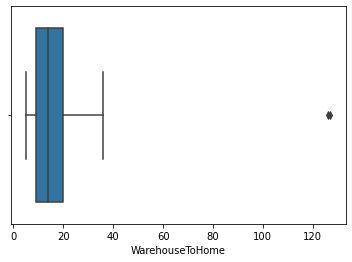

Boxplot of HourSpendOnApp


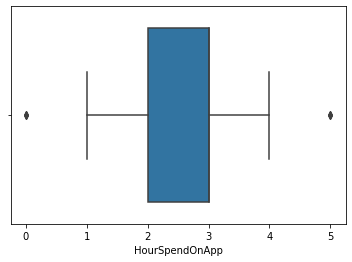

Boxplot of NumberOfDeviceRegistered


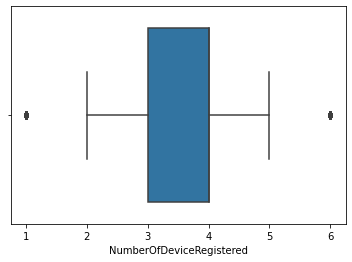

Boxplot of SatisfactionScore


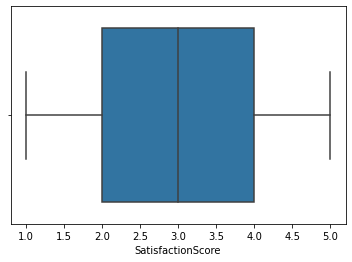

Boxplot of NumberOfAddress


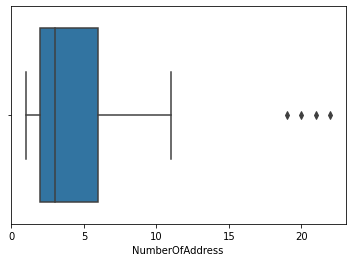

Boxplot of Complain


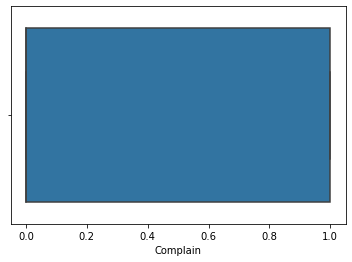

Boxplot of OrderAmountHikeFromlastYear


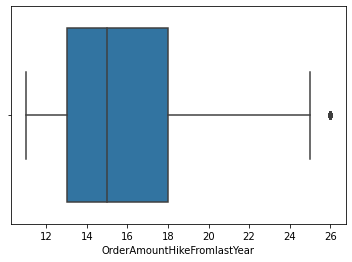

Boxplot of CouponUsed


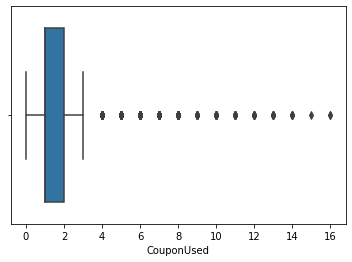

Boxplot of OrderCount


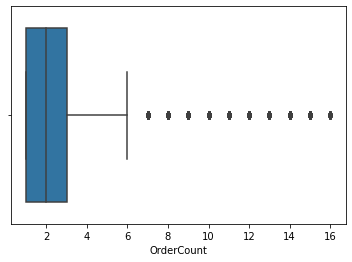

Boxplot of DaySinceLastOrder


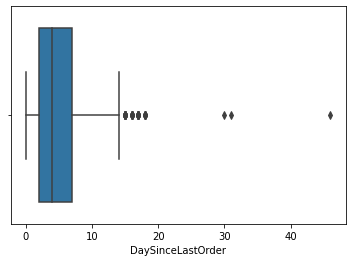

Boxplot of CashbackAmount


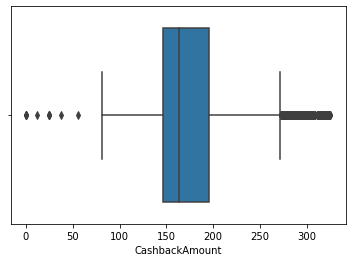

In [121]:
# plotting boxplot for numeric variables
for i in num_vars_for_outlier_beh:
    sns.boxplot(x=i,data=cust_beh)
    print("Boxplot of", i)
    plt.xlabel(i)
    plt.show()

#### The outliers are only statistical outliers. These may be natural customer behaviour. Hence no outlier treatment performed on the numeric variables.

In [122]:
# Let us check if the datatype of variables is in correct format.
# All variables have proper datatype.
cust_beh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

#### Data Cleaning categorical variables

In [123]:
# Let us check the counts in % terms for Preferred Login Device.
# Mobile Phone is the preferred Login Device.
cust_beh.PreferredLoginDevice.value_counts(normalize=True)*100

Mobile Phone    49.111901
Computer        29.023091
Phone           21.865009
Name: PreferredLoginDevice, dtype: float64

In [124]:
# Let us check the % count of Preferred Payment Mode
cust_beh.PreferredPaymentMode.value_counts(normalize=True)*100

Debit Card          41.101243
Credit Card         26.660746
E wallet            10.905861
UPI                  7.353464
COD                  6.483126
CC                   4.849023
Cash on Delivery     2.646536
Name: PreferredPaymentMode, dtype: float64

In [125]:
# Performing data cleaning of Preferred Payment Mode variable.
cust_beh["PreferredPaymentMode"]=cust_beh["PreferredPaymentMode"].replace("Cash on Delivery","COD")
cust_beh["PreferredPaymentMode"]=cust_beh["PreferredPaymentMode"].replace("CC","Credit Card")
cust_beh["PreferredPaymentMode"]=cust_beh["PreferredPaymentMode"].replace("UPI","E wallet")

In [126]:
# Let us check the % count after cleaning
# Debit Card is the preferred payment mode
cust_beh.PreferredPaymentMode.value_counts(normalize=True)*100

Debit Card     41.101243
Credit Card    31.509769
E wallet       18.259325
COD             9.129663
Name: PreferredPaymentMode, dtype: float64

In [127]:
# let us check the gender mix of customers
# 60% of the customers are Male.
cust_beh.Gender.value_counts(normalize=True)*100

Male      60.106572
Female    39.893428
Name: Gender, dtype: float64

In [128]:
# Let us check the Preferred Order Category in the last month
cust_beh.PreferedOrderCat.value_counts(normalize=True)*100

Laptop & Accessory    36.412078
Mobile Phone          22.575488
Fashion               14.671403
Mobile                14.369449
Grocery                7.282416
Others                 4.689165
Name: PreferedOrderCat, dtype: float64

In [129]:
# Clubbing Mobile and Mobile Phone together
# Mobile Phone and Laptop and Accessory are the preferred product category by customers in the last month
cust_beh["PreferedOrderCat"]=cust_beh["PreferedOrderCat"].replace("Mobile","Mobile Phone")
cust_beh.PreferedOrderCat.value_counts(normalize=True)*100

Mobile Phone          36.944938
Laptop & Accessory    36.412078
Fashion               14.671403
Grocery                7.282416
Others                 4.689165
Name: PreferedOrderCat, dtype: float64

In [130]:
# Let us check the marital status of the customers
cust_beh.MaritalStatus.value_counts(normalize=True)*100

Married     53.037300
Single      31.900533
Divorced    15.062167
Name: MaritalStatus, dtype: float64

#### Dropping columns

In [131]:
# Let us drop the column "CustomerID" as it is not relevant for building the model
cust_beh.drop("CustomerID",axis=1, inplace=True)

#### Renaming columns

In [132]:
# Let us now rename the column complain
cust_beh.rename(columns={"Complain":"Complaint"},inplace=True)

print(cust_beh.shape)

(5630, 19)


In [133]:
# Let us check the names of the columns after being renamed
cust_beh.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complaint',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

#### Categorising the columns

In [134]:
target=["Churn"]
cat_vars_beh=['PreferredLoginDevice','PreferredPaymentMode', 'Gender','PreferedOrderCat','MaritalStatus','CityTier',]
num_vars_beh=['Tenure','WarehouseToHome','HourSpendOnApp',
       'NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress', 'Complaint',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']
print("The number of categorical variables are :",len(cat_vars_beh))
print("The number of numeric variables are :",len(num_vars_beh))

The number of categorical variables are : 6
The number of numeric variables are : 12


## 3.Customer Churn Model

### iii.Data Visualisation and Insights

#### Univariate, Bivariate and Multi variate Analysis

In [135]:
# Let us begin with univariate analysis of categorical variables

Bar Chart showing the Customers Gender wise and Churn Rate by Gender


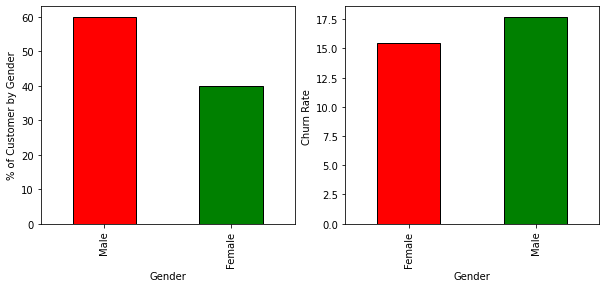

In [136]:
# Let us look at the Gender data
# Churn Rate is more where customer is a male.
plt.figure(figsize=(10,4))
print("Bar Chart showing the Customers Gender wise and Churn Rate by Gender")
plt.subplot(1,2,1)
(cust_beh["Gender"].value_counts(normalize=True)*100).plot.bar(color=["red","green"],edgecolor="black")
plt.xlabel("Gender")
plt.ylabel("% of Customer by Gender")

plt.subplot(1,2,2)
(cust_beh.groupby("Gender")["Churn"].mean()*100).plot.bar(color=["red","green"],edgecolor="black")
plt.xlabel("Gender")
plt.ylabel("Churn Rate ")
plt.show()

Bar Chart showing the Customers by Preferred Login Device and Churn Rate


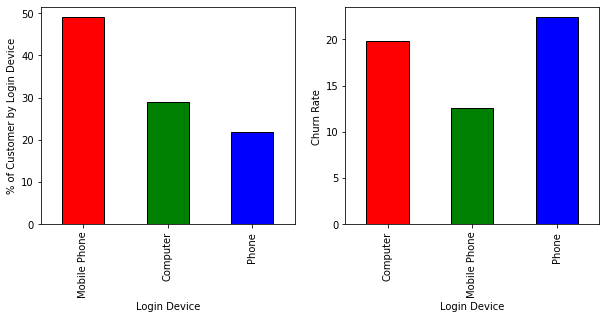

In [137]:
# Let us explore the variable Preferred Login Device
# Almost 50% customers prefer mobile phone to login and this has lower churn rate compared to Computer and Phone.
plt.figure(figsize=(10,4))
print("Bar Chart showing the Customers by Preferred Login Device and Churn Rate")
plt.subplot(1,2,1)
(cust_beh['PreferredLoginDevice'].value_counts(normalize=True)*100).plot.bar(color=["red","green","blue"],edgecolor="black")
plt.xlabel("Login Device")
plt.ylabel("% of Customer by Login Device")

plt.subplot(1,2,2)
(cust_beh.groupby("PreferredLoginDevice")["Churn"].mean()*100).plot.bar(color=["red","green","blue"],edgecolor="black")
plt.xlabel("Login Device")
plt.ylabel("Churn Rate ")
plt.show()

Bar Chart showing the Customers by Preferred Payment Mode and Churn Rate


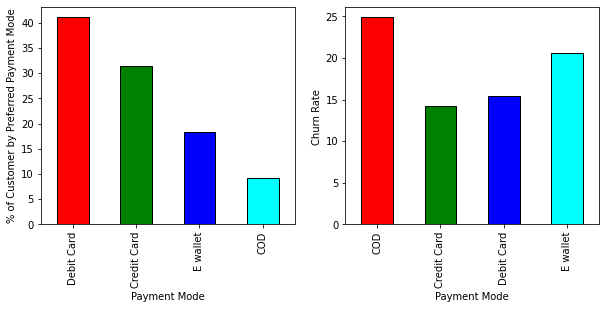

In [138]:
# Let us now plot barchart for preferred payment mode
# Churn rate is highest in case of customers preferring cash on delivery mode of payment
plt.figure(figsize=(10,4))
print("Bar Chart showing the Customers by Preferred Payment Mode and Churn Rate")
plt.subplot(1,2,1)
(cust_beh['PreferredPaymentMode'].value_counts(normalize=True)*100).plot.bar(color=["red","green","blue","cyan"],edgecolor="black")
plt.xlabel("Payment Mode")
plt.ylabel("% of Customer by Preferred Payment Mode")

plt.subplot(1,2,2)
(cust_beh.groupby('PreferredPaymentMode')["Churn"].mean()*100).plot.bar(color=["red","green","blue","cyan"],edgecolor="black")
plt.xlabel("Payment Mode")
plt.ylabel("Churn Rate ")
plt.show()

Bar Chart showing the Customers by preferred order category and Churn Rate


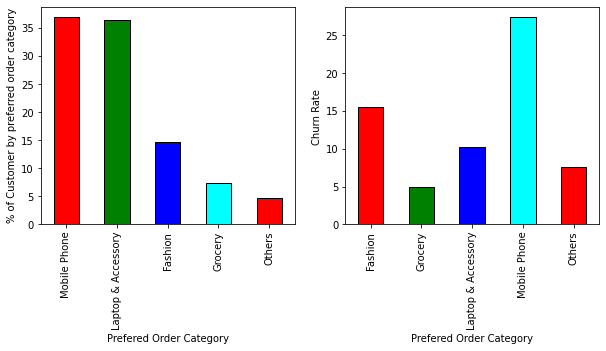

In [139]:
# Churn Rate is high in customers whose preferred order category is Mobile Phones.
plt.figure(figsize=(10,4))
print("Bar Chart showing the Customers by preferred order category and Churn Rate")
plt.subplot(1,2,1)
(cust_beh['PreferedOrderCat'].value_counts(normalize=True)*100).plot.bar(color=["red","green","blue","cyan"],edgecolor="black")
plt.xlabel('Prefered Order Category')
plt.ylabel("% of Customer by preferred order category")

plt.subplot(1,2,2)
(cust_beh.groupby('PreferedOrderCat')["Churn"].mean()*100).plot.bar(color=["red","green","blue","cyan"],edgecolor="black")
plt.xlabel('Prefered Order Category')
plt.ylabel("Churn Rate ")
plt.show()

Bar Chart showing the Customers by Marital Status and Churn Rate


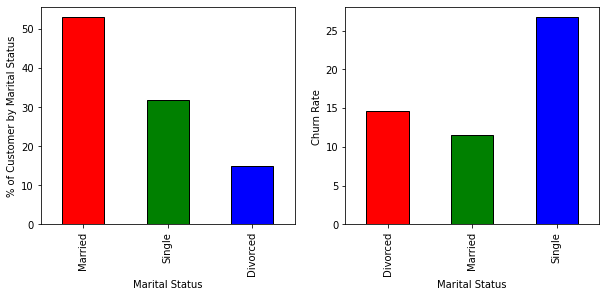

In [140]:
# Let us check the variable Marital Status and churn data for the same
plt.figure(figsize=(10,4))
print("Bar Chart showing the Customers by Marital Status and Churn Rate")
plt.subplot(1,2,1)
(cust_beh['MaritalStatus'].value_counts(normalize=True)*100).plot.bar(color=["red","green","blue"],edgecolor="black")
plt.xlabel('Marital Status')
plt.ylabel("% of Customer by Marital Status")

plt.subplot(1,2,2)
(cust_beh.groupby('MaritalStatus')["Churn"].mean()*100).plot.bar(color=["red","green","blue"],edgecolor="black")
plt.xlabel('Marital Status')
plt.ylabel("Churn Rate ")
plt.show()

Bar Chart showing the Customers by City Tier and Churn Rate


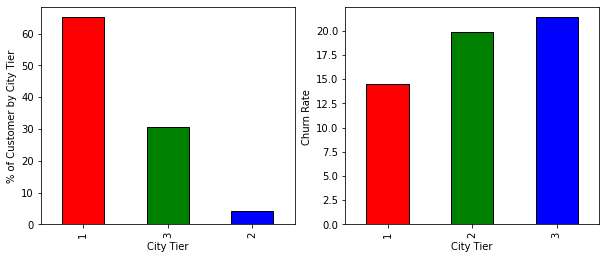

In [141]:
# Let us check the churn rate by city tier
# Churn Rate is higher in Tier3 city
plt.figure(figsize=(10,4))
print("Bar Chart showing the Customers by City Tier and Churn Rate")
plt.subplot(1,2,1)
(cust_beh['CityTier'].value_counts(normalize=True)*100).plot.bar(color=["red","green","blue"],edgecolor="black")
plt.xlabel('City Tier')
plt.ylabel("% of Customer by City Tier")

plt.subplot(1,2,2)
(cust_beh.groupby('CityTier')["Churn"].mean()*100).plot.bar(color=["red","green","blue"],edgecolor="black")
plt.xlabel('City Tier')
plt.ylabel("Churn Rate ")
plt.show()

#### Numeric variables

<Figure size 2880x1440 with 0 Axes>

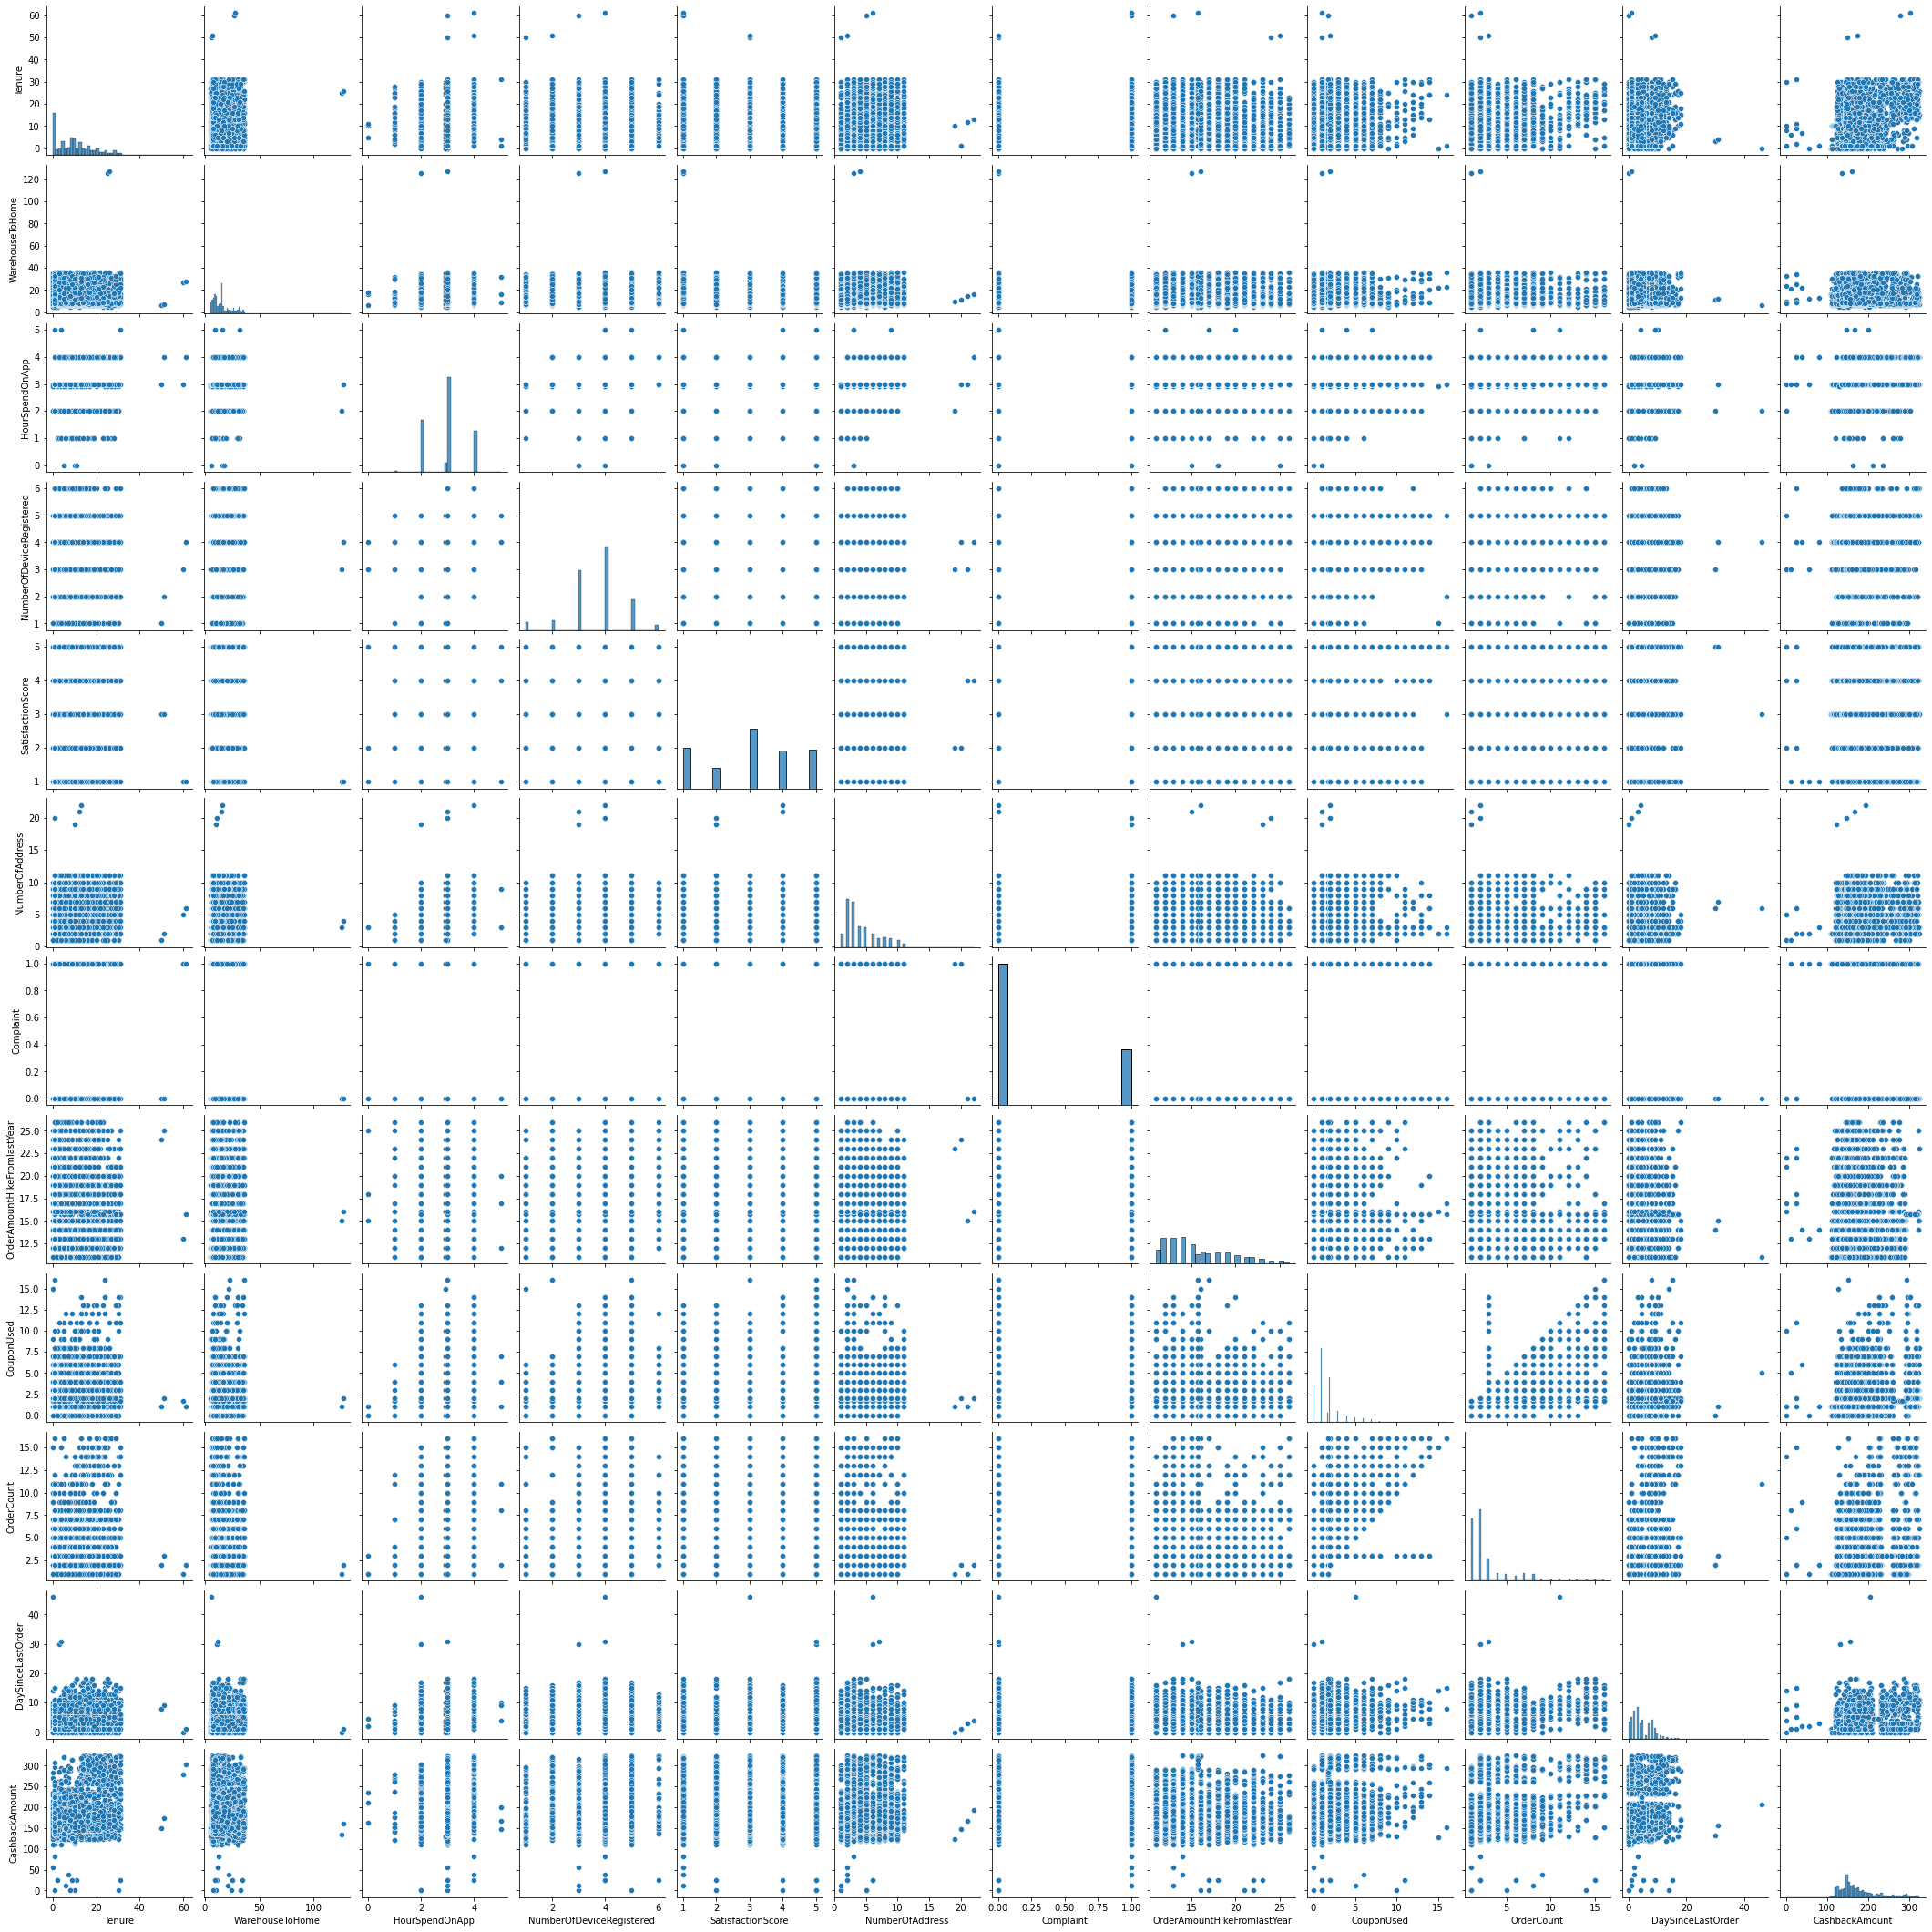

In [142]:
# Since we have performed the univariate analysis of numeric variables during missing value and outlier treatment, we will now proceed with bivariate analysis
# let us plot a scatter plot for the same.
plt.figure(figsize=(40,20))
sns.pairplot(data= cust_beh,vars=num_vars_beh)
plt.show()

In [143]:
# Order Counts are more where coupons used increases.

#### Numeric Vs Categorical

Boxplot PreferredLoginDevice Vs Tenure


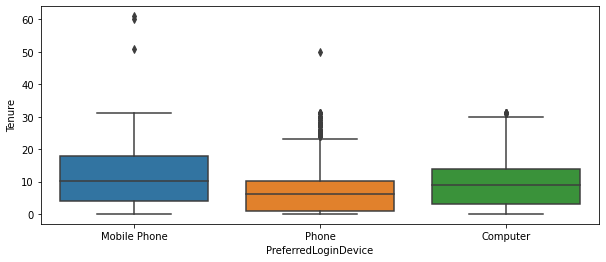

Boxplot PreferredLoginDevice Vs WarehouseToHome


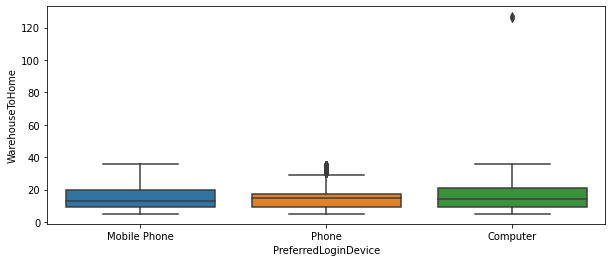

Boxplot PreferredLoginDevice Vs HourSpendOnApp


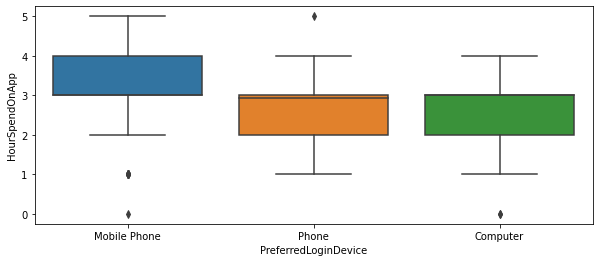

Boxplot PreferredLoginDevice Vs NumberOfDeviceRegistered


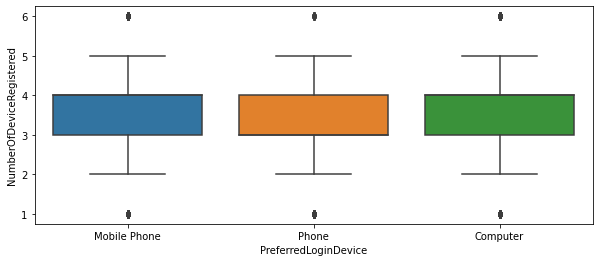

Boxplot PreferredLoginDevice Vs SatisfactionScore


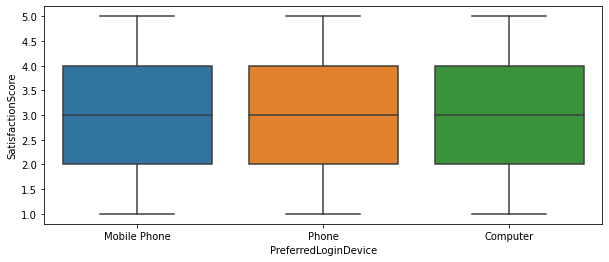

Boxplot PreferredLoginDevice Vs NumberOfAddress


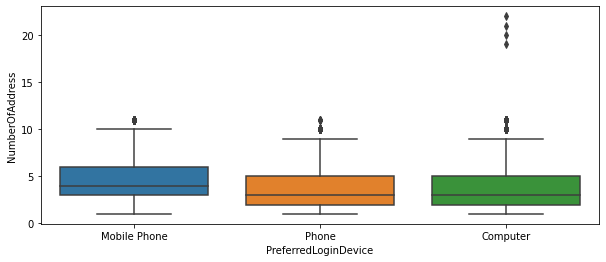

Boxplot PreferredLoginDevice Vs Complaint


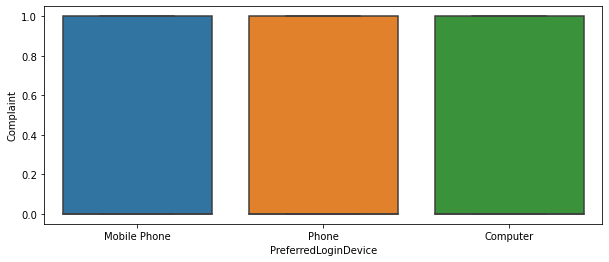

Boxplot PreferredLoginDevice Vs OrderAmountHikeFromlastYear


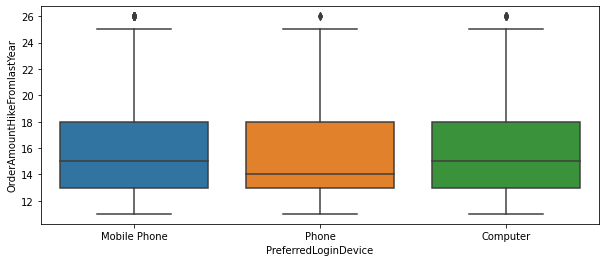

Boxplot PreferredLoginDevice Vs CouponUsed


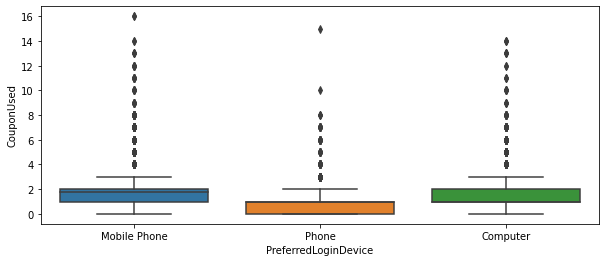

Boxplot PreferredLoginDevice Vs OrderCount


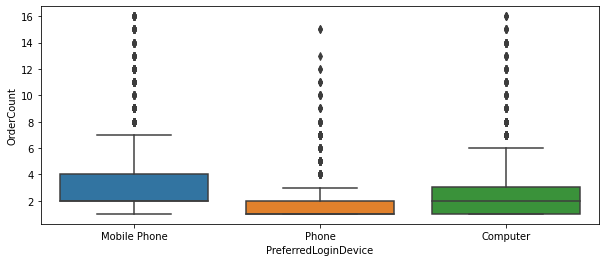

Boxplot PreferredLoginDevice Vs DaySinceLastOrder


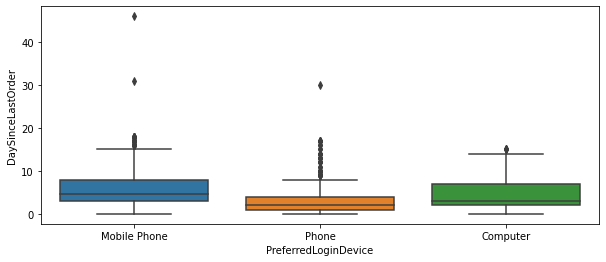

Boxplot PreferredLoginDevice Vs CashbackAmount


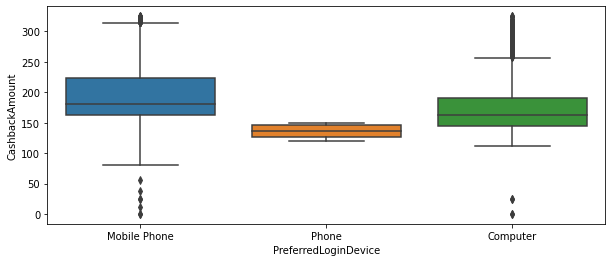

Boxplot PreferredPaymentMode Vs Tenure


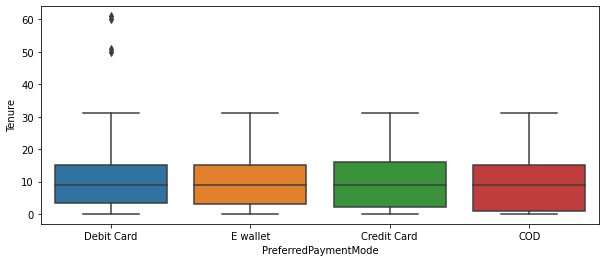

Boxplot PreferredPaymentMode Vs WarehouseToHome


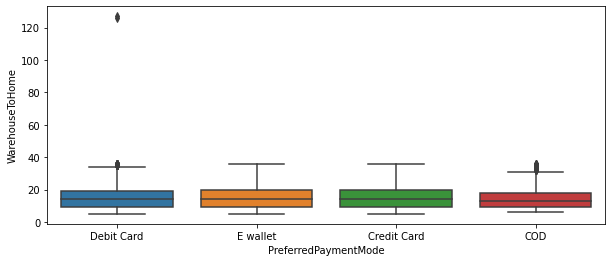

Boxplot PreferredPaymentMode Vs HourSpendOnApp


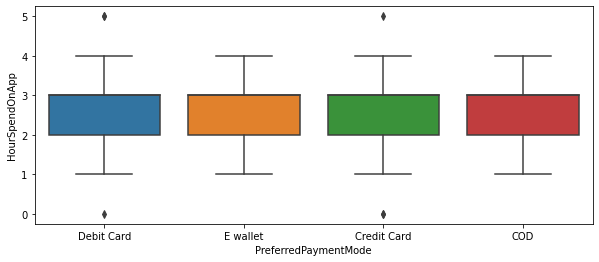

Boxplot PreferredPaymentMode Vs NumberOfDeviceRegistered


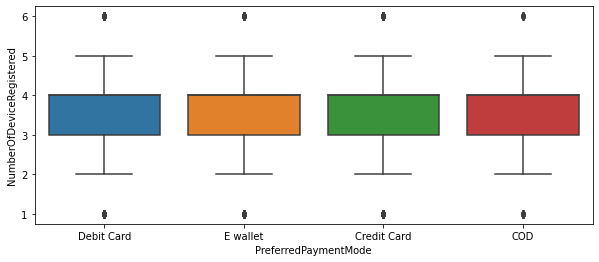

Boxplot PreferredPaymentMode Vs SatisfactionScore


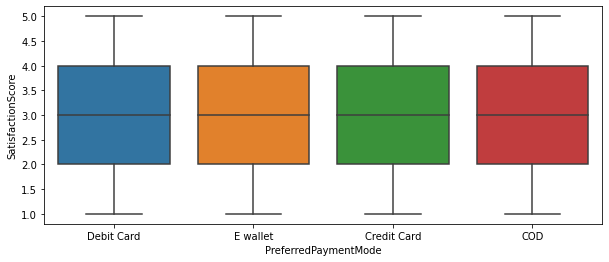

Boxplot PreferredPaymentMode Vs NumberOfAddress


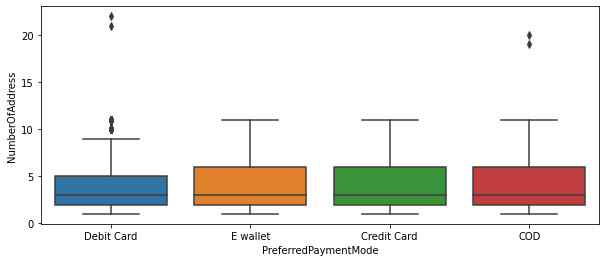

Boxplot PreferredPaymentMode Vs Complaint


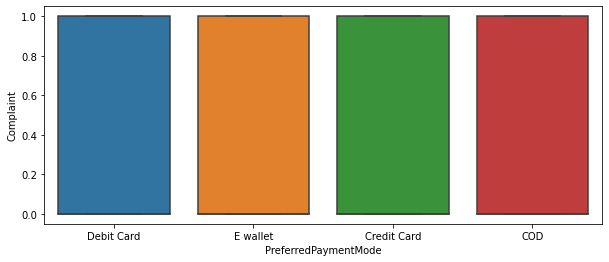

Boxplot PreferredPaymentMode Vs OrderAmountHikeFromlastYear


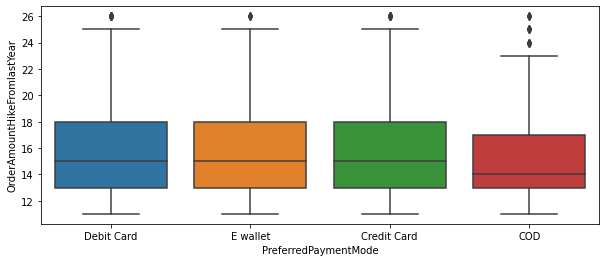

Boxplot PreferredPaymentMode Vs CouponUsed


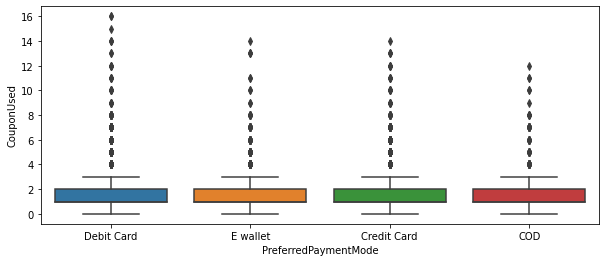

Boxplot PreferredPaymentMode Vs OrderCount


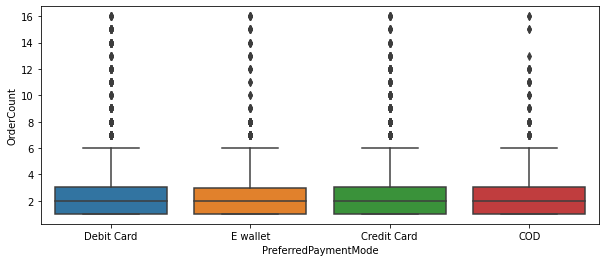

Boxplot PreferredPaymentMode Vs DaySinceLastOrder


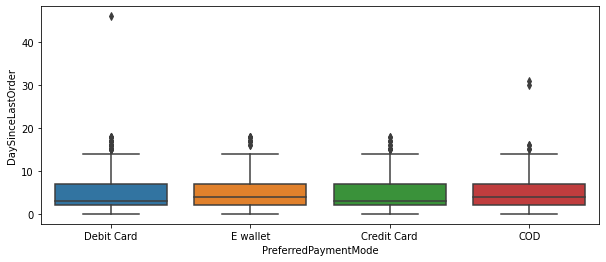

Boxplot PreferredPaymentMode Vs CashbackAmount


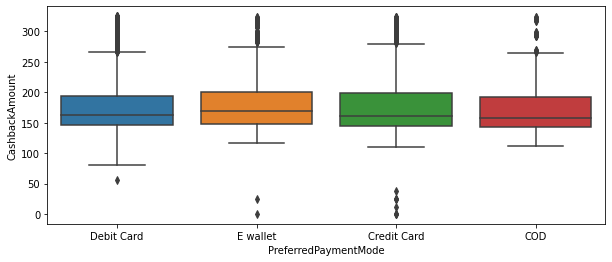

Boxplot Gender Vs Tenure


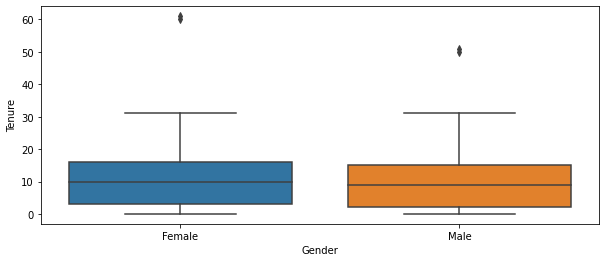

Boxplot Gender Vs WarehouseToHome


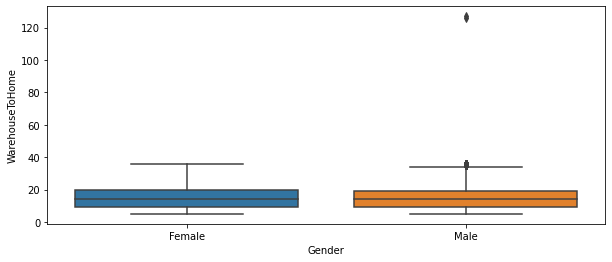

Boxplot Gender Vs HourSpendOnApp


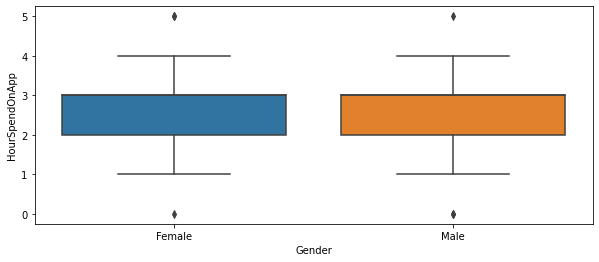

Boxplot Gender Vs NumberOfDeviceRegistered


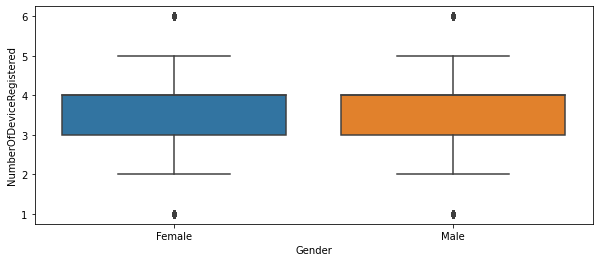

Boxplot Gender Vs SatisfactionScore


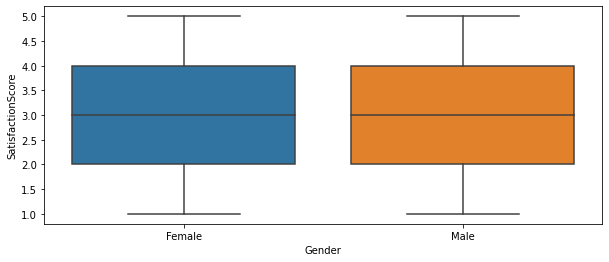

Boxplot Gender Vs NumberOfAddress


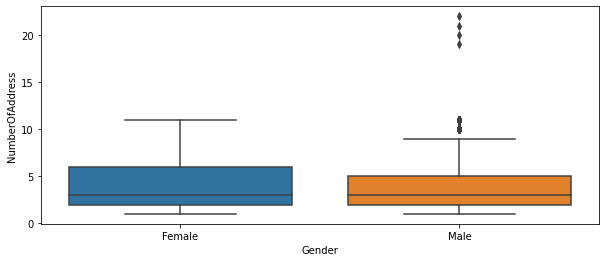

Boxplot Gender Vs Complaint


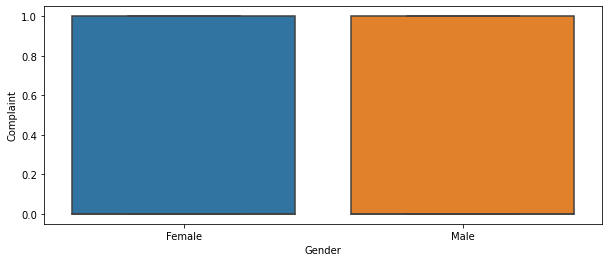

Boxplot Gender Vs OrderAmountHikeFromlastYear


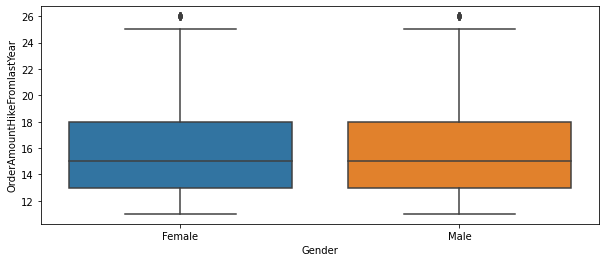

Boxplot Gender Vs CouponUsed


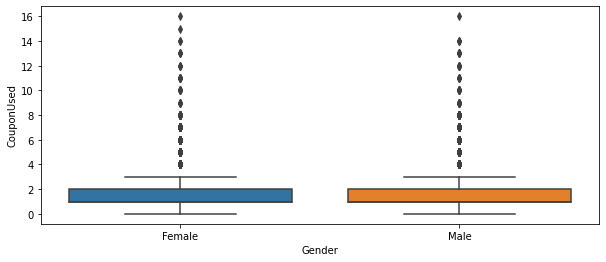

Boxplot Gender Vs OrderCount


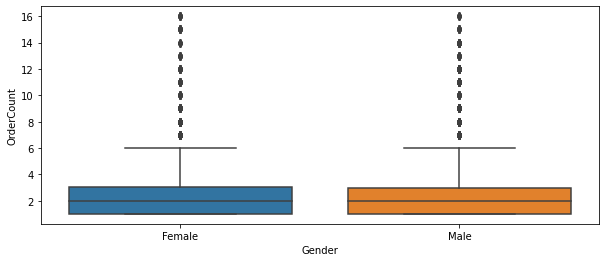

Boxplot Gender Vs DaySinceLastOrder


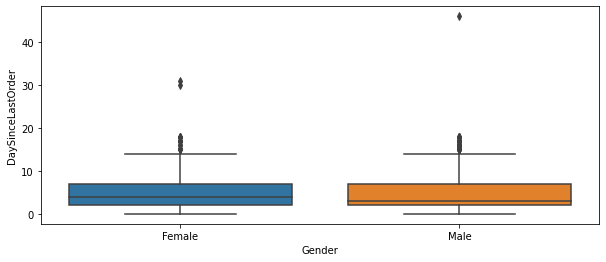

Boxplot Gender Vs CashbackAmount


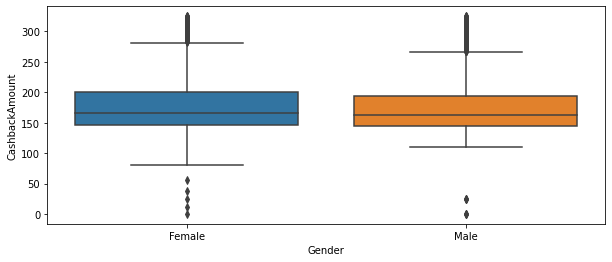

Boxplot PreferedOrderCat Vs Tenure


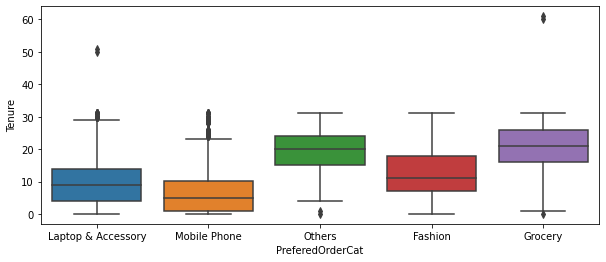

Boxplot PreferedOrderCat Vs WarehouseToHome


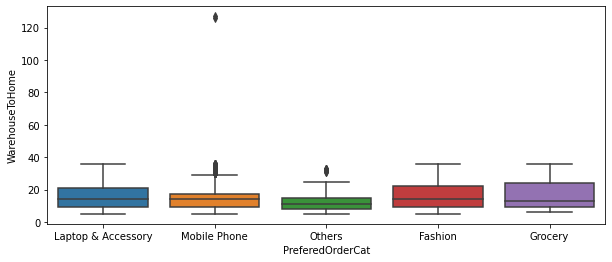

Boxplot PreferedOrderCat Vs HourSpendOnApp


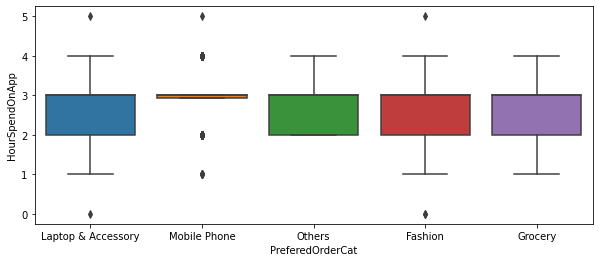

Boxplot PreferedOrderCat Vs NumberOfDeviceRegistered


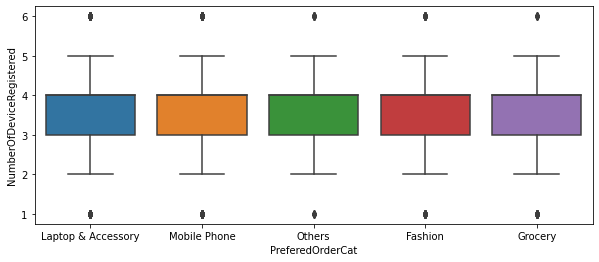

Boxplot PreferedOrderCat Vs SatisfactionScore


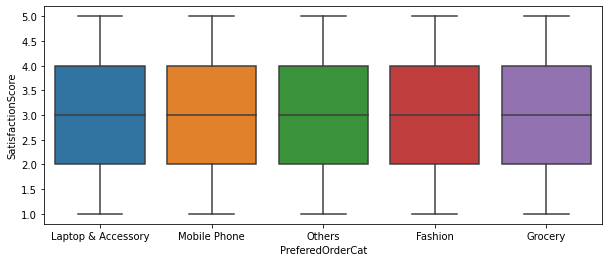

Boxplot PreferedOrderCat Vs NumberOfAddress


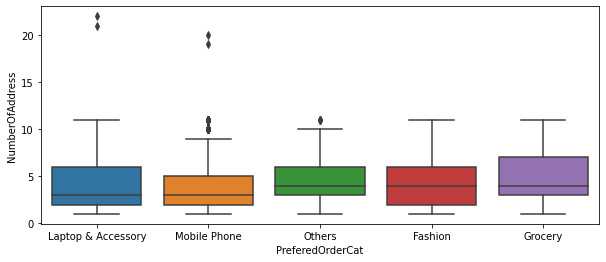

Boxplot PreferedOrderCat Vs Complaint


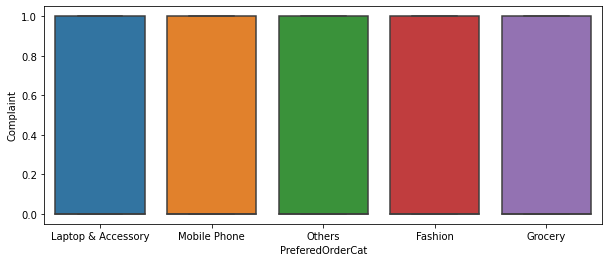

Boxplot PreferedOrderCat Vs OrderAmountHikeFromlastYear


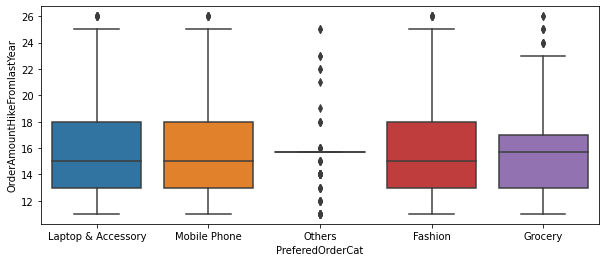

Boxplot PreferedOrderCat Vs CouponUsed


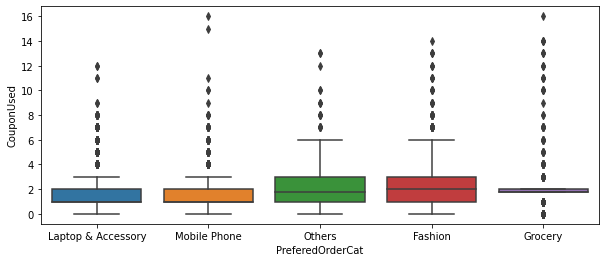

Boxplot PreferedOrderCat Vs OrderCount


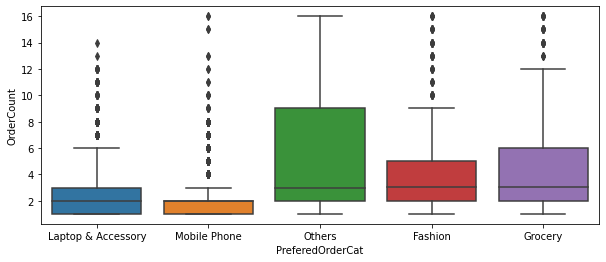

Boxplot PreferedOrderCat Vs DaySinceLastOrder


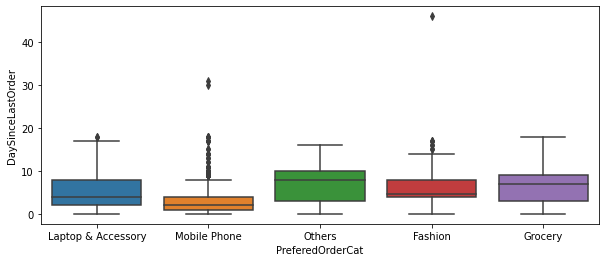

Boxplot PreferedOrderCat Vs CashbackAmount


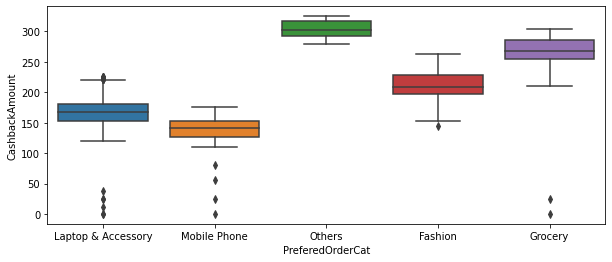

Boxplot MaritalStatus Vs Tenure


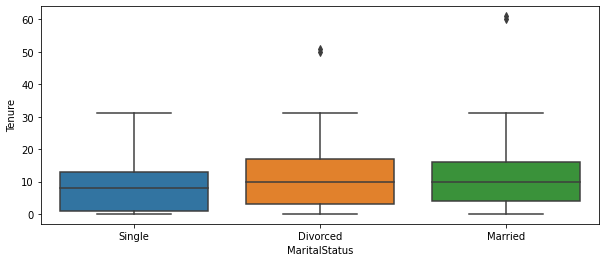

Boxplot MaritalStatus Vs WarehouseToHome


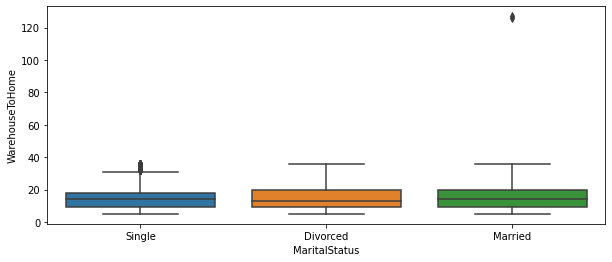

Boxplot MaritalStatus Vs HourSpendOnApp


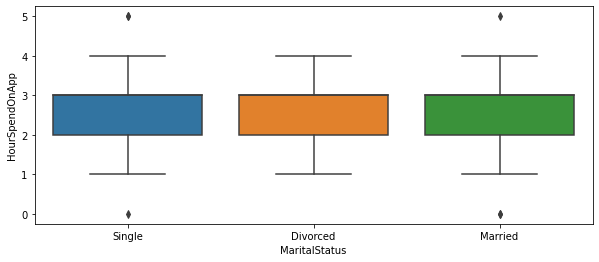

Boxplot MaritalStatus Vs NumberOfDeviceRegistered


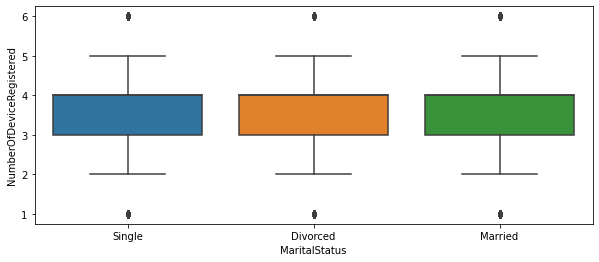

Boxplot MaritalStatus Vs SatisfactionScore


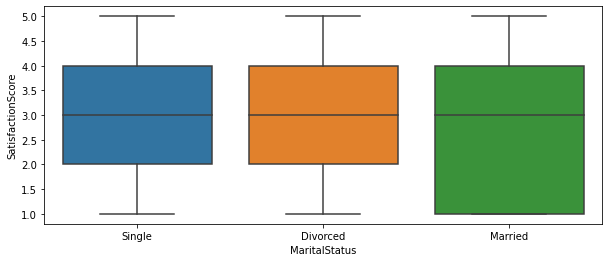

Boxplot MaritalStatus Vs NumberOfAddress


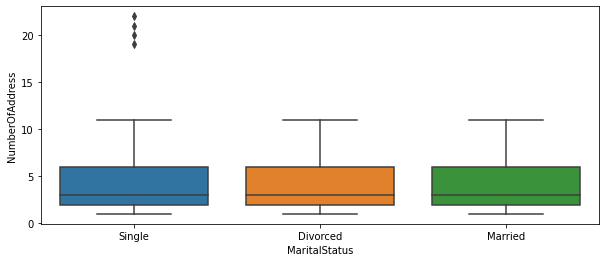

Boxplot MaritalStatus Vs Complaint


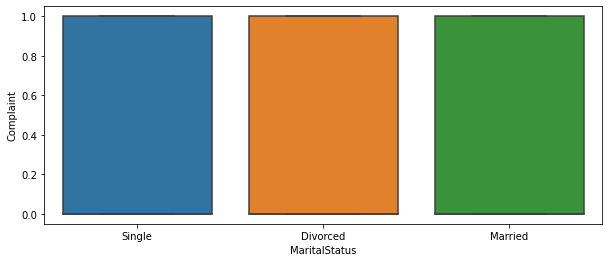

Boxplot MaritalStatus Vs OrderAmountHikeFromlastYear


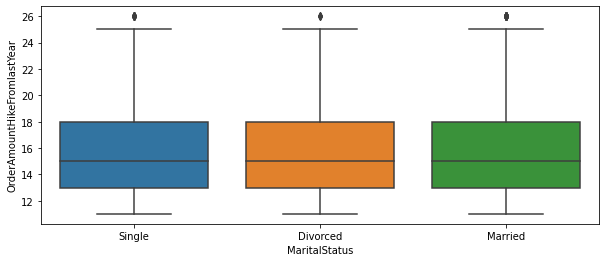

Boxplot MaritalStatus Vs CouponUsed


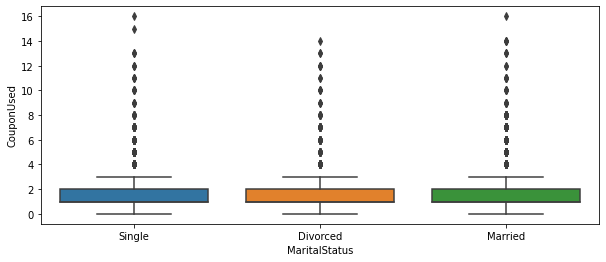

Boxplot MaritalStatus Vs OrderCount


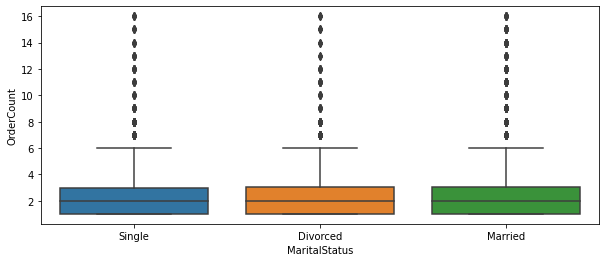

Boxplot MaritalStatus Vs DaySinceLastOrder


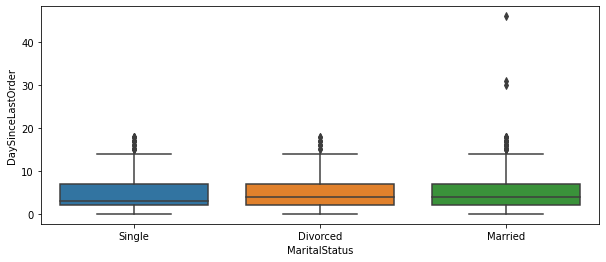

Boxplot MaritalStatus Vs CashbackAmount


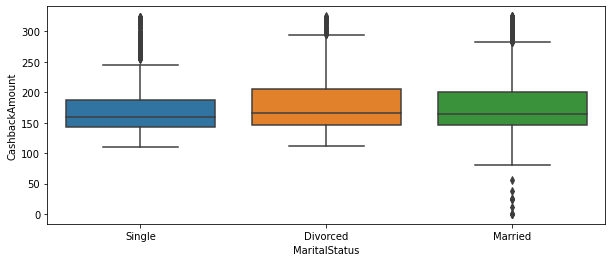

Boxplot CityTier Vs Tenure


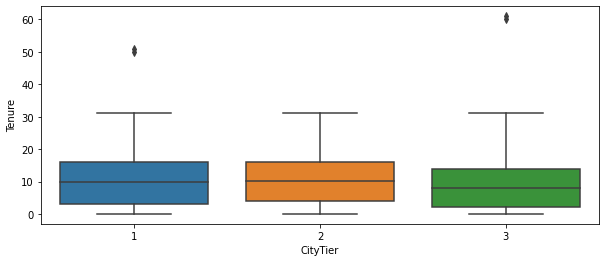

Boxplot CityTier Vs WarehouseToHome


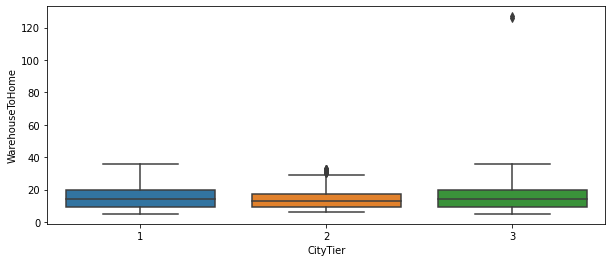

Boxplot CityTier Vs HourSpendOnApp


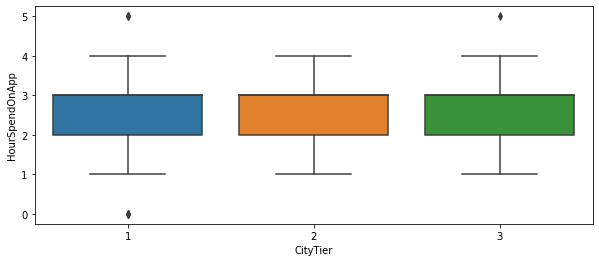

Boxplot CityTier Vs NumberOfDeviceRegistered


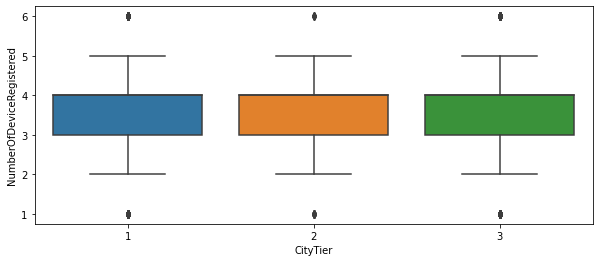

Boxplot CityTier Vs SatisfactionScore


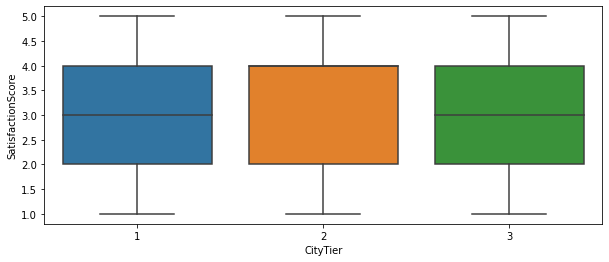

Boxplot CityTier Vs NumberOfAddress


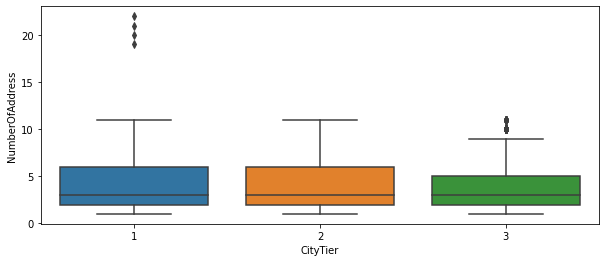

Boxplot CityTier Vs Complaint


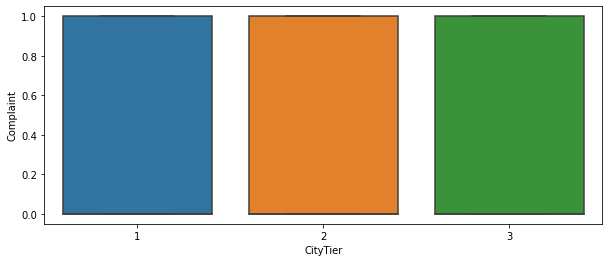

Boxplot CityTier Vs OrderAmountHikeFromlastYear


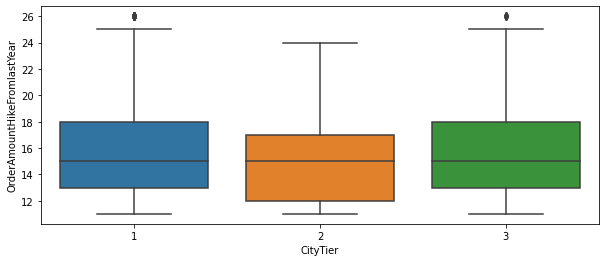

Boxplot CityTier Vs CouponUsed


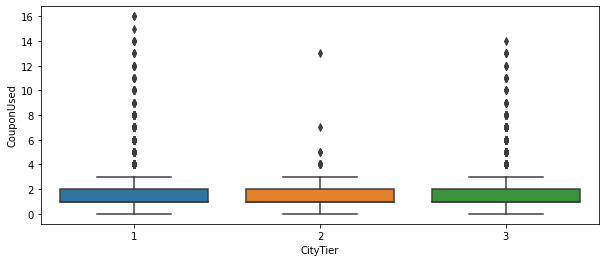

Boxplot CityTier Vs OrderCount


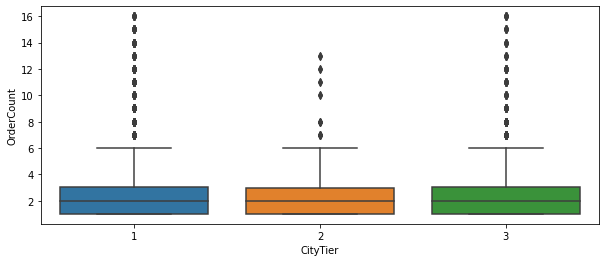

Boxplot CityTier Vs DaySinceLastOrder


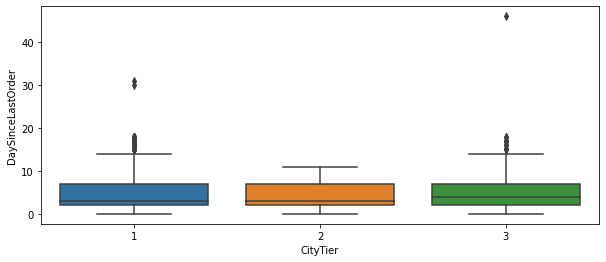

Boxplot CityTier Vs CashbackAmount


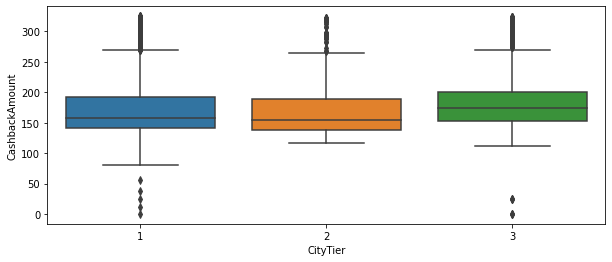

In [144]:
# Let us plot a boxplot to see the insights between numeric and categorical variable
for i in cat_vars_beh:
    for j in num_vars_beh:
        plt.figure(figsize=(10,4))
        print("Boxplot",i ,"Vs",j)
        sns.boxplot(x=i,y=j,data=cust_beh)
        plt.show()

#### Multivariate Analysis

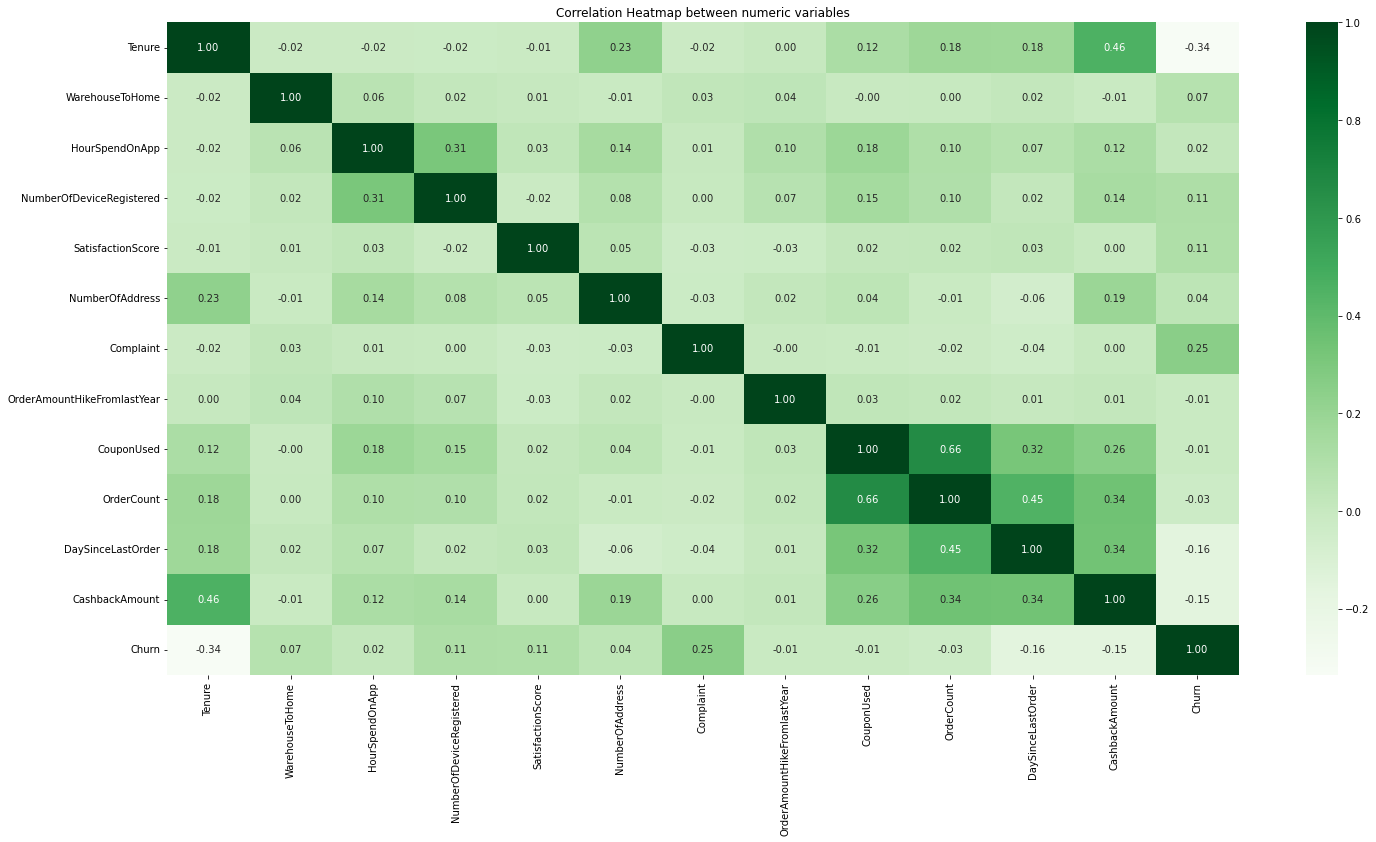

In [145]:
# Let us plot a heatmap to see the correlation between numeric variables
plt.figure(figsize=(24, 12))
plt.title("Correlation Heatmap between numeric variables")
sns.heatmap(data=cust_beh[(num_vars_beh+target)].corr(), annot=True, cmap="Greens",fmt='.2f')
plt.show()

#### EDA Insights

#### Coupons used increase with increase in Order Count
#### Customers with Mobile Phone spend atleast 2 hours on the app.
#### The average Satisfaction Score is 3 across all Login Devices and payment mode.
#### More than 50 % of the customers using login device Mobile Phone and Computer have increased their Order amounts by 15% or more in all cities
#### More than 50 % of the customers preferring Debit Card, E Wallet and Credit Card paymnet mode have increased their Order amounts by 15% or more
#### Customers spend 3 hours on App looking for products related to Mobile Phone
#### 25% the customers preferring order category Laptop & Accessory, Mobile Phone and Fashion have hiked their Order Amount by 18% or more 

#### Churn rate is high for  : 
    1.in tier 3 city
    2.Customers whose preferred order category is Mobile Phones.
    3.Customers preferring cash on delivery mode of payment.50% of customers preferring COD have order hikes of 14% or less.
    4.Male customers and Single Customers

#### Churn Rate is low  :
    1.as the tenure of the customer increases.
    2.for customers whose preferred login device is mobile phones.They have more order counts



## 3.Customer Churn Model

###    iv.Data Preparation incl handling Data Imbalance

#### Dummy Variable

In [146]:
# Let us start the data preparation by creating dummy variables for categorical variables.
# Let us first check the dataframe shape
cust_beh.shape

(5630, 19)

In [147]:
# creating dummy variables
dummy2=pd.get_dummies(cust_beh[['PreferredLoginDevice','PreferredPaymentMode', 'Gender','PreferedOrderCat','MaritalStatus']],drop_first=True)

In [148]:
# merging with the main dataframe
cust_beh=pd.concat([cust_beh,dummy2],axis=1)
cust_beh.shape

(5630, 31)

In [149]:
# dropping the categorical variables
cust_beh.drop(['PreferredLoginDevice','PreferredPaymentMode', 'Gender','PreferedOrderCat','MaritalStatus'],axis=1,inplace=True)

In [150]:
cust_beh.head()

Churn     Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0      1   4.000000         3              6.0        3.000000   
1      1  10.189899         1              8.0        3.000000   
2      1  10.189899         1             30.0        2.000000   
3      1   0.000000         3             15.0        2.000000   
4      1   0.000000         1             12.0        2.931535   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complaint  \
0                         3                  2                9          1   
1                         4                  3                7          1   
2                         4                  3                6          1   
3                         4                  5                8          0   
4                         3                  5                3          0   

   OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                         11.0         1.0         1.0                5.0   
1                         15.0         0.0         1.0                0.0   
2                         14.0         0.0         1.0                3.0   
3                         23.0         0.0         1.0                3.0   
4                         11.0         1.0         1.0                3.0   

   CashbackAmount  PreferredLoginDevice_Mobile Phone  \
0             160                                  1   
1             121                                  0   
2             120                                  0   
3             134                                  0   
4             130                                  0   

   PreferredLoginDevice_Phone  PreferredPaymentMode_Credit Card  \
0                           0                                 0   
1                           1                                 0   
2                           1                                 0   
3                           1                                 0   
4                           1                                 1   

   PreferredPaymentMode_Debit Card  PreferredPaymentMode_E wallet  \
0                                1                              0   
1                                0                              1   
2                                1                              0   
3                                1                              0   
4                                0                              0   

   Gender_Male  PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0            0                         0                                    1   
1            1                         0                                    0   
2            1                         0                                    0   
3            1                         0                                    1   
4            1                         0                                    0   

   PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
0                              0                        0   
1                              1                        0   
2                              1                        0   
3                              0                        0   
4                              1                        0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      0                     1  
2                      0                     1  
3                      0                     1  
4                      0                     1

In [151]:
# Creating dummy variables for CityTier.

dummy3=pd.get_dummies(cust_beh["CityTier"],prefix="CityTier",drop_first=True)
dummy3.head()

CityTier_2  CityTier_3
0           0           1
1           0           0
2           0           0
3           0           1
4           0           0

In [152]:
# merging with the main dataframe
cust_beh=pd.concat([cust_beh,dummy3],axis=1)
cust_beh.shape

(5630, 28)

In [153]:
# dropping the categorical variable CityTier
cust_beh.drop(["CityTier"],axis=1,inplace=True)

In [154]:
# Let us check the dataframe details after dummy variable creation.
cust_beh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5630 non-null   int64  
 1   Tenure                               5630 non-null   float64
 2   WarehouseToHome                      5630 non-null   float64
 3   HourSpendOnApp                       5630 non-null   float64
 4   NumberOfDeviceRegistered             5630 non-null   int64  
 5   SatisfactionScore                    5630 non-null   int64  
 6   NumberOfAddress                      5630 non-null   int64  
 7   Complaint                            5630 non-null   int64  
 8   OrderAmountHikeFromlastYear          5630 non-null   float64
 9   CouponUsed                           5630 non-null   float64
 10  OrderCount                           5630 non-null   float64
 11  DaySinceLastOrder             

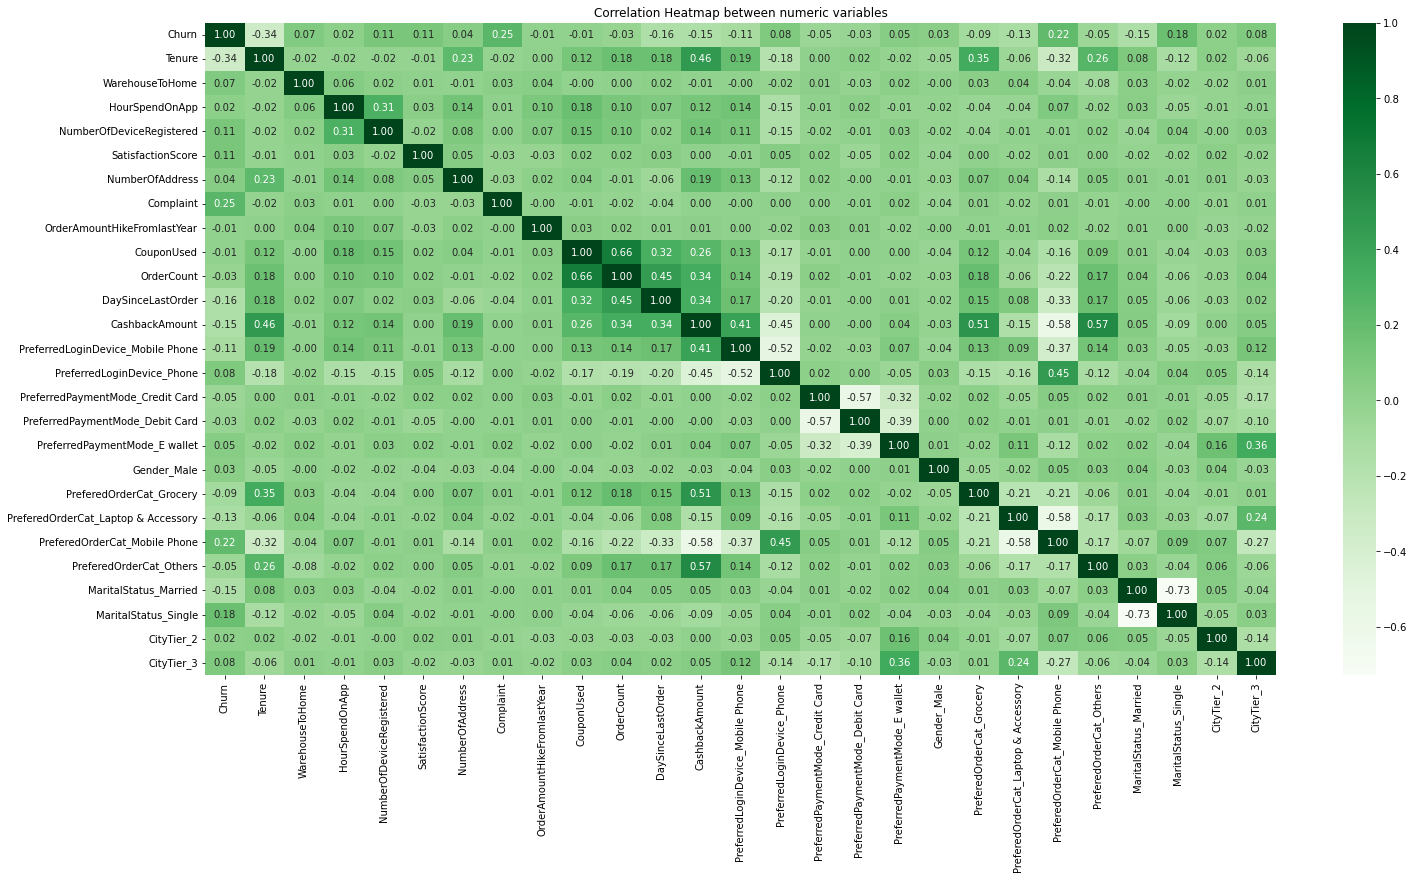

In [155]:
# Let us plot a heatmap to see the correlation between numeric variables
plt.figure(figsize=(24, 12))
plt.title("Correlation Heatmap between numeric variables")
sns.heatmap(data=cust_beh.corr(), annot=True, cmap="Greens",fmt='.2f')
plt.show()

#### Data Imbalance Check

Text(0.5, 1.0, 'Pie Chart showing the split of the target variable-Churn')

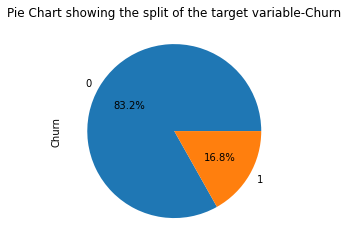

In [156]:
# There is an imbalance in the target variable-Churn. Modelling on this might lead to bias.
# To address this, let us split the data into train and test and apply data balancing techniques
cust_beh.Churn.value_counts(normalize=True).plot.pie(autopct="%.1f%%")
plt.title("Pie Chart showing the split of the target variable-Churn")

#### Train Test Split

In [157]:
X=cust_beh.drop("Churn",axis=1)
y=cust_beh["Churn"]
X.shape,y.shape

((5630, 26), (5630,))

In [158]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [159]:
# Let us split the data into train and test set.
# As required train and test data is split in the ratio of 0.7:0.3
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3940, 26), (1690, 26), (3940,), (1690,))

In [160]:
# checking the split of the target variable in the train set.It is same as original data set as stratify was y
y_train.value_counts(normalize=True)

0    0.831726
1    0.168274
Name: Churn, dtype: float64

In [161]:
# checking the split of the target variable in the test set.It is same as original data set as stratify was y
y_test.value_counts(normalize=True)

0    0.831361
1    0.168639
Name: Churn, dtype: float64

#### Scaling

In [162]:
# We need to scale the data. Let us use the StandardScaler for the same
# instantiating the scaler
scaler=StandardScaler()


In [163]:
# Let us scale the train and test dataset
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [164]:
# converting the scaled train data to a Dataframe
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled.head()

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0 -0.617980        -0.805584        1.517301                  0.299794   
1 -0.378570        -1.047274        1.517301                 -0.673178   
2 -1.216503         1.611320        0.002552                 -1.646150   
3  0.938182        -0.443049        0.099614                  1.272765   
4  0.698773        -0.805584        0.099614                  0.299794   

   SatisfactionScore  NumberOfAddress  Complaint  OrderAmountHikeFromlastYear  \
0          -0.045181        -0.470705  -0.625887                    -0.187519   
1          -0.045181         0.699376  -0.625887                     1.212293   
2          -0.765883        -0.860732   1.597733                    -1.307368   
3          -0.045181         0.309349  -0.625887                    -0.187519   
4          -0.045181         1.089403  -0.625887                     0.010673   

   CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  \
0    0.129248   -0.352056          -0.154712       -0.349329   
1   -0.004698   -0.352056           0.409881        2.253174   
2   -0.946727   -0.703266          -0.154712       -1.025569   
3   -0.408739   -0.352056          -0.154712       -0.410805   
4    0.129248    0.701575           2.950548        2.806461   

   PreferredLoginDevice_Mobile Phone  PreferredLoginDevice_Phone  \
0                           1.018444                   -0.532342   
1                           1.018444                   -0.532342   
2                          -0.981890                    1.878493   
3                          -0.981890                   -0.532342   
4                           1.018444                   -0.532342   

   PreferredPaymentMode_Credit Card  PreferredPaymentMode_Debit Card  \
0                         -0.672508                         1.195450   
1                          1.486971                        -0.836505   
2                          1.486971                        -0.836505   
3                         -0.672508                         1.195450   
4                         -0.672508                         1.195450   

   PreferredPaymentMode_E wallet  Gender_Male  PreferedOrderCat_Grocery  \
0                      -0.483283     0.822554                 -0.282397   
1                      -0.483283    -1.215725                  3.541118   
2                      -0.483283     0.822554                 -0.282397   
3                      -0.483283     0.822554                 -0.282397   
4                      -0.483283     0.822554                 -0.282397   

   PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile Phone  \
0                            -0.750661                       1.304734   
1                            -0.750661                      -0.766439   
2                            -0.750661                       1.304734   
3                            -0.750661                       1.304734   
4                            -0.750661                      -0.766439   

   PreferedOrderCat_Others  MaritalStatus_Married  MaritalStatus_Single  \
0                -0.214949               0.926075             -0.674897   
1                -0.214949               0.926075             -0.674897   
2                -0.214949              -1.079827             -0.674897   
3                -0.214949              -1.079827              1.481708   
4                 4.652277               0.926075             -0.674897   

   CityTier_2  CityTier_3  
0   -0.218797   -0.668928  
1   -0.218797   -0.668928  
2   -0.218797   -0.668928  
3   -0.218797   -0.668928  
4   -0.218797   -0.668928

In [165]:
# converting the scaled test data to a Dataframe
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_scaled.head()

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0  1.656411        -0.926429       -1.318073                  1.272765   
1 -1.096799         0.040332        0.099614                  0.299794   
2 -0.737684         2.215546        1.517301                  0.299794   
3 -1.216503         0.765403        0.099614                 -0.673178   
4 -0.617980         0.402868        0.099614                  0.299794   

   SatisfactionScore  NumberOfAddress  Complaint  OrderAmountHikeFromlastYear  \
0           0.675521         0.699376  -0.625887                     0.652369   
1          -1.486584        -0.470705  -0.625887                    -0.467481   
2          -1.486584         1.869457  -0.625887                     2.332143   
3          -0.045181        -0.470705  -0.625887                    -0.747444   
4          -1.486584        -0.860732   1.597733                    -1.027406   

   CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  \
0   -0.946727   -0.703266          -0.719305       -0.451789   
1   -0.408739   -0.352056          -1.001601       -0.841140   
2    0.667236    1.755205           0.974474        0.019530   
3   -0.946727   -0.703266          -1.283897        0.101499   
4    2.819186    2.106415           0.409881        0.142483   

   PreferredLoginDevice_Mobile Phone  PreferredLoginDevice_Phone  \
0                           1.018444                   -0.532342   
1                          -0.981890                    1.878493   
2                           1.018444                   -0.532342   
3                           1.018444                   -0.532342   
4                           1.018444                   -0.532342   

   PreferredPaymentMode_Credit Card  PreferredPaymentMode_Debit Card  \
0                          1.486971                        -0.836505   
1                          1.486971                        -0.836505   
2                         -0.672508                        -0.836505   
3                         -0.672508                        -0.836505   
4                          1.486971                        -0.836505   

   PreferredPaymentMode_E wallet  Gender_Male  PreferedOrderCat_Grocery  \
0                      -0.483283     0.822554                 -0.282397   
1                      -0.483283     0.822554                 -0.282397   
2                       2.069179     0.822554                 -0.282397   
3                       2.069179     0.822554                 -0.282397   
4                      -0.483283    -1.215725                 -0.282397   

   PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile Phone  \
0                             1.332159                      -0.766439   
1                            -0.750661                       1.304734   
2                             1.332159                      -0.766439   
3                            -0.750661                      -0.766439   
4                             1.332159                      -0.766439   

   PreferedOrderCat_Others  MaritalStatus_Married  MaritalStatus_Single  \
0                -0.214949               0.926075             -0.674897   
1                -0.214949              -1.079827              1.481708   
2                -0.214949               0.926075             -0.674897   
3                -0.214949               0.926075             -0.674897   
4                -0.214949               0.926075             -0.674897   

   CityTier_2  CityTier_3  
0   -0.218797   -0.668928  
1   -0.218797    1.494928  
2   -0.218797    1.494928  
3   -0.218797    1.494928  
4   -0.218797   -0.668928

In [166]:
# The mean is 0 and standard deviation is 1 for training data after applying Standard scaling.
X_train_scaled.describe()

Tenure  WarehouseToHome  HourSpendOnApp  \
count  3.940000e+03     3.940000e+03    3.940000e+03   
mean  -3.787509e-17    -3.623723e-17   -3.707694e-16   
std    1.000127e+00     1.000127e+00    1.000127e+00   
min   -1.216503e+00    -1.288965e+00   -2.735760e+00   
25%   -8.573890e-01    -8.055841e-01   -1.318073e+00   
50%   -1.391605e-01    -2.013582e-01    9.961391e-02   
75%    5.790681e-01     5.237130e-01    9.961391e-02   
max    6.085487e+00     1.345415e+01    2.934988e+00   

       NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
count              3.940000e+03       3.940000e+03     3.940000e+03   
mean              -9.966647e-17       1.690695e-19     3.187524e-16   
std                1.000127e+00       1.000127e+00     1.000127e+00   
min               -2.619121e+00      -1.486584e+00    -1.250759e+00   
25%               -6.731779e-01      -7.658828e-01    -8.607323e-01   
50%                2.997938e-01      -4.518105e-02    -4.707053e-01   
75%                2.997938e-01       6.755207e-01     6.993760e-01   
max                2.245737e+00       1.396222e+00     6.939809e+00   

          Complaint  OrderAmountHikeFromlastYear    CouponUsed    OrderCount  \
count  3.940000e+03                 3.940000e+03  3.940000e+03  3.940000e+03   
mean   4.188415e-16                -3.801598e-16  1.357064e-16  4.099935e-17   
std    1.000127e+00                 1.000127e+00  1.000127e+00  1.000127e+00   
min   -6.258869e-01                -1.307368e+00 -9.467265e-01 -7.032663e-01   
25%   -6.258869e-01                -7.474435e-01 -4.087390e-01 -7.032663e-01   
50%   -6.258869e-01                -1.875187e-01 -4.087390e-01 -3.520560e-01   
75%    1.597733e+00                 6.523685e-01  1.292485e-01  1.965420e-03   
max    1.597733e+00                 2.892068e+00  7.661073e+00  4.564887e+00   

       DaySinceLastOrder  CashbackAmount  PreferredLoginDevice_Mobile Phone  \
count       3.940000e+03    3.940000e+03                       3.940000e+03   
mean        1.451180e-17    6.762780e-18                       2.465597e-17   
std         1.000127e+00    1.000127e+00                       1.000127e+00   
min        -1.283897e+00   -3.628072e+00                      -9.818898e-01   
25%        -7.193046e-01   -6.362186e-01                      -9.818898e-01   
50%        -1.547118e-01   -2.878522e-01                      -9.818898e-01   
75%         6.921774e-01    4.088807e-01                       1.018444e+00   
max         1.170174e+01    3.031875e+00                       1.018444e+00   

       PreferredLoginDevice_Phone  PreferredPaymentMode_Credit Card  \
count                3.940000e+03                      3.940000e+03   
mean                -8.831063e-17                     -7.010748e-17   
std                  1.000127e+00                      1.000127e+00   
min                 -5.323416e-01                     -6.725079e-01   
25%                 -5.323416e-01                     -6.725079e-01   
50%                 -5.323416e-01                     -6.725079e-01   
75%                 -5.323416e-01                      1.486971e+00   
max                  1.878493e+00                      1.486971e+00   

       PreferredPaymentMode_Debit Card  PreferredPaymentMode_E wallet  \
count                     3.940000e+03                   3.940000e+03   
mean                     -9.138770e-16                   1.539378e-16   
std                       1.000127e+00                   1.000127e+00   
min                      -8.365053e-01                  -4.832835e-01   
25%                      -8.365053e-01                  -4.832835e-01   
50%                      -8.365053e-01                  -4.832835e-01   
75%                       1.195450e+00                  -4.832835e-01   
max                       1.195450e+00                   2.069179e+00   

        Gender_Male  PreferedOrderCat_Grocery  \
count  3.940000e+03              3.940000e+03   
mean   3.073120e-16             -1.1722

#### Handling Data Imbalance

#### For handling data imbalance, we will use four techniques and select the technique that suits the problem the most.

 1.SMOTE
 
 2.ADASYN
 
 3.Tomek
 
 4.SMOTE+Tomek


In [167]:
# We need to handle the data imbalance
!pip install imbalanced-learn

#### 1.Handling data imablance using SMOTE technique

In [168]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
# creating new sample of train data using SMOTE
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train_scaled, y_train)
len(X_resampled_smt),len(y_resampled_smt)

(6554, 6554)

In [169]:
# Let us check the shape of training data after applying SMOTE
X_resampled_smt.shape,y_resampled_smt.shape

((6554, 26), (6554,))

In [170]:
# Let us check the target variable mix.
from collections import Counter

In [171]:
# there's a  mix of 1:1 between No Churn and Churn. So data is balanced for modelling
print(sorted(Counter(y_resampled_smt).items()))

[(0, 3277), (1, 3277)]


#### Let us build a basic logistic regression model without any parameter tuning  and see how the model built using SMOTE data perform on the test data

In [172]:
from sklearn.linear_model import LogisticRegression

In [173]:
lreg_smt = LogisticRegression()
lreg_smt.fit(X_resampled_smt, y_resampled_smt)
# Predictions on the test data
y_pred_smt = lreg_smt.predict(X_test_scaled)

In [174]:
# Let us see all the Evaluation Metrics
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt))
print ('F1 score: ', f1_score(y_test, y_pred_smt))
print ('Recall: ', recall_score(y_test, y_pred_smt))
print ('Precision: ', precision_score(y_test, y_pred_smt))


Accuracy:  0.8053254437869822
F1 score:  0.5840707964601769
Recall:  0.8105263157894737
Precision:  0.45652173913043476


#### 2.Handling data imablance using ADASYN technique

In [175]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
# creating new sample of train data using ADASYN
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train_scaled, y_train)
len(X_resampled_ada)

6453

In [176]:
# There's a good mix of churn and no churn after applying ADASYN
print(sorted(Counter(y_resampled_ada).items()))

[(0, 3277), (1, 3176)]


In [177]:
# Buidling a base logistic regression on data balanced with ADASYN and predicting results on the test data for the same
lreg_ada = LogisticRegression()
lreg_ada.fit(X_resampled_ada, y_resampled_ada)
# Predictions on the test data
y_pred_ada = lreg_ada.predict(X_test_scaled)



In [178]:
# Let us see all the Evaluation Metrics
print ('Accuracy: ', accuracy_score(y_test, y_pred_ada))
print ('F1 score: ', f1_score(y_test, y_pred_ada))
print ('Recall: ', recall_score(y_test, y_pred_ada))
print ('Precision: ', precision_score(y_test, y_pred_ada))


Accuracy:  0.7863905325443787
F1 score:  0.5634824667472793
Recall:  0.8175438596491228
Precision:  0.42988929889298894


#### 3.Handling data imablance using SMOTE+TOMEK Links technique

In [179]:
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=45)
# Creating new training data using SMOTE+Tomek
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train_scaled, y_train)
len(X_resampled_smt_tmk)

6554

In [180]:
print(sorted(Counter(y_resampled_smt_tmk).items()))

[(0, 3277), (1, 3277)]


In [181]:
# Buidling a base logistic regression on data balanced with SMOTE+TOMEK and predicting results on the test data for the same
lreg_smt_tmk = LogisticRegression()
lreg_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)
# Predictions on the test data
y_pred_smt_tmk = lreg_smt_tmk.predict(X_test_scaled)

In [182]:
# Evaluation metrics on test data after applying SMOTE+TOMEK on training data
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_smt_tmk))


Accuracy:  0.8053254437869822
F1 score:  0.5840707964601769
Recall:  0.8105263157894737
Precision:  0.45652173913043476


#### 4.Handling data imablance using TOMEK Links technique

In [183]:
# Tomek Links
from imblearn.under_sampling import TomekLinks
tomek_sample = TomekLinks(sampling_strategy='majority')
# Create training data using Tomek
X_resampled_tomek, y_resampled_tomek = tomek_sample.fit_resample(X_train_scaled, y_train)
len(X_resampled_tomek)

3925

In [184]:
# we can see that Tomek Links has removed 15 items from class 0.
print(sorted(Counter(y_resampled_tomek).items()))

[(0, 3262), (1, 663)]


In [185]:
# Building logistic regression model
lreg_tomek = LogisticRegression()
lreg_tomek.fit(X_resampled_tomek, y_resampled_tomek)

# predictions on test data
y_pred_tomek = lreg_tomek.predict(X_test_scaled)

In [186]:
# Evaluation Metrics

print ('Accuracy: ', accuracy_score(y_test, y_pred_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_tomek))
print ('Recall: ', recall_score(y_test, y_pred_tomek))
print ('Precision: ', precision_score(y_test, y_pred_tomek))


Accuracy:  0.8881656804733727
F1 score:  0.615071283095723
Recall:  0.5298245614035088
Precision:  0.7330097087378641


In [187]:
# Let us summarise the test results from all the four balancing techniques above

In [188]:
print("Summary of test performance using the 4 balancing techniques :")

print("SMOTE Evaluation :")
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt))
print ('\n confusion matrix:\n',confusion_matrix(y_test, y_pred_smt))
print("="*70)

print("ADASYN Evaluation :")
print ('\n clasification report:\n', classification_report(y_test,y_pred_ada))
print ('\n confusion matrix:\n',confusion_matrix(y_test, y_pred_ada))
print("="*70)

print("SMOTE+Tomek Evaluation :")
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt_tmk))
print ('\n confusion matrix:\n',confusion_matrix(y_test, y_pred_smt_tmk))
print("="*70)

print("Tomek Evaluation :")
print ('\n clasification report:\n', classification_report(y_test,y_pred_tomek))
print ('\n confusion matrix:\n',confusion_matrix(y_test, y_pred_tomek))
print("="*70)


Summary of test performance using the 4 balancing techniques :
SMOTE Evaluation :

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.80      0.87      1405
           1       0.46      0.81      0.58       285

    accuracy                           0.81      1690
   macro avg       0.71      0.81      0.73      1690
weighted avg       0.87      0.81      0.82      1690


 confusion matrix:
 [[1130  275]
 [  54  231]]
ADASYN Evaluation :

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86      1405
           1       0.43      0.82      0.56       285

    accuracy                           0.79      1690
   macro avg       0.69      0.80      0.71      1690
weighted avg       0.87      0.79      0.81      1690


 confusion matrix:
 [[1096  309]
 [  52  233]]
SMOTE+Tomek Evaluation :

 clasification report:
               precision    recall  f1-score   su

#### Conclusion: We will go ahead with training data balanced with SMOTE as it has a decent Recall and F1 Score is the highest with this technique.This will be in line with the objective of the modelling to have a high recall and a decent F1 Score. 

Tomek Links is dropped as the recall is low with that technique.

SMOTE+Links results are same as SMOTE

F1 Score of ADASYN is lower than SMOTE.Also in the confusion matrix ADASYN has more False Positive and False Negative as compared to SMOTE.

## 3. Customer Churn Model

### v.Building model - Logistic Regression and Evaluation

In [189]:
# importing the methods for feature selection
from sklearn.feature_selection import RFECV

#### Selection of number of features using RFECV


In [190]:
# Since there are 26 features we will use RFECV to decide on the number of features to be selected in the model
# instantiate
logreg=LogisticRegression(random_state=42,max_iter=200)

In [191]:
# Fitting of train data
rfecv=RFECV(estimator=logreg,cv=5,n_jobs=-1)
rfecv.fit(X_resampled_smt,y_resampled_smt)

RFECV(cv=5, estimator=LogisticRegression(max_iter=200, random_state=42),
      n_jobs=-1)

In [192]:
# Checking the scores of cross validation across different number of features
rfecv.grid_scores_

array([[0.70938215, 0.73150267, 0.74218154, 0.74446987, 0.74122137],
       [0.75819985, 0.75514874, 0.77574371, 0.77421815, 0.77251908],
       [0.75591152, 0.75438596, 0.78032037, 0.75438596, 0.77175573],
       [0.78108314, 0.78413425, 0.80778032, 0.79481312, 0.80152672],
       [0.78794813, 0.798627  , 0.81006865, 0.79481312, 0.80534351],
       [0.80778032, 0.80778032, 0.81769641, 0.77955759, 0.82137405],
       [0.79252479, 0.80930587, 0.81311976, 0.79328757, 0.82900763],
       [0.79176201, 0.8115942 , 0.8215103 , 0.79328757, 0.82366412],
       [0.79328757, 0.81083143, 0.82227307, 0.80701754, 0.82290076],
       [0.79481312, 0.81006865, 0.82303585, 0.81464531, 0.82442748],
       [0.79710145, 0.81617086, 0.83218917, 0.81311976, 0.81603053],
       [0.798627  , 0.82532418, 0.83676583, 0.81617086, 0.8129771 ],
       [0.79405034, 0.8245614 , 0.84210526, 0.81769641, 0.81526718],
       [0.79252479, 0.83524027, 0.83905416, 0.81998474, 0.8259542 ],
       [0.79023646, 0.82684973, 0.

In [193]:
# Number of features in X_resampled_smt
num_features=X_resampled_smt.shape[1]
num_features

26

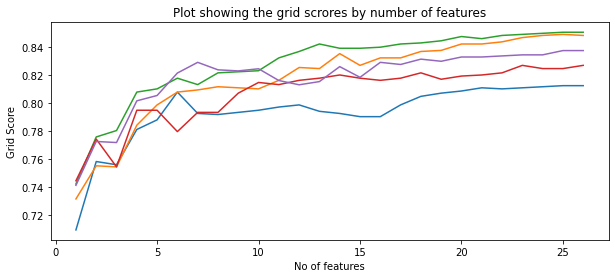

In [194]:
# plotting the results of the grid scores across number of features
plt.figure(figsize=(10,4))
plt.plot(range(1,num_features+1),rfecv.grid_scores_)
plt.title("Plot showing the grid scrores by number of features")
plt.xlabel("No of features")
plt.ylabel("Grid Score")
plt.show()

In [195]:
# Let us find the best number of features
rfecv.n_features_

26

In [196]:
# Check the boolean value of variables selected.
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

#### RFECV suggests that 26 is the best number of features in the model.
#### Let us build the model using statsmodel using 26 features and see if all the variables are significant and if there is mutli-collinearity.

#### Building the first model

In [197]:
# Required libraries have already been imported

In [198]:
# Adding a constant
X_train_sm=sm.add_constant(X_resampled_smt,has_constant="add")
X_test_sm=sm.add_constant(X_test_scaled,has_constant="add")

In [199]:
# building the first model
model1=sm.GLM(np.array(y_resampled_smt),X_train_sm,family=sm.families.Binomial())
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6554
Model:                            GLM   Df Residuals:                     6527
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2520.5
Date:                Sat, 23 Mar 2024   Deviance:                       5040.9
Time:                        17:39:14   Pearson chi2:                 6.58e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4605
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.3681      0.051    -26.566      0.000      -1.469      -1.267
Tenure                                 -1.7906      0.060    -30.014      0.000      -1.908      -1.674
WarehouseToHome                         0.3811      0.039      9.858      0.000       0.305       0.457
HourSpendOnApp                          0.0005      0.045      0.012      0.991      -0.087       0.089
NumberOfDeviceRegistered                0.4166      0.042      9.878      0.000       0.334       0.499
SatisfactionScore                       0.4246      0.038     11.054      0.000       0.349       0.500
NumberOfAddress                         0.6243      0.040     15.419      0.000       0.545       0.704
Complaint                               0.7509      0.036     21.105      0.000       0.681       0.821
OrderAmountHikeFromlastYear            -0.1315      0.038     -3.489      0.000      -0.205      -0.058
CouponUsed                              0.0763      0.054      1.411      0.158      -0.030       0.182
OrderCount                              0.4373      0.061      7.139      0.000       0.317       0.557
DaySinceLastOrder                      -0.5431      0.050    -10.857      0.000      -0.641      -0.445
CashbackAmount                         -1.0832      0.126     -8.601      0.000      -1.330      -0.836
PreferredLoginDevice_Mobile Phone      -0.1941      0.045     -4.348      0.000      -0.282      -0.107
PreferredLoginDevice_Phone             -0.2371      0.042     -5.582      0.000      -0.320      -0.154
PreferredPaymentMode_Credit Card       -0.3054      0.066     -4.651      0.000      -0.434      -0.177
PreferredPaymentMode_Debit Card        -0.2408      0.068     -3.527      0.000      -0.375      -0.107
PreferredPaymentMode_E wallet          -0.1480      0.060     -2.469      0.014      -0.266      -0.031
Gender_Male                             0.2147      0.038      5.692      0.000       0.141       0.289
PreferedOrderCat_Grocery                0.0809      0.072      1.129      0.259      -0.059       0.221
PreferedOrderCat_Laptop & Accessory    -1.1653      0.076    -15.342      0.000      -1.314      -1.016
PreferedOrderCat_Mobile Phone          -0.7155      0.101     -7.104      0.000      -0.913      -0.518
PreferedOrderCat_Others                 0.5297      0.073      7.260      0.000       0.387       0.673
MaritalStatus_Married                  -0.1027      0.056     -1.840      0.066      -0.212       0.007
MaritalStatus_Single                    0.3511      0.054      6.535      0.000       0.246       0.456
CityTier_2                              0.1109      0.036      3.065      0.002       0.040       0.182
CityTier_3                              0.4377      0.042     10.30

#### The variable HourSpendOnApp has p value more than 0.05. Let us build the second model by dropping this variable.

#### Building the second model

In [200]:
# Dropping the variable "HourSpendOnApp" from train and test dataset
X_train_sm=X_train_sm.drop("HourSpendOnApp",axis=1)
X_test_sm=X_test_sm.drop("HourSpendOnApp",axis=1)
X_train_sm.shape,X_test_sm.shape

((6554, 26), (1690, 26))

In [201]:
# building the second model
model2=sm.GLM(np.array(y_resampled_smt),X_train_sm,family=sm.families.Binomial())

In [202]:
#summary results of the second model
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6554
Model:                            GLM   Df Residuals:                     6528
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2520.5
Date:                Sat, 23 Mar 2024   Deviance:                       5040.9
Time:                        17:39:14   Pearson chi2:                 6.58e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4605
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.3681      0.051    -26.568      0.000      -1.469      -1.267
Tenure                                 -1.7906      0.060    -30.019      0.000      -1.908      -1.674
WarehouseToHome                         0.3811      0.039      9.890      0.000       0.306       0.457
NumberOfDeviceRegistered                0.4166      0.042      9.976      0.000       0.335       0.499
SatisfactionScore                       0.4246      0.038     11.075      0.000       0.349       0.500
NumberOfAddress                         0.6244      0.040     15.451      0.000       0.545       0.704
Complaint                               0.7509      0.036     21.116      0.000       0.681       0.821
OrderAmountHikeFromlastYear            -0.1315      0.038     -3.490      0.000      -0.205      -0.058
CouponUsed                              0.0763      0.054      1.415      0.157      -0.029       0.182
OrderCount                              0.4373      0.061      7.145      0.000       0.317       0.557
DaySinceLastOrder                      -0.5431      0.050    -10.868      0.000      -0.641      -0.445
CashbackAmount                         -1.0826      0.117     -9.260      0.000      -1.312      -0.853
PreferredLoginDevice_Mobile Phone      -0.1941      0.045     -4.348      0.000      -0.282      -0.107
PreferredLoginDevice_Phone             -0.2371      0.042     -5.591      0.000      -0.320      -0.154
PreferredPaymentMode_Credit Card       -0.3053      0.066     -4.654      0.000      -0.434      -0.177
PreferredPaymentMode_Debit Card        -0.2407      0.068     -3.533      0.000      -0.374      -0.107
PreferredPaymentMode_E wallet          -0.1480      0.060     -2.469      0.014      -0.266      -0.031
Gender_Male                             0.2147      0.038      5.697      0.000       0.141       0.289
PreferedOrderCat_Grocery                0.0807      0.070      1.150      0.250      -0.057       0.218
PreferedOrderCat_Laptop & Accessory    -1.1651      0.074    -15.784      0.000      -1.310      -1.020
PreferedOrderCat_Mobile Phone          -0.7150      0.094     -7.608      0.000      -0.899      -0.531
PreferedOrderCat_Others                 0.5295      0.070      7.562      0.000       0.392       0.667
MaritalStatus_Married                  -0.1026      0.056     -1.840      0.066      -0.212       0.007
MaritalStatus_Single                    0.3510      0.054      6.539      0.000       0.246       0.456
CityTier_2                              0.1109      0.036      3.066      0.002       0.040       0.182
CityTier_3                              0.4377      0.042     10.312      0.000       0.355       0.521
===================================================================

#### We will drop the variable "PreferedOrderCat_Grocery" as the p value is more than 0.05

#### Building the third model

In [203]:
# Dropping the variable "PreferedOrderCat_Grocery" from train and test dataset
X_train_sm=X_train_sm.drop("PreferedOrderCat_Grocery",axis=1)
X_test_sm=X_test_sm.drop("PreferedOrderCat_Grocery",axis=1)
X_train_sm.shape,X_test_sm.shape

((6554, 25), (1690, 25))

In [204]:
# building the third model
model3=sm.GLM(np.array(y_resampled_smt),X_train_sm,family=sm.families.Binomial())

In [205]:
#summary results of the third model
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6554
Model:                            GLM   Df Residuals:                     6529
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2521.1
Date:                Sat, 23 Mar 2024   Deviance:                       5042.2
Time:                        17:39:14   Pearson chi2:                 6.53e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4604
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.3729      0.051    -26.669      0.000      -1.474      -1.272
Tenure                                 -1.7824      0.059    -30.121      0.000      -1.898      -1.666
WarehouseToHome                         0.3799      0.039      9.853      0.000       0.304       0.455
NumberOfDeviceRegistered                0.4102      0.041      9.914      0.000       0.329       0.491
SatisfactionScore                       0.4241      0.038     11.067      0.000       0.349       0.499
NumberOfAddress                         0.6246      0.040     15.441      0.000       0.545       0.704
Complaint                               0.7500      0.036     21.103      0.000       0.680       0.820
OrderAmountHikeFromlastYear            -0.1334      0.038     -3.546      0.000      -0.207      -0.060
CouponUsed                              0.0774      0.054      1.434      0.152      -0.028       0.183
OrderCount                              0.4359      0.061      7.115      0.000       0.316       0.556
DaySinceLastOrder                      -0.5385      0.050    -10.830      0.000      -0.636      -0.441
CashbackAmount                         -1.0294      0.107     -9.624      0.000      -1.239      -0.820
PreferredLoginDevice_Mobile Phone      -0.2002      0.044     -4.520      0.000      -0.287      -0.113
PreferredLoginDevice_Phone             -0.2333      0.042     -5.521      0.000      -0.316      -0.150
PreferredPaymentMode_Credit Card       -0.3056      0.066     -4.657      0.000      -0.434      -0.177
PreferredPaymentMode_Debit Card        -0.2387      0.068     -3.504      0.000      -0.372      -0.105
PreferredPaymentMode_E wallet          -0.1475      0.060     -2.461      0.014      -0.265      -0.030
Gender_Male                             0.2150      0.038      5.706      0.000       0.141       0.289
PreferedOrderCat_Laptop & Accessory    -1.1606      0.074    -15.766      0.000      -1.305      -1.016
PreferedOrderCat_Mobile Phone          -0.6966      0.092     -7.533      0.000      -0.878      -0.515
PreferedOrderCat_Others                 0.4998      0.065      7.694      0.000       0.372       0.627
MaritalStatus_Married                  -0.1005      0.056     -1.801      0.072      -0.210       0.009
MaritalStatus_Single                    0.3533      0.054      6.579      0.000       0.248       0.459
CityTier_2                              0.1112      0.036      3.072      0.002       0.040       0.182
CityTier_3                              0.4401      0.042     10.379      0.000       0.357       0.523
=======================================================================================================
"""

#### We will drop the variable "CouponUsed" as p value is more than 0.05.

#### Building the fourth model

In [206]:
# Dropping the variable "CouponUsed" from train and test dataset
X_train_sm=X_train_sm.drop("CouponUsed",axis=1)
X_test_sm=X_test_sm.drop("CouponUsed",axis=1)
X_train_sm.shape,X_test_sm.shape

((6554, 24), (1690, 24))

In [207]:
# building the fourth model
model4=sm.GLM(np.array(y_resampled_smt),X_train_sm,family=sm.families.Binomial())

In [208]:
#summary results of the fourth model
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6554
Model:                            GLM   Df Residuals:                     6530
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2522.1
Date:                Sat, 23 Mar 2024   Deviance:                       5044.3
Time:                        17:39:14   Pearson chi2:                 6.53e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4602
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.3716      0.051    -26.665      0.000      -1.472      -1.271
Tenure                                 -1.7867      0.059    -30.184      0.000      -1.903      -1.671
WarehouseToHome                         0.3780      0.039      9.814      0.000       0.303       0.454
NumberOfDeviceRegistered                0.4140      0.041     10.032      0.000       0.333       0.495
SatisfactionScore                       0.4233      0.038     11.057      0.000       0.348       0.498
NumberOfAddress                         0.6281      0.040     15.548      0.000       0.549       0.707
Complaint                               0.7489      0.036     21.086      0.000       0.679       0.818
OrderAmountHikeFromlastYear            -0.1338      0.038     -3.559      0.000      -0.207      -0.060
OrderCount                              0.4910      0.048     10.325      0.000       0.398       0.584
DaySinceLastOrder                      -0.5346      0.050    -10.784      0.000      -0.632      -0.437
CashbackAmount                         -1.0120      0.106     -9.545      0.000      -1.220      -0.804
PreferredLoginDevice_Mobile Phone      -0.2037      0.044     -4.608      0.000      -0.290      -0.117
PreferredLoginDevice_Phone             -0.2355      0.042     -5.575      0.000      -0.318      -0.153
PreferredPaymentMode_Credit Card       -0.3069      0.066     -4.677      0.000      -0.436      -0.178
PreferredPaymentMode_Debit Card        -0.2380      0.068     -3.492      0.000      -0.372      -0.104
PreferredPaymentMode_E wallet          -0.1451      0.060     -2.422      0.015      -0.263      -0.028
Gender_Male                             0.2153      0.038      5.714      0.000       0.141       0.289
PreferedOrderCat_Laptop & Accessory    -1.1565      0.073    -15.735      0.000      -1.301      -1.012
PreferedOrderCat_Mobile Phone          -0.6868      0.092     -7.458      0.000      -0.867      -0.506
PreferedOrderCat_Others                 0.4900      0.064      7.601      0.000       0.364       0.616
MaritalStatus_Married                  -0.1034      0.056     -1.857      0.063      -0.213       0.006
MaritalStatus_Single                    0.3519      0.054      6.561      0.000       0.247       0.457
CityTier_2                              0.1108      0.036      3.061      0.002       0.040       0.182
CityTier_3                              0.4367      0.042     10.322      0.000       0.354       0.520
=======================================================================================================
"""

#### We will build the fifth model by dropping the variable "MaritalStatus_Married"

#### Building the fifth model

In [209]:
# Dropping the variable "MaritalStatus_Married" from train and test dataset
X_train_sm=X_train_sm.drop("MaritalStatus_Married",axis=1)
X_test_sm=X_test_sm.drop("MaritalStatus_Married",axis=1)
X_train_sm.shape,X_test_sm.shape

((6554, 23), (1690, 23))

In [210]:
# building the fifth model
model5=sm.GLM(np.array(y_resampled_smt),X_train_sm,family=sm.families.Binomial())

In [211]:
#summary results of the fifth model
result5=model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6554
Model:                            GLM   Df Residuals:                     6531
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2523.9
Date:                Sat, 23 Mar 2024   Deviance:                       5047.7
Time:                        17:39:14   Pearson chi2:                 6.51e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4600
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.3685      0.051    -26.650      0.000      -1.469      -1.268
Tenure                                 -1.7853      0.059    -30.194      0.000      -1.901      -1.669
WarehouseToHome                         0.3786      0.039      9.823      0.000       0.303       0.454
NumberOfDeviceRegistered                0.4140      0.041     10.042      0.000       0.333       0.495
SatisfactionScore                       0.4276      0.038     11.197      0.000       0.353       0.502
NumberOfAddress                         0.6274      0.040     15.541      0.000       0.548       0.707
Complaint                               0.7484      0.036     21.079      0.000       0.679       0.818
OrderAmountHikeFromlastYear            -0.1353      0.038     -3.602      0.000      -0.209      -0.062
OrderCount                              0.4905      0.048     10.312      0.000       0.397       0.584
DaySinceLastOrder                      -0.5347      0.050    -10.796      0.000      -0.632      -0.438
CashbackAmount                         -1.0111      0.106     -9.531      0.000      -1.219      -0.803
PreferredLoginDevice_Mobile Phone      -0.2012      0.044     -4.557      0.000      -0.288      -0.115
PreferredLoginDevice_Phone             -0.2355      0.042     -5.574      0.000      -0.318      -0.153
PreferredPaymentMode_Credit Card       -0.3082      0.066     -4.700      0.000      -0.437      -0.180
PreferredPaymentMode_Debit Card        -0.2365      0.068     -3.474      0.001      -0.370      -0.103
PreferredPaymentMode_E wallet          -0.1472      0.060     -2.459      0.014      -0.265      -0.030
Gender_Male                             0.2126      0.038      5.646      0.000       0.139       0.286
PreferedOrderCat_Laptop & Accessory    -1.1570      0.073    -15.749      0.000      -1.301      -1.013
PreferedOrderCat_Mobile Phone          -0.6877      0.092     -7.468      0.000      -0.868      -0.507
PreferedOrderCat_Others                 0.4893      0.065      7.581      0.000       0.363       0.616
MaritalStatus_Single                    0.4266      0.036     11.977      0.000       0.357       0.496
CityTier_2                              0.1090      0.036      3.014      0.003       0.038       0.180
CityTier_3                              0.4379      0.042     10.364      0.000       0.355       0.521
=======================================================================================================
"""

#### The p values of all variables are less than 0.05. Let us now check the VIF values of all variables.

In [212]:
# check the VIF's for the same as all p values are less than 0.05
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Features"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

Features       VIF
0                                 const  1.207827
1                                Tenure  1.407371
2                       WarehouseToHome  1.044314
3              NumberOfDeviceRegistered  1.140518
4                     SatisfactionScore  1.035775
5                       NumberOfAddress  1.130261
6                             Complaint  1.048896
7           OrderAmountHikeFromlastYear  1.022145
8                            OrderCount  1.434759
9                     DaySinceLastOrder  1.529615
10                       CashbackAmount  5.799300
11    PreferredLoginDevice_Mobile Phone  1.517018
12           PreferredLoginDevice_Phone  1.546032
13     PreferredPaymentMode_Credit Card  2.917008
14      PreferredPaymentMode_Debit Card  3.125877
15        PreferredPaymentMode_E wallet  2.741868
16                          Gender_Male  1.024443
17  PreferedOrderCat_Laptop & Accessory  3.546360
18        PreferedOrderCat_Mobile Phone  6.770056
19              PreferedOrderCat_Others  1.675716
20                 MaritalStatus_Single  1.087969
21                           CityTier_2  1.125321
22                           CityTier_3  1.453579

#### The VIF of "PreferedOrderCat_Mobile Phone" and "CashbackAmount" is more than 5. Let us build the sixth model by dropping "PreferedOrderCat_Mobile Phone" 

#### Building the sixth model

In [213]:
# Dropping the variable "PreferedOrderCat_Mobile Phone" from train and test dataset
X_train_sm=X_train_sm.drop("PreferedOrderCat_Mobile Phone",axis=1)
X_test_sm=X_test_sm.drop("PreferedOrderCat_Mobile Phone",axis=1)
X_train_sm.shape,X_test_sm.shape

((6554, 22), (1690, 22))

In [214]:
# building the sixth model
model6=sm.GLM(np.array(y_resampled_smt),X_train_sm,family=sm.families.Binomial())

In [215]:
#summary results of the sixth model
result6=model6.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6554
Model:                            GLM   Df Residuals:                     6532
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2552.5
Date:                Sat, 23 Mar 2024   Deviance:                       5105.0
Time:                        17:39:14   Pearson chi2:                 6.50e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4552
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.3108      0.050    -26.410      0.000      -1.408      -1.213
Tenure                                 -1.7175      0.057    -29.986      0.000      -1.830      -1.605
WarehouseToHome                         0.3917      0.038     10.180      0.000       0.316       0.467
NumberOfDeviceRegistered                0.3389      0.039      8.587      0.000       0.262       0.416
SatisfactionScore                       0.4098      0.038     10.837      0.000       0.336       0.484
NumberOfAddress                         0.5994      0.040     15.126      0.000       0.522       0.677
Complaint                               0.7166      0.035     20.546      0.000       0.648       0.785
OrderAmountHikeFromlastYear            -0.1515      0.037     -4.066      0.000      -0.224      -0.078
OrderCount                              0.4732      0.047     10.039      0.000       0.381       0.566
DaySinceLastOrder                      -0.4890      0.048    -10.112      0.000      -0.584      -0.394
CashbackAmount                         -0.4216      0.067     -6.260      0.000      -0.554      -0.290
PreferredLoginDevice_Mobile Phone      -0.1883      0.044     -4.301      0.000      -0.274      -0.103
PreferredLoginDevice_Phone             -0.2315      0.042     -5.498      0.000      -0.314      -0.149
PreferredPaymentMode_Credit Card       -0.2886      0.065     -4.421      0.000      -0.417      -0.161
PreferredPaymentMode_Debit Card        -0.2170      0.068     -3.205      0.001      -0.350      -0.084
PreferredPaymentMode_E wallet          -0.1362      0.060     -2.287      0.022      -0.253      -0.019
Gender_Male                             0.2003      0.037      5.356      0.000       0.127       0.274
PreferedOrderCat_Laptop & Accessory    -0.7139      0.042    -16.992      0.000      -0.796      -0.632
PreferedOrderCat_Others                 0.3338      0.059      5.632      0.000       0.218       0.450
MaritalStatus_Single                    0.4057      0.035     11.491      0.000       0.336       0.475
CityTier_2                              0.1044      0.036      2.931      0.003       0.035       0.174
CityTier_3                              0.4757      0.042     11.406      0.000       0.394       0.557
=======================================================================================================
"""

In [216]:
# check the VIF's for the same as all p values are less than 0.05
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Features"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

Features       VIF
0                                 const  1.207349
1                                Tenure  1.395381
2                       WarehouseToHome  1.036936
3              NumberOfDeviceRegistered  1.083918
4                     SatisfactionScore  1.035418
5                       NumberOfAddress  1.129395
6                             Complaint  1.043834
7           OrderAmountHikeFromlastYear  1.019069
8                            OrderCount  1.434669
9                     DaySinceLastOrder  1.518684
10                       CashbackAmount  2.659572
11    PreferredLoginDevice_Mobile Phone  1.514207
12           PreferredLoginDevice_Phone  1.545820
13     PreferredPaymentMode_Credit Card  2.915772
14      PreferredPaymentMode_Debit Card  3.123793
15        PreferredPaymentMode_E wallet  2.741852
16                          Gender_Male  1.024443
17  PreferedOrderCat_Laptop & Accessory  1.199829
18              PreferedOrderCat_Others  1.532291
19                 MaritalStatus_Single  1.084348
20                           CityTier_2  1.125262
21                           CityTier_3  1.414906

#### All variables are significant in model6 as the p values are less than 0.05.
#### There is no major multi-collinearity as VIF is less than 5.
#### model6 is a good model.

In [217]:
# Let us the check the cross validation score if we build the model with 21 features.
# importing RFE from scikit learn
from sklearn.feature_selection import RFE


In [218]:
# building model with 21 features to check cross validation score
rfe21=RFE(estimator=logreg,n_features_to_select=21)
rfe21.fit(X_resampled_smt,y_resampled_smt)

RFE(estimator=LogisticRegression(max_iter=200, random_state=42),
    n_features_to_select=21)

#### Though we can calculate the accuracy, precision, recall on the train set, let us instead use the cross val score to understand how the model will perform on the validation data

In [219]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score

In [220]:
# Accuracy using cross val score
cross_val_score(rfe21,X_resampled_smt,y_resampled_smt,cv=5,n_jobs=-1).mean()

0.8303330014382123

In [221]:
# recall using cross val score
cross_val_score(rfe21,X_resampled_smt,y_resampled_smt,cv=5,n_jobs=-1,scoring="recall").mean()

0.8425321169242228

In [222]:
# Predictions on the training set
y_train_pred_lr=result6.predict(X_train_sm)
y_train_pred_lr.shape

(6554,)

In [223]:
# Creating a dataframe with the Actual Class, Predicted Probability and Predicted Class on training set.
# Let us take the cut off as 0.5
train_lr=pd.DataFrame()
train_lr["Predicted_Prob"]=y_train_pred_lr
train_lr["Actual_Class"]=y_resampled_smt.values
train_lr["Predicted_Class"]=np.where(train_lr["Predicted_Prob"]>0.5,1,0)
train_lr.head()

Predicted_Prob  Actual_Class  Predicted_Class
0        0.234745             0                0
1        0.029542             0                0
2        0.754474             0                1
3        0.162792             0                0
4        0.036823             0                0

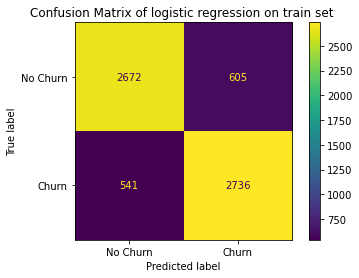

In [224]:
# confusion matrix of train set
confusion_matrix=metrics.confusion_matrix(train_lr["Actual_Class"],train_lr["Predicted_Class"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["No Churn","Churn"])
cm_display.plot()
plt.title("Confusion Matrix of logistic regression on train set ")
plt.show()

In [225]:
# Let us check the precision on the train set
metrics.precision_score(train_lr["Actual_Class"],train_lr["Predicted_Class"])

0.818916492068243

In [226]:
# Let us check the recall on the train set
metrics.recall_score(train_lr["Actual_Class"],train_lr["Predicted_Class"])

0.8349099786389991

In [227]:
# Let us check the accuracy on the train set
metrics.accuracy_score(train_lr["Actual_Class"],train_lr["Predicted_Class"])

0.8251449496490693

In [228]:
# Let us have the summary report with the metrics
print(metrics.classification_report(train_lr["Actual_Class"],train_lr["Predicted_Class"]))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      3277
           1       0.82      0.83      0.83      3277

    accuracy                           0.83      6554
   macro avg       0.83      0.83      0.83      6554
weighted avg       0.83      0.83      0.83      6554



In [229]:
# Creating function for ROC plot
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Receiver operating characteristic')
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [230]:
fpr, tpr, thresholds = metrics.roc_curve(train_lr["Actual_Class"], train_lr["Predicted_Prob"], drop_intermediate = False )

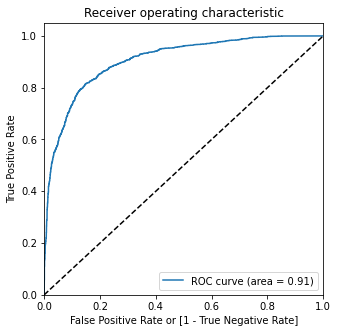

In [231]:
# ROC curve shows that this is a decent model
draw_roc(train_lr.Actual_Class, train_lr["Predicted_Prob"])

In [232]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    train_lr[i]= train_lr["Predicted_Prob"].map(lambda x: 1 if x > i else 0)
train_lr.head()

Predicted_Prob  Actual_Class  Predicted_Class  0.0  0.1  0.2  0.3  0.4  \
0        0.234745             0                0    1    1    1    0    0   
1        0.029542             0                0    1    0    0    0    0   
2        0.754474             0                1    1    1    1    1    1   
3        0.162792             0                0    1    1    0    0    0   
4        0.036823             0                0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    1    1    1    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [233]:
# Now let's calculate accuracy, recall and precision for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','recall','precision'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(train_lr["Actual_Class"], train_lr[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    precision = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,recall,precision]
print(cutoff_df)

     prob  accuracy    recall  precision
0.0   0.0  0.500000  1.000000   0.500000
0.1   0.1  0.690113  0.971010   0.621727
0.2   0.2  0.763503  0.950870   0.691676
0.3   0.3  0.799512  0.916387   0.742765
0.4   0.4  0.819500  0.883125   0.783433
0.5   0.5  0.825145  0.834910   0.818916
0.6   0.6  0.831096  0.795240   0.856673
0.7   0.7  0.814007  0.721392   0.885393
0.8   0.8  0.765334  0.578578   0.923527
0.9   0.9  0.678059  0.368935   0.966427


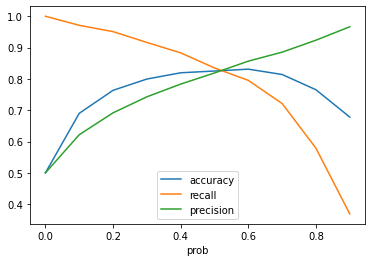

In [234]:
# Let's plot accuracy recall and precision for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','recall','precision'])
plt.show()

#### Though the optimal cut is around 0.54,the recall would drop. Hence we will not  go with optimal cutoff.

#### If we decrease the probability threshold to 0.4, the recall increases and precision drops slightly. So let us take the probability cut-off at 0.4

In [235]:
# Final prediction based on probability cut-off of 0.4
train_lr['final_predicted'] = train_lr.Predicted_Prob.map( lambda x: 1 if x > 0.4 else 0)

train_lr.head()

Predicted_Prob  Actual_Class  Predicted_Class  0.0  0.1  0.2  0.3  0.4  \
0        0.234745             0                0    1    1    1    0    0   
1        0.029542             0                0    1    0    0    0    0   
2        0.754474             0                1    1    1    1    1    1   
3        0.162792             0                0    1    1    0    0    0   
4        0.036823             0                0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    1    1    1    0    0                1  
3    0    0    0    0    0                0  
4    0    0    0    0    0                0

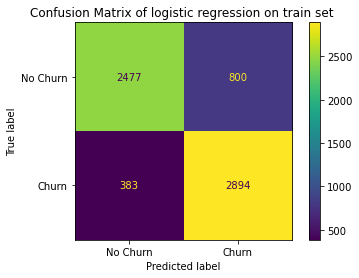

In [236]:
# confusion matrix of train set at 0.4 probability cut-off
confusion_matrix=metrics.confusion_matrix(train_lr["Actual_Class"],train_lr["final_predicted"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["No Churn","Churn"])
cm_display.plot()
plt.title("Confusion Matrix of logistic regression on train set ")
plt.show()

In [237]:
# lets check the metrics for this
print(metrics.classification_report(train_lr["Actual_Class"],train_lr["final_predicted"]))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      3277
           1       0.78      0.88      0.83      3277

    accuracy                           0.82      6554
   macro avg       0.82      0.82      0.82      6554
weighted avg       0.82      0.82      0.82      6554



#### If we compare the evaluation metrics at probability threshold of 0.5 and 0.4, we can see that F1 Score is the same at both levels but recall at probability cut-off of 0.4 is 0.88 compared to 0.83 at probability threshold of 0.5.

#### So the probability cut-off of 0.4 is better in this case.



#### Now let us build another model using random forest and see the results

## 3. Customer Churn Model

### vi.Model Building- Random Forest, Hyper Parameter Tuning and Evaluation

#### Hyper parameter tuning:

#### There are various parameter combinations on which we can build the model. 
#### We will use the GridSearch CV to find the combination of parameters that give us a model that can perform well and then build the model

In [238]:
# import the required methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [239]:
# instantiate
rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)

In [240]:
# Define the values for different parameters
hyper_params = {'max_depth': [5, 10, 15, 20],
                'max_features': [5, 10, 15, 20],
                'min_samples_leaf': [50, 100, 250, 350],
                'n_estimators': [25, 50, 80, 100]
               }

In [241]:
# Using GRIDSEARCHCV
rf_cv=GridSearchCV(estimator=rf, 
             param_grid=hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1)

In [242]:
# let us see the shape of data which is to be used
X_resampled_smt.shape,X_test_scaled.shape

((6554, 26), (1690, 26))

In [243]:
# fitting on the train data
rf_cv.fit(X_resampled_smt,y_resampled_smt)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [5, 10, 15, 20],
                         'min_samples_leaf': [50, 100, 250, 350],
                         'n_estimators': [25, 50, 80, 100]},
             verbose=1)

In [244]:
# finding the best random forest
rf_best=rf_cv.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=50,
                       n_jobs=-1, oob_score=True, random_state=42)

In [245]:
# finding the score of the best random forest
rf_cv.best_score_

0.8761079765460782

In [246]:
# Putting the results of grid search in a dataframe
cv_df=pd.DataFrame(rf_cv.cv_results_)
cv_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.140360      0.016120         0.043504        0.021472   
1         0.239082      0.007239         0.111032        0.019407   
2         0.344527      0.018296         0.103518        0.018862   
3         0.431823      0.037604         0.095048        0.022558   
4         0.143004      0.028030         0.041770        0.021282   
..             ...           ...              ...             ...   
251       0.819680      0.078220         0.183583        0.062190   
252       0.168744      0.038434         0.081756        0.032023   
253       0.314453      0.048605         0.080601        0.018911   
254       0.687216      0.077818         0.070354        0.029387   
255       0.557748      0.182892         0.050038        0.020231   

    param_max_depth param_max_features param_min_samples_leaf  \
0                 5                  5                     50   
1                 5                  5                     50   
2                 5                  5                     50   
3                 5                  5                     50   
4                 5                  5                    100   
..              ...                ...                    ...   
251              20                 20                    250   
252              20                 20                    350   
253              20                 20                    350   
254              20                 20                    350   
255              20                 20                    350   

    param_n_estimators                                             params  \
0                   25  {'max_depth': 5, 'max_features': 5, 'min_sampl...   
1                   50  {'max_depth': 5, 'max_features': 5, 'min_sampl...   
2                   80  {'max_depth': 5, 'max_features': 5, 'min_sampl...   
3                  100  {'max_depth': 5, 'max_features': 5, 'min_sampl...   
4                   25  {'max_depth': 5, 'max_features': 5, 'min_sampl...   
..                 ...                                                ...   
251                100  {'max_depth': 20, 'max_features': 20, 'min_sam...   
252                 25  {'max_depth': 20, 'max_features': 20, 'min_sam...   
253                 50  {'max_depth': 20, 'max_features': 20, 'min_sam...   
254                 80  {'max_depth': 20, 'max_features': 20, 'min_sam...   
255                100  {'max_depth': 20, 'max_features': 20, 'min_sam...   

     split0_test_score  split1_test_score  split2_test_score  \
0             0.828375           0.874905           0.873379   
1             0.833715           0.875667           0.879481   
2             0.826087           0.879481           0.875667   
3             0.832952           0.877193           0.874905   
4             0.816934           0.852021           0.872616   
..                 ...                ...                ...   
251           0.796339           0.799390           0.800915   
252           0.798627           0.791762           0.809306   
253           0.798627           0.800153           0.811594   
254           0.799390           0.793288           0.812357   
255           0.794050           0.792525           0.819222   

     split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0             0.859649           0.880153         0.863292        0.018726   
1             0.861937           0.871756         0.864511        0.016469   
2             0.864226           0.876336         0.864359        0.019823   
3             0.866514           0.874809         0.865275        0.016565   
4             0.844394           0.864885         0.850170        0.019297   
..                 ...                ...              ...             ...   
251           0.788711           0.812977         0.799666        0.007873   
252           0.788711           0.811450         0.799971        0.009109   

In [247]:
# sorting the values in cv_df
cv_df.sort_values("rank_test_score").head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
67        0.611479      0.132454         0.117154        0.048725   
131       0.563375      0.058536         0.174784        0.018795   
195       0.634339      0.036894         0.120378        0.036245   
130       0.535884      0.068917         0.167067        0.049985   
194       0.464321      0.045097         0.124414        0.057934   

    param_max_depth param_max_features param_min_samples_leaf  \
67               10                  5                     50   
131              15                  5                     50   
195              20                  5                     50   
130              15                  5                     50   
194              20                  5                     50   

    param_n_estimators                                             params  \
67                 100  {'max_depth': 10, 'max_features': 5, 'min_samp...   
131                100  {'max_depth': 15, 'max_features': 5, 'min_samp...   
195                100  {'max_depth': 20, 'max_features': 5, 'min_samp...   
130                 80  {'max_depth': 15, 'max_features': 5, 'min_samp...   
194                 80  {'max_depth': 20, 'max_features': 5, 'min_samp...   

     split0_test_score  split1_test_score  split2_test_score  \
67            0.839054           0.886346           0.888635   
131           0.835240           0.885584           0.887872   
195           0.835240           0.885584           0.887872   
130           0.832952           0.884821           0.888635   
194           0.832952           0.884821           0.888635   

     split3_test_score  split4_test_score  mean_test_score  std_test_score  \
67            0.878719           0.887786         0.876108        0.018857   
131           0.878719           0.887786         0.875040        0.020178   
195           0.878719           0.887786         0.875040        0.020178   
130           0.875667           0.891603         0.874736        0.021569   
194           0.875667           0.891603         0.874736        0.021569   

     rank_test_score  
67                 1  
131                2  
195                2  
130                4  
194                4

#### Building the random forest model

In [248]:
# Let us build the random forest model using the rf_best

In [249]:
# Fitting the random forest on train data
rf_best.fit(X_resampled_smt,y_resampled_smt)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=50,
                       n_jobs=-1, oob_score=True, random_state=42)

In [250]:
# cross val score of best_rf
cross_val_score(rf_best,X_resampled_smt,y_resampled_smt,cv=5,n_jobs=-1).mean()

0.8761079765460782

In [251]:
# We can see that the oob_score is almost the same as cross val score which means model is not overfitting.
rf_best.oob_score_

0.8800732377174245

In [252]:
# recall score of best_rf
cross_val_score(rf_best,X_resampled_smt,y_resampled_smt,cv=5,n_jobs=-1,scoring="recall").mean()

0.8715164773785142

In [253]:
from sklearn.metrics import plot_roc_curve

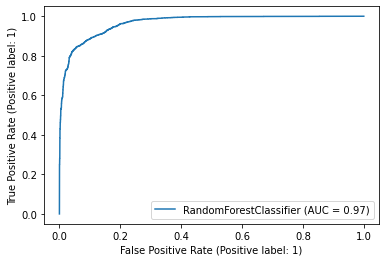

In [254]:
# Plotting roc curve we can see that this random forest performs well as auc is 0.97
plot_roc_curve(rf_best,X_resampled_smt,y_resampled_smt)

In [255]:
# Plotting the variable wise feature importance given by random forest
imp_df=pd.DataFrame({"VarName":X_resampled_smt.columns,"Imp":rf_best.feature_importances_})
imp_df.sort_values(by="Imp",ascending=False)

VarName       Imp
0                                Tenure  0.326835
6                             Complaint  0.134160
10                    DaySinceLastOrder  0.070426
20        PreferedOrderCat_Mobile Phone  0.063436
3              NumberOfDeviceRegistered  0.047406
11                       CashbackAmount  0.042640
23                 MaritalStatus_Single  0.039566
4                     SatisfactionScore  0.036830
5                       NumberOfAddress  0.031921
25                           CityTier_3  0.030532
22                MaritalStatus_Married  0.026613
1                       WarehouseToHome  0.024676
2                        HourSpendOnApp  0.021608
8                            CouponUsed  0.019377
9                            OrderCount  0.019133
12    PreferredLoginDevice_Mobile Phone  0.016606
19  PreferedOrderCat_Laptop & Accessory  0.015378
7           OrderAmountHikeFromlastYear  0.011759
17                          Gender_Male  0.005716
14     PreferredPaymentMode_Credit Card  0.005308
15      PreferredPaymentMode_Debit Card  0.003543
13           PreferredLoginDevice_Phone  0.002775
16        PreferredPaymentMode_E wallet  0.002423
18             PreferedOrderCat_Grocery  0.000928
21              PreferedOrderCat_Others  0.000404
24                           CityTier_2  0.000000

In [256]:
# Predictions on the train set using rf_best
y_train_pred_rf=rf_best.predict(X_resampled_smt)
y_train_pred_rf

array([0, 0, 1, ..., 1, 1, 1])

In [257]:
# Creating a dataframe with the Actual Class and Predicted Class on training set 
train_rf=pd.DataFrame()
train_rf["Predicted_Class"]=y_train_pred_rf
train_rf["Actual_Class"]=y_resampled_smt.values
train_rf.head()


Predicted_Class  Actual_Class
0                0             0
1                0             0
2                1             0
3                0             0
4                0             0

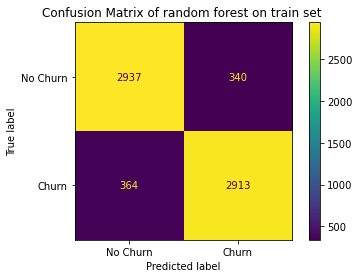

In [258]:
# confusion matrix of rf_best on train set
confusion_matrix=metrics.confusion_matrix(train_rf["Actual_Class"],train_rf["Predicted_Class"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["No Churn","Churn"])
cm_display.plot()
plt.title("Confusion Matrix of random forest on train set ")
plt.show()

In [259]:
# using classification report let su check the performance of rf_best
print(metrics.classification_report(train_rf["Actual_Class"],train_rf["Predicted_Class"]))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      3277
           1       0.90      0.89      0.89      3277

    accuracy                           0.89      6554
   macro avg       0.89      0.89      0.89      6554
weighted avg       0.89      0.89      0.89      6554



#### F1 Score for this model is 0.89. Random forest has a recall of 0.89 and precision of 0.9.This is a good model

#### On the train set, random forest is better than logistic regression

#### However let us see how the logistic regression model- model 6 and random forest - rf_best perform on the test set

## 3. Customer Churn Model

### vii.Making predictions on the test set

#### Test Predictions on logistic regression model

Let us see how our model performs on the test data. Let us start with logistic regression model- model6

In [260]:
# Probability Predictions on the test set using model6
y_test_pred_lr=result6.predict(X_test_sm)
y_test_pred_lr.shape

(1690,)

In [261]:
# Creating a dataframe with the Actual Class, Predicted Probability and Predicted Class on test set 
test_lr=pd.DataFrame()
test_lr["Predicted_Prob"]=y_test_pred_lr
test_lr["Actual_Class"]=y_test.values
test_lr["Predicted_Class"]=np.where(test_lr["Predicted_Prob"]>0.4,1,0)
test_lr.head()

Predicted_Prob  Actual_Class  Predicted_Class
0        0.004268             0                0
1        0.830034             1                1
2        0.637116             0                1
3        0.822778             1                1
4        0.229732             0                0

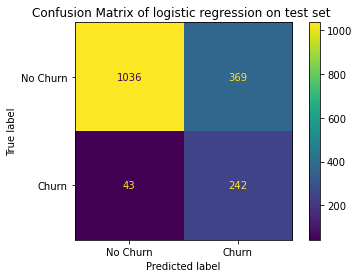

In [262]:
# confusion matrix on test data with model6
confusion_matrix=metrics.confusion_matrix(test_lr["Actual_Class"],test_lr["Predicted_Class"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["No Churn","Churn"])
cm_display.plot()
plt.title("Confusion Matrix of logistic regression on test set ")
plt.show()

In [263]:
# Summary of evaluation metrics on test set
print(metrics.classification_report(test_lr["Actual_Class"],test_lr["Predicted_Class"]))

              precision    recall  f1-score   support

           0       0.96      0.74      0.83      1405
           1       0.40      0.85      0.54       285

    accuracy                           0.76      1690
   macro avg       0.68      0.79      0.69      1690
weighted avg       0.87      0.76      0.78      1690



#### Let us see how the random forest performs

#### Test predictions using random forest rf_best

In [264]:
# We will make predictions on the test set using rf_best. Let us create a DataFrame of the test set 
y_test_pred_rf=rf_best.predict(X_test_scaled)
test_rf=pd.DataFrame()
test_rf["Predicted_Class"]=y_test_pred_rf
test_rf["Actual_Class"]=y_test.values
test_rf.head()

Predicted_Class  Actual_Class
0                0             0
1                1             1
2                0             0
3                1             1
4                0             0

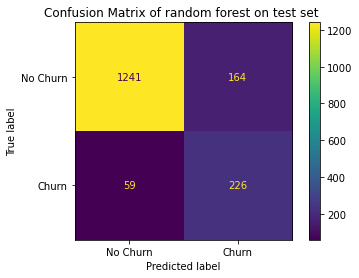

In [265]:
# Confusion Matrix of Random Forest
confusion_matrix=metrics.confusion_matrix(test_rf["Actual_Class"],test_rf["Predicted_Class"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["No Churn","Churn"])
cm_display.plot()
plt.title("Confusion Matrix of random forest on test set ")
plt.show()

In [266]:
print(metrics.classification_report(test_rf["Actual_Class"],test_rf["Predicted_Class"]))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92      1405
           1       0.58      0.79      0.67       285

    accuracy                           0.87      1690
   macro avg       0.77      0.84      0.79      1690
weighted avg       0.89      0.87      0.88      1690



## 3.Customer Churn Model

### viii Model Comparison and Recommendation

#### 1. Logistic Regression using SMOTE with feature selection

#### Test Data :

Accuracy - 0.81

Recall - 0.81

Precision - 0.46

F1 Score - 0.58


#### 2. Logistic Regression using SMOTE and feature selection -  model6          

#### Test Data:

Accuracy - 0.76

Recall - 0.85

Precision - 0.4

F1 Score - 0.54

#### 3. Random Forest using SMOTE and hyperparameter tuning - rf_best

#### Test Data:

Accuracy - 0.87

Recall - 0.79

Precision - 0.58

F1 Score - 0.67

### Retailkart.com wants to reduce the churn rate and retain the market share.If not, it will have to spend Rs.500 to get the customer back as churned customer is as good a new customer.

### Also it has to spend Rs 200 as token of appreciation on customers identified as Churn. But it has a constraint on marketing spend.

### The objective of the model is to reduce False Negative and False Positive i. e both recall and precision are important. So F1 Score is a good measure.

### Out of the three models above,Random Forest rf_best can be deployed as the F1 Score( 0.67) is the highest.